In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

# RNN

1. 인공신경망에서 활용도 높다
    - 챗봇: 자연어 처리 통해 상호작용
    
    - 소설, 그림
    
2. CNN: 구분. RNN: 구분 내용 받아 처리
    - CNN 보다 고차원의 기능 수행: 시간의 흐름에 따른 학습시킬 수 있다
    
    - 현재 시점에서 계속 반복하며 진행(BackPrapagation Time True: 시간의 흐름에 따른 역추적)
    
3. x_data 의 크기가 일정하지 않으면 dynamic_runn 사용

---
# Vanila RNN

    1) 짧은 문장에서는 괜찮으나, 긴 문장에서는 성능 발휘x
    
    2) 문장 처리 위해 cell 증가함에 따라 Vanish, Exploding 문제 발생 가능
    
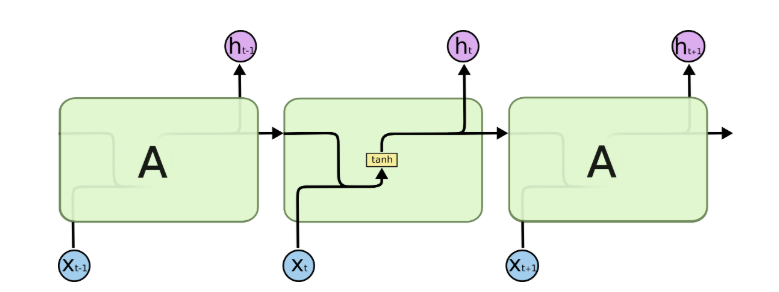

## 입출력 동작 확인

    - 학습과정 없이 간단한 출력값 확인

In [2]:
from tensorflow.contrib import rnn

In [ ]:
# 입력값 준비: hello > h, e, l, o 를 입력값으로 사용
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]

# 셀 준비
cell = tf.contrib.rnn.BasicLSTMCell(num_units=3, reuse=True)

# 입력 준비(입력이 하나이므로 하나의 셀만 생성)
x_data = np.array([[[1, 0, 0, 0]]], dtype=np.float32)  #> H 데이터 입력 준비

# RNN 실행
outputs, _states = tf.nn.dynamic_rnn(cell, x_data, dtype=tf.float32)  #> 출력값 2개(output과 state)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

print("output: ", sess.run(outputs))
print("state: ", sess.run(_states))  #> 하나의 셀이기 때문에 output과 state의 값이 같다

In [3]:
from tensorflow.contrib import rnn

# 입력값 준비: hello > h, e, l, o 를 입력값으로 사용
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]

# 셀 준비
cell = tf.contrib.rnn.BasicLSTMCell(num_units=2, reuse=tf.AUTO_REUSE)

# 입력 준비(5개의 셀 생성): sequence의 수
x_data = np.array([[h, e, l, l, o]], dtype=np.float32)  #> 5개의 값 입력
print(x_data)

# RNN 실행
outputs, _states = tf.nn.dynamic_rnn(cell, x_data, dtype=tf.float32)  #> 출력값 2개(output과 state)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

print("----------------------------")
print("output: ", sess.run(outputs))
print("----------------------------")
print("state: ", sess.run(_states))  #> 마지막 출력값과 state값 같다

[[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]]
output:  [[[-0.06821959 -0.05034532]
  [-0.16998814 -0.14147003]
  [-0.17807315 -0.09388579]
  [-0.1989176  -0.05345276]
  [-0.2583757  -0.05343204]]]
----------------------------
state:  LSTMStateTuple(c=array([[-0.6115769 , -0.12202403]], dtype=float32), h=array([[-0.2583757 , -0.05343204]], dtype=float32))


### 가중치 확인

In [15]:
# 입력 데이터: [1, 2]를 입력했을 때 [6, 7, 8]이 출력되도록
inputs = np.array([[[1, 2]]])

# 데이터 입력 준비
tf.reset_default_graph()
tf.set_random_seed(777)
tf_inputs = tf.constant(inputs, dtype=tf.float32)

# 셀 준비
cell = tf.contrib.rnn.BasicLSTMCell(num_units=3, reuse=tf.AUTO_REUSE)

# RNN 실행
outputs, _states = tf.nn.dynamic_rnn(cell, tf_inputs, dtype=tf.float32)

print("----------------------------1")
print("output: ", outputs)
print("----------------------------2")
print("state: ", _states) 

print("----------------------------3")
variables_names = [v.name for v in tf.trainable_variables()]  #> 현재 사용되는 변수들에 대한 정보 확인
variables_names

print("weight:")
for v in tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES):
    print(v)

print("----------------------------4")
print("run:")
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    output_run, state_run = sess.run([outputs, _states])
    
    print(output_run)
    print("----------4-1")
    print(state_run)
    print("----------4-2")
    values = sess.run(variables_names)
    for k, v in zip(variables_names, values):
        print(k, v)

----------------------------
output:  Tensor("rnn/transpose_1:0", shape=(1, 1, 3), dtype=float32)
----------------------------
state:  LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_3:0' shape=(1, 3) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_4:0' shape=(1, 3) dtype=float32>)
----------------------------
weight:
<tf.Variable 'rnn/basic_lstm_cell/kernel:0' shape=(5, 12) dtype=float32_ref>
<tf.Variable 'rnn/basic_lstm_cell/bias:0' shape=(12,) dtype=float32_ref>
----------------------------
run:
[[[-0.07317054  0.11123639 -0.0737958 ]]]
----------------------------
LSTMStateTuple(c=array([[-0.17627968,  0.5978529 , -0.13381216]], dtype=float32), h=array([[-0.07317054,  0.11123639, -0.0737958 ]], dtype=float32))
----------------------------
rnn/basic_lstm_cell/kernel:0 [[-0.15175056  0.2803548   0.28642386  0.13765436  0.31679738 -0.05768162
  -0.5400555  -0.00545478 -0.40879917 -0.15146843 -0.2236138   0.26468736]
 [-0.49697953  0.24401802 -0.1251494  -0.5338568   0.51885355 -0.10575724
  

In [19]:
# 입력 데이터: 4개의 sequence
# I Work at google = [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]] 
# I google at work = [[1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0]]
inputs = np.array([
    [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]],
    [[1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0]]])

# 데이터 입력 준비
tf.reset_default_graph()
tf.set_random_seed(777)
tf_inputs = tf.constant(inputs, dtype=tf.float32)

# 셀 준비
cell = tf.contrib.rnn.BasicLSTMCell(num_units=3, reuse=tf.AUTO_REUSE)

# RNN 실행
outputs, _states = tf.nn.dynamic_rnn(cell, tf_inputs, dtype=tf.float32)
variables_names = [v.name for v in tf.trainable_variables()]  #> 현재 사용되는 변수들에 대한 정보 확인

print("----------------------------1")
print(outputs)
print("----------------------------2")
print(_states)

print("----------------------------3")
print("weight:")
for v in tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES):
    print(v)

print("----------------------------4")
print("run:")
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    output_run, state_run = sess.run([outputs, _states])
    
    print(output_run)  #> 첫 번째 값은 state값이 없기 때문에 값이 같다(같은 글자라 같은 값 출력x)
    print("----------4-1")
    print(state_run)  #> 마지막 값(마지막 출력값)과 state값은 같다
    print("----------4-2")
    values = sess.run(variables_names)
    for k, v in zip(variables_names, values):
        print(k, v)

----------------------------1
Tensor("rnn/transpose_1:0", shape=(2, 4, 3), dtype=float32)
----------------------------2
LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_3:0' shape=(2, 3) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_4:0' shape=(2, 3) dtype=float32>)
----------------------------3
weight:
<tf.Variable 'rnn/basic_lstm_cell/kernel:0' shape=(7, 12) dtype=float32_ref>
<tf.Variable 'rnn/basic_lstm_cell/bias:0' shape=(12,) dtype=float32_ref>
----------------------------4
run:
[[[ 0.02786751  0.07300588 -0.01738151]
  [-0.05772759  0.13262014 -0.0341388 ]
  [-0.09425558  0.02468962 -0.02005781]
  [-0.08860648  0.07930837 -0.00854995]]

 [[ 0.02786751  0.07300588 -0.01738151]
  [ 0.0187044   0.12358651 -0.00450099]
  [-0.04262371  0.01858238  0.01113632]
  [-0.13311265  0.09760618 -0.01491815]]]
----------4-1
LSTMStateTuple(c=array([[-0.21056423,  0.211174  , -0.01917492],
       [-0.28035873,  0.26986203, -0.02986613]], dtype=float32), h=array([[-0.08860648,  0.07930837, -0.00854995]

## 학습 과정 확인

    - hihello 학습 과정

In [30]:
tf.reset_default_graph()
tf.set_random_seed(777)

# hihello를 one_hot 인코딩 처리
idx2char = ['h', 'i', 'e', 'l', 'o']
x_one_hot = [[[1, 0, 0, 0, 0],  #> h 
              [0, 1, 0, 0, 0],  #> i
              [1, 0, 0, 0, 0],  #> h
              [0, 0, 1, 0, 0],  #> e
              [0, 0, 0, 1, 0],  #> l
              [0, 0, 0, 1, 0],  #> l
              [0, 0, 0, 0, 1]]]  #> o

x_data = [[0, 1, 0, 2, 3, 3]]  #> 입력: h i h e l l
y_data = [[0, 1, 0, 2, 3, 3, 4]]  #> 출력: h i h e l l o

# hyper parameter 준비
num_classes = 5  #> 출력 개수
input_dim = 5  #> 입력의 개수(one_hot size)
hidden_size = 5
batch_size=1
sequence_length = 7
learning_rate = 0.1

# X, y 준비
X = tf.placeholder(tf.float32, [None, sequence_length, input_dim])
y = tf.placeholder(tf.int32, [None, sequence_length])

# RNN 모델 작성
cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_size, state_is_tuple=True)

initial_state = cell.zero_state(batch_size, tf.float32)  #> 처음 입력되는 state값 0으로 하여 처리(안전 처리 위함)
outputs, _states = tf.nn.dynamic_rnn(cell=cell, inputs=X, dtype=tf.float32, initial_state=initial_state)

# 평면화: FC 에서 학습할 수 있도록 고차원의 데이터를 차원 축소
X_for_fc = tf.reshape(outputs, [-1, hidden_size])

# FC 작성: W, b, logit
outputs = tf.contrib.layers.fully_connected(inputs=X_for_fc, num_outputs=num_classes, activation_fn=None)
    #> W, b, logit 한번에 생성
outputs = tf.reshape(outputs, [batch_size, sequence_length, num_classes])
weights = tf.ones([batch_size, sequence_length])  #> 가중치 1로 채운 행렬 준비

sequence_loss = tf.contrib.seq2seq.sequence_loss(logits=outputs, targets=y, weights=weights)  
    #> 여러 개의 입력에 대한 오차값 구하기 위해 sequence_loss() 이용

loss = tf.reduce_mean(sequence_loss)
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

prediction = tf.argmax(outputs, 2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(50):
        cost, _ = sess.run([loss, train], feed_dict={X:x_one_hot, y:y_data})
        result = sess.run(prediction, feed_dict={X:x_one_hot})
        print(i, "loss: ", cost, "prediction: ", result, "true Y: ", y_data)
        
    result_str = [idx2char[c] for c in np.squeeze(result)]
    print("결과: ", ", ".join(result_str))

0 loss:  1.632227 prediction:  [[0 0 0 3 3 3 0]] true Y:  [[0, 1, 0, 2, 3, 3, 4]]
1 loss:  1.5300769 prediction:  [[0 0 3 3 3 3 3]] true Y:  [[0, 1, 0, 2, 3, 3, 4]]
2 loss:  1.4597082 prediction:  [[0 3 3 3 3 3 3]] true Y:  [[0, 1, 0, 2, 3, 3, 4]]
3 loss:  1.398144 prediction:  [[0 3 3 3 3 3 3]] true Y:  [[0, 1, 0, 2, 3, 3, 4]]
4 loss:  1.3236648 prediction:  [[0 0 0 3 3 3 3]] true Y:  [[0, 1, 0, 2, 3, 3, 4]]
5 loss:  1.2171522 prediction:  [[0 0 0 3 3 3 4]] true Y:  [[0, 1, 0, 2, 3, 3, 4]]
6 loss:  1.0903652 prediction:  [[0 0 0 3 3 3 4]] true Y:  [[0, 1, 0, 2, 3, 3, 4]]
7 loss:  0.9615889 prediction:  [[0 0 0 3 3 3 4]] true Y:  [[0, 1, 0, 2, 3, 3, 4]]
8 loss:  0.8335552 prediction:  [[0 0 0 3 3 3 4]] true Y:  [[0, 1, 0, 2, 3, 3, 4]]
9 loss:  0.715229 prediction:  [[0 0 0 2 3 3 4]] true Y:  [[0, 1, 0, 2, 3, 3, 4]]
10 loss:  0.60793316 prediction:  [[0 0 0 2 3 3 4]] true Y:  [[0, 1, 0, 2, 3, 3, 4]]
11 loss:  0.5078807 prediction:  [[0 0 0 2 3 3 4]] true Y:  [[0, 1, 0, 2, 3, 3, 4]]
12 l

---
# LSTM (Long Short-Term Memory models)

    1) 일반적으로 사용
        - 복잡하고 긴 데이터 처리 가능(Vanila 문제 커버)
    
    2) Vanila RNN과 차이
        - 문단 내에서 문장의 주체 예측: 주체가 여러 명일 경우 Vanil는 주체 예측 불가능
        
        - output, state, memory 출력
        
    3) 참고자료
        - http://colah.github.io/posts/2015-08-Understanding-LSTMs/
        
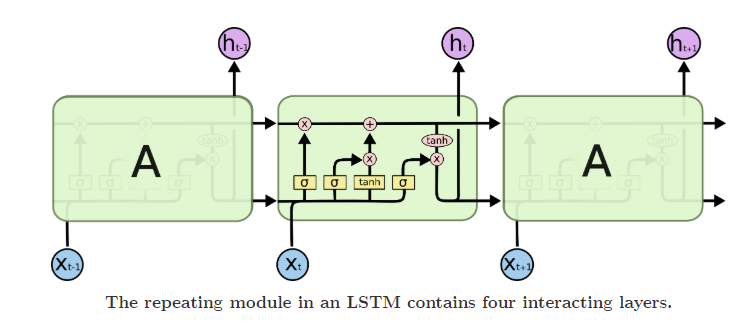

In [32]:
tf.reset_default_graph()
tf.set_random_seed(777)

# 입력 데이터
inputs = np.array([[[1, 0]]])

tf_inputs = tf.constant(inputs, dtype=tf.float32)
cell = tf.nn.rnn_cell.LSTMCell(num_units=1)
outputs, _states = tf.nn.dynamic_rnn(cell=cell, dtype=tf.float32, inputs=tf_inputs)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    outputs_run, states_run = sess.run([outputs, _states])
    print("-------------1")
    print("output valures")
    print(outputs_run)
    print("-------------2")
    print("\n memory cell value")
    print(states_run.c)  #> 메모리셀 출력
    print("-------------3")
    print("\n hidden state value")
    print(states_run.h)  #> 셀이 하나이기 때문에 output과 state 값 같다

-------------1
output valures
[[[0.09927537]]]
-------------2

 memory cell value
[[0.18134572]]
-------------3

 hidden state value
[[0.09927537]]


## LSTM 이용한 문장 분류 예제

    - 이진 분류: 해당 문장이 음식 관련인가, 스포츠 관련인가 판별

In [3]:
paragraph_dict_list = [
         {'paragraph': 'dishplace is located in sunnyvale downtown there is parking around the area but it can be difficult to find during peak business hours my sisters and i came to this place for dinner on a weekday they were really busy so i highly recommended making reservations unless you have the patience to wait', 'category': 'food'},
         {'paragraph': 'service can be slower during busy hours but our waiter was courteous and help gave some great entree recommendations', 'category': 'food'},
         {'paragraph': 'portions are huge both french toast and their various omelettes are really good their french toast is probably 1.5x more than other brunch places great place to visit if you are hungry and dont want to wait 1 hour for a table', 'category': 'food'},
         {'paragraph': 'we started with apps going the chicken and waffle slides and chicken nachos the sliders were amazing and the nachos were good too maybe by themselves the nachos would have scored better but after those sliders they were up against some tough competition', 'category': 'food'},
         {'paragraph': 'the biscuits and gravy was too salty two people in my group had the gravy and all thought it was too salty my hubby ordered a side of double egg and it was served on two small plates who serves eggs to one person on separate plates we commented on that when it was delivered and even the server laughed and said she doesnt know why the kitchen does that presentation of food is important and they really missed on this one', 'category': 'food'},
         {'paragraph': 'the garlic fries were a great starter (and a happy hour special) the pancakes looked and tasted great and were a fairly generous portion', 'category': 'food'},
         {'paragraph': 'our meal was excellent i had the pasta ai formaggi which was so rich i didnt dare eat it all although i certainly wanted to excellent flavors with a great texture contrast between the soft pasta and the crisp bread crumbs too much sauce for me but a wonderful dish', 'category': 'food'},
         {'paragraph': 'what i enjoy most about palo alto is so many restaurants have dog-friendly seating outside i had bookmarked italico from when they first opened about a 1.5 years ago and was jonesing for some pasta so time to finally knock that bookmark off', 'category': 'food'},
         {'paragraph': 'the drinks came out fairly quickly a good two to three minutes after the orders were taken i expected my iced tea to taste a bit more sweet but this was straight up green tea with ice in it not to complain of course but i was pleasantly surprised', 'category': 'food'},
         {'paragraph': 'despite the not so good burger the service was so slow the restaurant wasnt even half full and they took very long from the moment we got seated to the time we left it was almost 2 hours we thought that it would be quick since we ordered as soon as we sat down my coworkers did seem to enjoy their beef burgers for those who eat beef however i will not be returning it is too expensive and extremely slow service', 'category': 'food'},
    
         {'paragraph': 'the four reigning major champions simona halep caroline wozniacki angelique kerber and defending us open champion sloane stephens could make a case for being the quartet most likely to succeed especially as all but stephens has also enjoyed the no1 ranking within the last 14 months as they prepare for their gruelling new york campaigns they currently hold the top four places in the ranks', 'category': 'sports'},
         {'paragraph': 'the briton was seeded nn7 here last year before a slump in form and confidence took her down to no46 after five first-round losses but there have been signs of a turnaround including a victory over a sub-par serena williams in san jose plus wins against jelena ostapenko and victoria azarenka in montreal. konta pulled out of new haven this week with illness but will hope for good things where she first scored wins in a major before her big breakthroughs to the semis in australia and wimbledon', 'category': 'sports'},
         {'paragraph': 'stephens surged her way back from injury in stunning style to win her first major here last year—and ranked just no83 she has since proved what a big time player she is winning the miami title via four fellow major champions then reaching the final at the french open back on north american hard courts she ran to the final in montreal only just edged out by halep she has also avoided many of the big names in her quarter—except for wild card azarenka as a possible in the third round', 'category': 'sports'},
         {'paragraph': 'when it came to england chances in the world cup it would be fair to say that most fans had never been more pessimistic than they were this year after enduring years of truly dismal performances at major tournaments – culminating in the 2014 event where they failed to win any of their three group games and finished in bottom spot those results led to the resignation of manager roy hodgson', 'category': 'sports'},
         {'paragraph': 'the team that eliminated russia – croatia – also improved enormously during the tournament before it began their odds were 33/1 but they played with real flair and star players like luka modric ivan rakitic and ivan perisic showed their quality on the world stage having displayed their potential by winning all three of their group stage games croatia went on to face difficult tests like the semi-final against england', 'category': 'sports'},
         {'paragraph': 'the perseyside outfit finished in fourth place in the premier league table and without a trophy last term after having reached the champions league final before losing to real madrid', 'category': 'sports'},
         {'paragraph': 'liverpool fc will return to premier league action on saturday lunchtime when they travel to leicester city in the top flight as they look to make it four wins in a row in the league', 'category': 'sports'},
         {'paragraph': 'alisson signed for liverpool fc from as roma this summer and the brazilian goalkeeper has helped the reds to keep three clean sheets in their first three premier league games', 'category': 'sports'},
         {'paragraph': 'but the rankings during that run-in to new york hid some very different undercurrents for murray had struggled with a hip injury since the clay swing and had not played a match since losing his quarter-final at wimbledon and he would pull out of the us open just two days before the tournament began—too late however to promote nederer to the no2 seeding', 'category': 'sports'},
         {'paragraph': 'then came the oh-so-familiar djokovic-nadal no-quarter-given battle for dominance in the thiadal more than once pulled off a reverse smash and had his chance to seal the tie-break but it was djokovic serving at 10-9 who dragged one decisive error from nadal for a two-sets lead', 'category': 'sports'}
]

df = pd.DataFrame(paragraph_dict_list)
df = df[["paragraph", "category"]]
df

,paragraph,category
0,dishplace is located in sunnyvale downtown the...,food
1,service can be slower during busy hours but ou...,food
2,portions are huge both french toast and their ...,food
3,we started with apps going the chicken and waf...,food
4,the biscuits and gravy was too salty two peopl...,food
5,the garlic fries were a great starter (and a h...,food
6,our meal was excellent i had the pasta ai form...,food
7,what i enjoy most about palo alto is so many r...,food
8,the drinks came out fairly quickly a good two ...,food
9,despite the not so good burger the service was...,food


In [4]:
# 데이터의 벡터화: one_hot 인코딩, 인덱스 부여
results = set()
df["paragraph"].str.lower().str.split(" ").apply(results.update)  #> 중복되는 단어 제거

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
Name: paragraph, dtype: object

In [5]:
results

{'(and',
 '1',
 '1.5',
 '1.5x',
 '10-9',
 '14',
 '2',
 '2014',
 '33/1',
 'a',
 'about',
 'action',
 'after',
 'against',
 'ago',
 'ai',
 'alisson',
 'all',
 'almost',
 'also',
 'although',
 'alto',
 'amazing',
 'american',
 'and',
 'angelique',
 'any',
 'apps',
 'are',
 'area',
 'around',
 'as',
 'at',
 'australia',
 'avoided',
 'azarenka',
 'back',
 'battle',
 'be',
 'beef',
 'been',
 'before',
 'began',
 'began—too',
 'being',
 'better',
 'between',
 'big',
 'biscuits',
 'bit',
 'bookmark',
 'bookmarked',
 'both',
 'bottom',
 'brazilian',
 'bread',
 'breakthroughs',
 'briton',
 'brunch',
 'burger',
 'burgers',
 'business',
 'busy',
 'but',
 'by',
 'came',
 'campaigns',
 'can',
 'card',
 'caroline',
 'case',
 'certainly',
 'champion',
 'champions',
 'chance',
 'chances',
 'chicken',
 'city',
 'clay',
 'clean',
 'commented',
 'competition',
 'complain',
 'confidence',
 'contrast',
 'could',
 'course',
 'courteous',
 'courts',
 'coworkers',
 'crisp',
 'croatia',
 'crumbs',
 'culminating

In [6]:
idx2word = dict(enumerate(results))  #> 각 단어 앞에 숫자형 인덱스 부여
idx2word

{0: 'people',
 1: 'although',
 2: 'style',
 3: 'montreal.',
 4: 'double',
 5: 'event',
 6: 'fans',
 7: 'taken',
 8: 'good',
 9: 'seal',
 10: 'prepare',
 11: 'dog-friendly',
 12: 'scored',
 13: 'happy',
 14: 'located',
 15: 'pulled',
 16: 'even',
 17: 'sunnyvale',
 18: 'sloane',
 19: 'complain',
 20: 'any',
 21: 'nachos',
 22: 'most',
 23: 'keep',
 24: 'who',
 25: 'action',
 26: 'i',
 27: 'omelettes',
 28: 'probably',
 29: 'serena',
 30: 'green',
 31: 'nn7',
 32: 'eliminated',
 33: 'final',
 34: 'hid',
 35: 'did',
 36: 'goalkeeper',
 37: 'dismal',
 38: 'left',
 39: 'iced',
 40: 'england',
 41: 'leicester',
 42: 'djokovic',
 43: 'results',
 44: 'no2',
 45: 'fair',
 46: 'year—and',
 47: 'when',
 48: 'downtown',
 49: 'really',
 50: 'italico',
 51: 'three',
 52: 'alto',
 53: 'bread',
 54: 'term',
 55: 'murray',
 56: 'bit',
 57: 'proved',
 58: 'difficult',
 59: 'recommendations',
 60: 'liverpool',
 61: 'help',
 62: 'despite',
 63: 'look',
 64: 'on',
 65: 'losing',
 66: 'burgers',
 67: 'konta

In [7]:
word2idx = {v:k for k, v in idx2word.items()}  #> 인덱스 값을 단어로 변환할 수 있도록

In [8]:
word2idx['bread']
word2idx['tournament']
idx2word[223]

'special)'

In [9]:
# 문장들을 전부 벡터화하기 위한 함수
def encode_paragraph(paragraph):
    words = paragraph.split(" ")
    encoded = []
    for word in words:
        encoded.append([word2idx[word]])
        
    return encoded

def encode_category(category):
    if category == "food":
        return [1, 0]
    else:
        return [0, 1]
    
def word_cnt(paragraph):
        #> 입력값 가장 긴 길이 기준으로 모두 같도록 패딩 처리 위해 함수 생성(학습 때는 패딩 부분 건너뛸 수 있도록)
    return len(paragraph.split(" "))  
    

dynamic RNN

학습시 패딩처리된 부분에 가중치 부여하지 않기 위해 실제 문장의 전체 길이 입력하여 패딩처리된 부분은 빼고 학습할 수 있도록

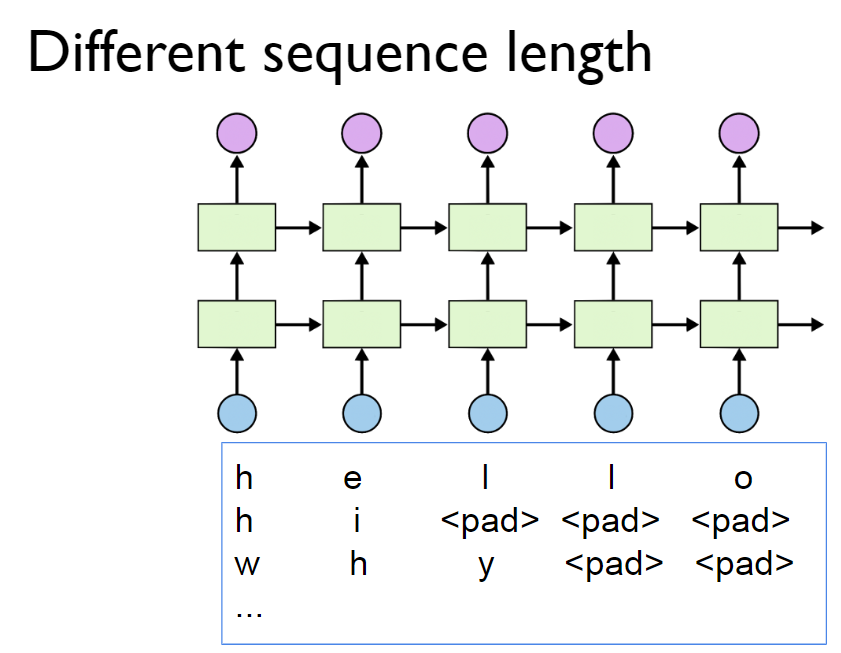

In [10]:
df["enc_paragraph"] = df.paragraph.apply(encode_paragraph)

In [11]:
df["enc_category"] = df.category.apply(encode_category)

In [12]:
df["seq_length"] = df.paragraph.apply(word_cnt)

In [13]:
df

,paragraph,category,enc_paragraph,enc_category,seq_length
0,dishplace is located in sunnyvale downtown the...,food,"[[206], [377], [14], [365], [17], [48], [111],...","[1, 0]",53
1,service can be slower during busy hours but ou...,food,"[[81], [405], [471], [149], [208], [214], [236...","[1, 0]",19
2,portions are huge both french toast and their ...,food,"[[470], [385], [286], [495], [171], [464], [72...","[1, 0]",42
3,we started with apps going the chicken and waf...,food,"[[520], [356], [429], [209], [115], [465], [18...","[1, 0]",43
4,the biscuits and gravy was too salty two peopl...,food,"[[465], [318], [72], [366], [482], [436], [224...","[1, 0]",82
5,the garlic fries were a great starter (and a h...,food,"[[465], [522], [505], [159], [378], [89], [213...","[1, 0]",24
6,our meal was excellent i had the pasta ai form...,food,"[[361], [512], [482], [88], [26], [118], [465]...","[1, 0]",50
7,what i enjoy most about palo alto is so many r...,food,"[[368], [26], [334], [22], [243], [372], [52],...","[1, 0]",43
8,the drinks came out fairly quickly a good two ...,food,"[[465], [441], [325], [420], [227], [459], [37...","[1, 0]",49
9,despite the not so good burger the service was...,food,"[[62], [465], [99], [432], [8], [246], [465], ...","[1, 0]",82


In [14]:
# 문장의 최대 길이 알아내기
max_word_cnt = 0
for row in df["paragraph"]:
    if len(row.split(" ")) > max_word_cnt:
        max_word_cnt = len(row.split(" "))

print(max_word_cnt)

91


In [15]:
# 문장의 길이가 91개보다 적은 문장은 -1로 패딩 처리
def sequence_padding(enc_paragraph):
    seq_length = len(enc_paragraph)
    for i in range(seq_length, max_word_cnt):
        enc_paragraph.append([-1])
        
    return enc_paragraph

In [16]:
df["enc_paragraph"] = df.enc_paragraph.apply(sequence_padding)

In [17]:
print(df["enc_paragraph"][0])

[[206], [377], [14], [365], [17], [48], [111], [377], [474], [502], [465], [439], [414], [101], [405], [471], [58], [229], [254], [208], [155], [460], [236], [232], [74], [72], [26], [325], [229], [165], [86], [182], [135], [64], [378], [519], [131], [159], [49], [214], [432], [26], [322], [490], [402], [433], [331], [92], [317], [465], [235], [229], [427], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1]]


In [18]:
# 입력값들을 배열로 변환
enc_paragraph = np.array(df.enc_paragraph.tolist())
enc_category = np.array(df.enc_category.tolist())
seq_length = np.array(df.seq_length.tolist())

In [20]:
train_X = enc_paragraph
train_y = enc_category

In [21]:
train_X.shape

(20, 91, 1)

In [22]:
train_y.shape

(20, 2)

In [33]:
### 모델 구축(graph 작업)

tf.reset_default_graph()
tf.set_random_seed(777)

# hyper parameter
learning_rate = 0.01
n_epochs = 300

# 입력값
X = tf.placeholder(tf.float32, [None, max_word_cnt, 1])
y = tf.placeholder(tf.int32, [None, 2])

embedding = tf.layers.dense(X, 5)  #> 가중치 생성

# 셀 생성
cell = tf.nn.rnn_cell.LSTMCell(num_units=64)
output, state = tf.nn.dynamic_rnn(cell, embedding, dtype=tf.float32, sequence_length=seq_length)
    #> sequence_length= dynamic_rnn의 특징: 패딩처리된 부분에 가중치 부여되지 않도록
    
dense_layer = tf.layers.dense(state.h, 32)
logits = tf.layers.dense(dense_layer, 2)  #> 최종 출력
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=logits)
loss = tf.reduce_mean(cross_entropy)
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

In [34]:
print(X)
print(embedding)
print(state)
print(dense_layer)
print(logits)

Tensor("Placeholder:0", shape=(?, 91, 1), dtype=float32)
Tensor("dense/BiasAdd:0", shape=(?, 91, 5), dtype=float32)
LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_3:0' shape=(?, 64) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_4:0' shape=(?, 64) dtype=float32>)
Tensor("dense_1/BiasAdd:0", shape=(?, 32), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 2), dtype=float32)


In [35]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(n_epochs):
        _, cost = sess.run([train, loss], feed_dict={X:train_X, y:train_y})
        if epoch % 50 == 0:  #> 50번에 한 번씩 예측(=test)을 하여 가중치 계산하도록(batch와 비슷. 재학습)
            pred = tf.nn.softmax(logits)
            correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
            accuracy = tf.reduce_mean(tf.cast(correct_pred, "float"))
            cur_acc = accuracy.eval({X:train_X, y:train_y})
            print("epoch: " + str(epoch) + ", loss: " + str(cost) + ", accuracy: " + str(cur_acc))

epoch: 0, loss: 0.862068, accuracy: 0.5
epoch: 50, loss: 0.36421818, accuracy: 0.95
epoch: 100, loss: 0.0016771763, accuracy: 1.0
epoch: 150, loss: 0.0006939138, accuracy: 1.0
epoch: 200, loss: 0.00041225943, accuracy: 1.0
epoch: 250, loss: 0.00028893515, accuracy: 1.0


## 한 문장을 예측하는 RNN

    - https://github.com/hunkim/DeepLearningZeroToAll/blob/master/lab-12-2-char-seq-rnn.py
    
    - 별다른 처리 없이 실행 경우 성능↓

In [38]:
# Lab 12 Character Sequence RNN
import tensorflow as tf
import numpy as np
tf.reset_default_graph()
tf.set_random_seed(777)  # reproducibility

sample = " if you want you"
idx2char = list(set(sample))  # index -> char
char2idx = {c: i for i, c in enumerate(idx2char)}  # char -> idex

# hyper parameters
dic_size = len(char2idx)  # RNN input size (one hot size)
hidden_size = len(char2idx)  # RNN output size
num_classes = len(char2idx)  # final output size (RNN or softmax, etc.)
batch_size = 1  # one sample data, one batch
sequence_length = len(sample) - 1  # number of lstm rollings (unit #)
learning_rate = 0.1

sample_idx = [char2idx[c] for c in sample]  # char to index
x_data = [sample_idx[:-1]]  # X data sample (0 ~ n-1) hello: hell
y_data = [sample_idx[1:]]   # Y label sample (1 ~ n) hello: ello

X = tf.placeholder(tf.int32, [None, sequence_length])  # X data
Y = tf.placeholder(tf.int32, [None, sequence_length])  # Y label

x_one_hot = tf.one_hot(X, num_classes)  # one hot: 1 -> 0 1 0 0 0 0 0 0 0 0
cell = tf.contrib.rnn.BasicLSTMCell(
    num_units=hidden_size, state_is_tuple=True)
initial_state = cell.zero_state(batch_size, tf.float32)
outputs, _states = tf.nn.dynamic_rnn(
    cell, x_one_hot, initial_state=initial_state, dtype=tf.float32)

# FC layer
X_for_fc = tf.reshape(outputs, [-1, hidden_size])
outputs = tf.contrib.layers.fully_connected(X_for_fc, num_classes, activation_fn=None)

# reshape out for sequence_loss
outputs = tf.reshape(outputs, [batch_size, sequence_length, num_classes])

weights = tf.ones([batch_size, sequence_length])
sequence_loss = tf.contrib.seq2seq.sequence_loss(
    logits=outputs, targets=Y, weights=weights)
loss = tf.reduce_mean(sequence_loss)
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

prediction = tf.argmax(outputs, axis=2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(50):
        l, _ = sess.run([loss, train], feed_dict={X: x_data, Y: y_data})
        result = sess.run(prediction, feed_dict={X: x_data})

        # print char using dic
        result_str = [idx2char[c] for c in np.squeeze(result)]

        print(i, "loss:", l, "Prediction:", ''.join(result_str))

0 loss: 2.3186605 Prediction: yyyyyu   u   uu
1 loss: 2.165562 Prediction: yy you       ou
2 loss: 1.98673 Prediction: yy you       ou
3 loss: 1.7699809 Prediction: yyyyou yo   you
4 loss: 1.5151334 Prediction: yy you yo   you
5 loss: 1.2516125 Prediction: yy you   n  you
6 loss: 0.97098696 Prediction: yf you   nt you
7 loss: 0.7252831 Prediction: yf you want you
8 loss: 0.52419734 Prediction: yf you want you
9 loss: 0.3601996 Prediction: yf you want you
10 loss: 0.24662189 Prediction: if you want you
11 loss: 0.1768838 Prediction: if you want you
12 loss: 0.1307644 Prediction: if you want you
13 loss: 0.0977444 Prediction: if you want you
14 loss: 0.07194104 Prediction: if you want you
15 loss: 0.05281914 Prediction: if you want you
16 loss: 0.0390743 Prediction: if you want you
17 loss: 0.02899177 Prediction: if you want you
18 loss: 0.021653261 Prediction: if you want you
19 loss: 0.016521202 Prediction: if you want you
20 loss: 0.01290335 Prediction: if you want you
21 loss: 0.0101

## 긴 문장 예측 RNN

In [39]:
from __future__ import print_function

import tensorflow as tf
import numpy as np
from tensorflow.contrib import rnn

tf.set_random_seed(777)  # reproducibility

sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

char_set = list(set(sentence))
char_dic = {w: i for i, w in enumerate(char_set)}

data_dim = len(char_set)
hidden_size = len(char_set)
num_classes = len(char_set)
sequence_length = 10  # Any arbitrary number
learning_rate = 0.1

dataX = []
dataY = []
for i in range(0, len(sentence) - sequence_length):
    x_str = sentence[i:i + sequence_length]
    y_str = sentence[i + 1: i + sequence_length + 1]
    print(i, x_str, '->', y_str)

    x = [char_dic[c] for c in x_str]  # x str to index
    y = [char_dic[c] for c in y_str]  # y str to index

    dataX.append(x)
    dataY.append(y)

batch_size = len(dataX)

X = tf.placeholder(tf.int32, [None, sequence_length])
Y = tf.placeholder(tf.int32, [None, sequence_length])

# One-hot encoding
X_one_hot = tf.one_hot(X, num_classes)
print(X_one_hot)  # check out the shape


# Make a lstm cell with hidden_size (each unit output vector size)
def lstm_cell():
    cell = rnn.BasicLSTMCell(hidden_size, state_is_tuple=True)
    return cell

multi_cells = rnn.MultiRNNCell([lstm_cell() for _ in range(2)], state_is_tuple=True)  
    #> MultiRNNCell 복수의 cell 생성
    #> 버전 업에 따라 *2가 아닌 반복문 사용(Lab12-RNN 슬라이드와 차이)

# outputs: unfolding size x hidden size, state = hidden size
outputs, _states = tf.nn.dynamic_rnn(multi_cells, X_one_hot, dtype=tf.float32)

# FC layer
X_for_fc = tf.reshape(outputs, [-1, hidden_size])
outputs = tf.contrib.layers.fully_connected(X_for_fc, num_classes, activation_fn=None)  
    #> 성능 향상 위해 활성화 함수x(최종 logit은 별도의 활성화 함수 적용하지 않는다)

# reshape out for sequence_loss
outputs = tf.reshape(outputs, [batch_size, sequence_length, num_classes])

# All weights are 1 (equal weights)
weights = tf.ones([batch_size, sequence_length])

sequence_loss = tf.contrib.seq2seq.sequence_loss(
    logits=outputs, targets=Y, weights=weights)  #> 활성화함수 처리(위에서 처리될 경우 왜곡될 가능성 있다)
mean_loss = tf.reduce_mean(sequence_loss)
train_op = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(mean_loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(500):
    _, l, results = sess.run(
        [train_op, mean_loss, outputs], feed_dict={X: dataX, Y: dataY})
    for j, result in enumerate(results):
        index = np.argmax(result, axis=1)
        print(i, j, ''.join([char_set[t] for t in index]), l)

# Let's print the last char of each result to check it works
results = sess.run(outputs, feed_dict={X: dataX})
for j, result in enumerate(results):
    index = np.argmax(result, axis=1)
    if j is 0:  # print all for the first result to make a sentence
        print(''.join([char_set[t] for t in index]), end='')
    else:
        print(char_set[index[-1]], end='')

0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't dru
28  don't dru -> don't drum
29 don't drum -> on't drum 
30 on't drum  -> n't drum u
31 n't drum u -> 't drum up
32 't drum up -> t drum up 
33 t drum up  ->  drum up p
34  drum up p -> drum up pe
35 drum up pe -> rum up peo
36

0 0 o..ygeggee 3.2173018
0 1 syygggggew 3.2173018
0 2 wwgggggwww 3.2173018
0 3 hgeeeeeaar 3.2173018
0 4  eeeeemrrm 3.2173018
0 5 eweeaaarmm 3.2173018
0 6 wwwaaarmm  3.2173018
0 7 menrrrrr   3.2173018
0 8 nnrrrrriif 3.2173018
0 9 mrrumiffff 3.2173018
0 10 wwwiiiiff  3.2173018
0 11 wwiiigwg   3.2173018
0 12 w   ggg  i 3.2173018
0 13   gggggggw 3.2173018
0 14 wgwwwgwwww 3.2173018
0 15 gg.eegeww. 3.2173018
0 16 eeeeeeie.. 3.2173018
0 17 oteiiiww.f 3.2173018
0 18 yggiiiwwfu 3.2173018
0 19 uiiiiuuuuu 3.2173018
0 20 wwwwa.faau 3.2173018
0 21 nna..foauu 3.2173018
0 22 wyyfffuuuu 3.2173018
0 23 .ffffluuuu 3.2173018
0 24 ffflluuuuu 3.2173018
0 25 omkkuuuuuu 3.2173018
0 26  ppuuuuuuu 3.2173018
0 27 kwwiimmuuu 3.2173018
0 28 wii    uuu 3.2173018
0 29 u  m   uuu 3.2173018
0 30  mmmm uuuu 3.2173018
0 31 mmmruuuuuu 3.2173018
0 32 mmtuuuuuuu 3.2173018
0 33 wwiuuiiiii 3.2173018
0 34 wiiuiiiii  3.2173018
0 35 uussiiii   3.2173018
0 36 nenneeeg   3.2173018
0 37 eniieeg    3.2173018
0 38 iiiiig     3.2173

3 0 eeeeeeeeee 2.8870049
3 1 eeeeeeeeee 2.8870049
3 2 eeeeeeeeee 2.8870049
3 3 eeeeeeeeee 2.8870049
3 4 eeeeeeeeee 2.8870049
3 5 eeeeeeeeee 2.8870049
3 6 eeeeeeeeee 2.8870049
3 7 eeeeeeeeee 2.8870049
3 8 eeeeeeeeee 2.8870049
3 9 eeeeeeeeee 2.8870049
3 10 eeeeeeeeee 2.8870049
3 11 eeeeeeeeee 2.8870049
3 12 eeeeeeeeee 2.8870049
3 13 eeeeeeeeee 2.8870049
3 14 eeeeeeeeee 2.8870049
3 15 eeeeeeeeee 2.8870049
3 16 eeeeeeeeee 2.8870049
3 17 eeeeeeeeee 2.8870049
3 18 eeeeeeeeee 2.8870049
3 19 eeeeeeeeee 2.8870049
3 20 eeeeeeeeee 2.8870049
3 21 eeeeeeeeee 2.8870049
3 22 eeeeeeeeee 2.8870049
3 23 eeeeeeeeee 2.8870049
3 24 eeeeeeeeee 2.8870049
3 25 eeeeeeeeee 2.8870049
3 26 eeeeeeeeee 2.8870049
3 27 eeeeeeeeee 2.8870049
3 28 eeeeeeeeee 2.8870049
3 29 eeeeeeeeee 2.8870049
3 30 eeeeeeeeee 2.8870049
3 31 eeeeeeeeee 2.8870049
3 32 eeeeeeeeee 2.8870049
3 33 eeeeeeeeee 2.8870049
3 34 eeeeeeeeee 2.8870049
3 35 eeeeeeeeee 2.8870049
3 36 eeeeeeeeee 2.8870049
3 37 eeeeeeeeee 2.8870049
3 38 eeeeeeeeee 2.8870

6 0            2.836226
6 1            2.836226
6 2            2.836226
6 3            2.836226
6 4            2.836226
6 5            2.836226
6 6            2.836226
6 7            2.836226
6 8            2.836226
6 9            2.836226
6 10            2.836226
6 11            2.836226
6 12            2.836226
6 13            2.836226
6 14            2.836226
6 15            2.836226
6 16            2.836226
6 17            2.836226
6 18            2.836226
6 19            2.836226
6 20            2.836226
6 21            2.836226
6 22            2.836226
6 23            2.836226
6 24            2.836226
6 25            2.836226
6 26            2.836226
6 27            2.836226
6 28            2.836226
6 29            2.836226
6 30            2.836226
6 31            2.836226
6 32            2.836226
6 33            2.836226
6 34            2.836226
6 35            2.836226
6 36            2.836226
6 37            2.836226
6 38            2.836226
6 39            2.836226
6 40      

9 0            2.7419243
9 1            2.7419243
9 2            2.7419243
9 3            2.7419243
9 4            2.7419243
9 5            2.7419243
9 6            2.7419243
9 7            2.7419243
9 8            2.7419243
9 9            2.7419243
9 10            2.7419243
9 11            2.7419243
9 12            2.7419243
9 13            2.7419243
9 14            2.7419243
9 15            2.7419243
9 16            2.7419243
9 17            2.7419243
9 18            2.7419243
9 19    n       2.7419243
9 20            2.7419243
9 21            2.7419243
9 22            2.7419243
9 23            2.7419243
9 24            2.7419243
9 25            2.7419243
9 26            2.7419243
9 27     n      2.7419243
9 28            2.7419243
9 29            2.7419243
9 30            2.7419243
9 31            2.7419243
9 32            2.7419243
9 33            2.7419243
9 34            2.7419243
9 35            2.7419243
9 36            2.7419243
9 37            2.7419243
9 38            2.7419

12 0         nn 2.5853782
12 1        nn  2.5853782
12 2       nn d 2.5853782
12 3      nn d  2.5853782
12 4     nn d   2.5853782
12 5    nn d    2.5853782
12 6   nn d     2.5853782
12 7  nn d      2.5853782
12 8  n         2.5853782
12 9            2.5853782
12 10            2.5853782
12 11            2.5853782
12 12          s 2.5853782
12 13  d      sn 2.5853782
12 14        nnn 2.5853782
12 15       nnnn 2.5853782
12 16      nnnnn 2.5853782
12 17    nnnnnn  2.5853782
12 18   nnnnnn   2.5853782
12 19  nnnnnn    2.5853782
12 20  nnnnn     2.5853782
12 21  nnnn    n 2.5853782
12 22  n n    nn 2.5853782
12 23 s      nn  2.5853782
12 24       nn   2.5853782
12 25      nn    2.5853782
12 26     nn     2.5853782
12 27  dnnnd     2.5853782
12 28   nn       2.5853782
12 29  nn        2.5853782
12 30            2.5853782
12 31            2.5853782
12 32            2.5853782
12 33            2.5853782
12 34            2.5853782
12 35            2.5853782
12 36            2.5853782
12 37      

15 0   t   ttsd 2.3803182
15 1  t   ttsd  2.3803182
15 2 t   ttsd t 2.3803182
15 3    ttsd t  2.3803182
15 4   ttsd t   2.3803182
15 5  ttsd t  d 2.3803182
15 6 ttss t  dt 2.3803182
15 7  ss t  dt  2.3803182
15 8 ss t  dt t 2.3803182
15 9   t  tt t  2.3803182
15 10  t  tt t   2.3803182
15 11 t  dt t  t 2.3803182
15 12   dt t  ts 2.3803182
15 13  dt t  tss 2.3803182
15 14 tt t  tsss 2.3803182
15 15   t  tsssn 2.3803182
15 16  t  tsssnn 2.3803182
15 17    ssssnn  2.3803182
15 18   ssssnn   2.3803182
15 19  dsssnn  t 2.3803182
15 20 tsssnn  t  2.3803182
15 21 sssnn  t s 2.3803182
15 22 ts    t sd 2.3803182
15 23 s    t sd  2.3803182
15 24     t dd   2.3803182
15 25  e t dd  t 2.3803182
15 26   t dd  tt 2.3803182
15 27  dnddt ttt 2.3803182
15 28 t dd  ttt  2.3803182
15 29  dd  ttt   2.3803182
15 30  t  ttt  t 2.3803182
15 31    t t  t  2.3803182
15 32   t    t   2.3803182
15 33  t    t  t 2.3803182
15 34 t    t  t  2.3803182
15 35     t  t   2.3803182
15 36    t  t    2.3803182
15 37   t  

18 0 s te  ttsd 2.144446
18 1  te  ttid  2.144446
18 2 t   ttsd t 2.144446
18 3  t ttsd t  2.144446
18 4 t ttsd te  2.144446
18 5  ttsd t  t 2.144446
18 6 tosd te tt 2.144446
18 7  sd te ttu 2.144446
18 8 sd te ttuu 2.144446
18 9 t t  ttuuu 2.144446
18 10  te ttuuu  2.144446
18 11 to ttuuu t 2.144446
18 12   ttuuu ts 2.144446
18 13 tttuuu tsd 2.144446
18 14 tt tt tsdi 2.144446
18 15 t tt tsdii 2.144446
18 16  to tsdiin 2.144446
18 17 so tsdiin  2.144446
18 18   ssdiin   2.144446
18 19  tsdiin  t 2.144446
18 20 tsdiin  to 2.144446
18 21 sdiin  tot 2.144446
18 22 tsin  totd 2.144446
18 23 s n  totdt 2.144446
18 24  te totdt  2.144446
18 25 sh totdt t 2.144446
18 26   totdt to 2.144446
18 27  totdt tot 2.144446
18 28 totdt tott 2.144446
18 29  tdt tott  2.144446
18 30 ttt tott t 2.144446
18 31 tt t tt tt 2.144446
18 32 t tot  tt  2.144446
18 33  to   t  t 2.144446
18 34 to   t  te 2.144446
18 35     t  te  2.144446
18 36    t  te t 2.144446
18 37   to te te 2.144446
18 38  to te te  2.144

21 0 sote  toid 1.8540773
21 1  te  toid  1.8540773
21 2 to otoid t 1.8540773
21 3  t toid to 1.8540773
21 4 t toid to  1.8540773
21 5  toid to t 1.8540773
21 6 tosd to tu 1.8540773
21 7  sd to tu, 1.8540773
21 8 sd to tu,u 1.8540773
21 9 t to tu,uu 1.8540773
21 10  to tu uu  1.8540773
21 11 to tu,uu t 1.8540773
21 12   tu uu ts 1.8540773
21 13 tdu uu tsn 1.8540773
21 14 tu uu tsni 1.8540773
21 15 t uu tsnii 1.8540773
21 16  tt tsn  n 1.8540773
21 17 st tsd  n  1.8540773
21 18   tsdi n   1.8540773
21 19  tsd  n  t 1.8540773
21 20 tsdi n  to 1.8540773
21 21 sdi n  tot 1.8540773
21 22 ts ny tot' 1.8540773
21 23 s nm tot't 1.8540773
21 24  to tot't  1.8540773
21 25 sh tot't t 1.8540773
21 26   tot't tt 1.8540773
21 27  tot't ttu 1.8540773
21 28 tot't ttu  1.8540773
21 29  t't ttu   1.8540773
21 30 tdt t    t 1.8540773
21 31 tt t    t, 1.8540773
21 32 t to   ti  1.8540773
21 33  to   to t 1.8540773
21 34 to   to to 1.8540773
21 35     to to  1.8540773
21 36    to te t 1.8540773
21 37   to 

24 0 dhto otond 1.5311357
24 1  to  tond  1.5311357
24 2 to otand t 1.5311357
24 3    tond to 1.5311357
24 4 t aand to  1.5311357
24 5  tond to t 1.5311357
24 6 toss to tu 1.5311357
24 7 osd to tui 1.5311357
24 8 sd to tuiu 1.5311357
24 9 d to tuiud 1.5311357
24 10 eto tuiud  1.5311357
24 11 to tuiud a 1.5311357
24 12 e tuiud an 1.5311357
24 13 tduiud ans 1.5311357
24 14 tuiud ans  1.5311357
24 15 u ud ansii 1.5311357
24 16  td tnsiip 1.5311357
24 17 dn tnsi ph 1.5311357
24 18 eetssi po  1.5311357
24 19  tnsi ph t 1.5311357
24 20 tnsi ph to 1.5311357
24 21 ssiipy ton 1.5311357
24 22 tsiny ton' 1.5311357
24 23   ny ton't 1.5311357
24 24 eto ton't  1.5311357
24 25 dh ton't t 1.5311357
24 26   ton't tu 1.5311357
24 27  toa't tuu 1.5311357
24 28 ton't tuuu 1.5311357
24 29  t't tuuu  1.5311357
24 30 t't tuu  u 1.5311357
24 31 dt tuu  ul 1.5311357
24 32 t to l ao  1.5311357
24 33 eto   ao p 1.5311357
24 34 to l po pe 1.5311357
24 35     ao peo 1.5311357
24 36    to peon 1.5311357
24 37   to 

27 0 dhto  aand 1.2356067
27 1  to  aand  1.2356067
27 2 to  aand t 1.2356067
27 3    tand to 1.2356067
27 4   aand to  1.2356067
27 5  aand to b 1.2356067
27 6 tond to bu 1.2356067
27 7 ond ao bui 1.2356067
27 8 sd ao buil 1.2356067
27 9 d ao build 1.2356067
27 10  to tuild  1.2356067
27 11 to tuild a 1.2356067
27 12   tuild an 1.2356067
27 13  duild ans 1.2356067
27 14 tuild ans  1.2356067
27 15 uild ans i 1.2356067
27 16  td ans ip 1.2356067
27 17 dt tns ip, 1.2356067
27 18 eetns ip,  1.2356067
27 19  tns ip, p 1.2356067
27 20 tnship, po 1.2356067
27 21 sship, pon 1.2356067
27 22 tkin, don' 1.2356067
27 23  ip, don't 1.2356067
27 24 eto don't  1.2356067
27 25 d, don't d 1.2356067
27 26   don't da 1.2356067
27 27  doa't dau 1.2356067
27 28 ton't daum 1.2356067
27 29  a't daum  1.2356067
27 30  dt daum u 1.2356067
27 31 dt daum up 1.2356067
27 32 t arum up  1.2356067
27 33  to   bp p 1.2356067
27 34 to   dp pe 1.2356067
27 35     bp peo 1.2356067
27 36    bp peop 1.2356067
27 37   dp 

30 0 s to  aand 0.9815513
30 1  to  aaod  0.9815513
30 2 tot aand t 0.9815513
30 3    tand to 0.9815513
30 4   aand to  0.9815513
30 5 ,aand to b 0.9815513
30 6 tond to bu 0.9815513
30 7 ond to bui 0.9815513
30 8 sd wo buil 0.9815513
30 9 d ao build 0.9815513
30 10  th luild  0.9815513
30 11 to build a 0.9815513
30 12   cuild an 0.9815513
30 13  duild ans 0.9815513
30 14 tuild ans  0.9815513
30 15 uild ans i 0.9815513
30 16 ,td ans ip 0.9815513
30 17 sd t ship, 0.9815513
30 18 eetns ip,  0.9815513
30 19  anship, d 0.9815513
30 20 tnship, do 0.9815513
30 21 sship, don 0.9815513
30 22 tkip, don' 0.9815513
30 23 iip, don't 0.9815513
30 24 etl don't  0.9815513
30 25 s, don't a 0.9815513
30 26   don't ar 0.9815513
30 27  don't aru 0.9815513
30 28 ton't arum 0.9815513
30 29  a't arum  0.9815513
30 30  dt arum r 0.9815513
30 31 dt arum rp 0.9815513
30 32 t arum bp  0.9815513
30 33  to m bp p 0.9815513
30 34 torm bp pe 0.9815513
30 35     bp peo 0.9815513
30 36 al bp peop 0.9815513
30 37 , bp 

33 0 m tor aand 0.7828405
33 1  tor want  0.7828405
33 2 to  wand t 0.7828405
33 3  m tand to 0.7828405
33 4   aand to  0.7828405
33 5 ,aand to b 0.7828405
33 6 ton' to bu 0.7828405
33 7 on' to bui 0.7828405
33 8 sd to buil 0.7828405
33 9 d to build 0.7828405
33 10 hwh build  0.7828405
33 11 to cuild a 0.7828405
33 12 h cuild a  0.7828405
33 13  duild a s 0.7828405
33 14 tuild a sh 0.7828405
33 15 uild a shi 0.7828405
33 16 ,ld a ship 0.7828405
33 17 md a ship, 0.7828405
33 18 eet ship,  0.7828405
33 19  anship, d 0.7828405
33 20 tnship, do 0.7828405
33 21 sship, don 0.7828405
33 22 thip, don' 0.7828405
33 23  ip, don't 0.7828405
33 24 ety don't  0.7828405
33 25 m, don't d 0.7828405
33 26 l don't dr 0.7828405
33 27  bon't dru 0.7828405
33 28 ton't arum 0.7828405
33 29  a't drum  0.7828405
33 30  dt drum u 0.7828405
33 31 dt arum up 0.7828405
33 32 t arum up  0.7828405
33 33 hwoum rp p 0.7828405
33 34 toum bp pe 0.7828405
33 35  um rp peo 0.7828405
33 36 a  rp peop 0.7828405
33 37 , bp 

36 0 m to maant 0.6185384
36 1  to  want  0.6185384
36 2 to  want t 0.6185384
36 3  m want to 0.6185384
36 4   want to  0.6185384
36 5 iwant to b 0.6185384
36 6 tont to bu 0.6185384
36 7 ont to bui 0.6185384
36 8 sd to buil 0.6185384
36 9 d to build 0.6185384
36 10 hwh build  0.6185384
36 11 to build a 0.6185384
36 12 h build a  0.6185384
36 13  build a s 0.6185384
36 14 tuild a sh 0.6185384
36 15 uild a shi 0.6185384
36 16 ild a ship 0.6185384
36 17 md a ship, 0.6185384
36 18 eet ship,  0.6185384
36 19  d ship, d 0.6185384
36 20 tnship, do 0.6185384
36 21 sship, don 0.6185384
36 22 thip, don' 0.6185384
36 23  ip, don't 0.6185384
36 24 et, don't  0.6185384
36 25 m, don't a 0.6185384
36 26 l don't ar 0.6185384
36 27  don't aru 0.6185384
36 28 ton't arum 0.6185384
36 29  n't arum  0.6185384
36 30  't arum u 0.6185384
36 31 dt arum up 0.6185384
36 32 t arum up  0.6185384
36 33 hwoum up p 0.6185384
36 34 toum up pe 0.6185384
36 35  um up peo 0.6185384
36 36  t rp peop 0.6185384
36 37 i bp 

39 0 m to  want 0.5100881
39 1  to  want  0.5100881
39 2 to  want t 0.5100881
39 3  r want to 0.5100881
39 4   want to  0.5100881
39 5  want to b 0.5100881
39 6 tont to bu 0.5100881
39 7 ont to bui 0.5100881
39 8 cd to buil 0.5100881
39 9 d to build 0.5100881
39 10 hwo build  0.5100881
39 11 to build a 0.5100881
39 12 h cuild a  0.5100881
39 13  build a s 0.5100881
39 14 tuild a sh 0.5100881
39 15 uild a shi 0.5100881
39 16  ld a ship 0.5100881
39 17 md a ship, 0.5100881
39 18 eew ship,  0.5100881
39 19  a ship, d 0.5100881
39 20 tnship, do 0.5100881
39 21 cship, don 0.5100881
39 22 thip, don' 0.5100881
39 23 sip, don't 0.5100881
39 24 et, don't  0.5100881
39 25 m, don't d 0.5100881
39 26 l don't dr 0.5100881
39 27  don't dru 0.5100881
39 28 ton't drum 0.5100881
39 29  n't drum  0.5100881
39 30  dt drum u 0.5100881
39 31 dt drum up 0.5100881
39 32 t arum up  0.5100881
39 33 hwrum up p 0.5100881
39 34 toum up pe 0.5100881
39 35  um up peo 0.5100881
39 36  t up peop 0.5100881
39 37   rp 

42 0 m fou want 0.4307914
42 1  tou want  0.4307914
42 2 tou want t 0.4307914
42 3 or want to 0.4307914
42 4 r want to  0.4307914
42 5  want to b 0.4307914
42 6 tont to bu 0.4307914
42 7 ont to bui 0.4307914
42 8 cd to buil 0.4307914
42 9 d to build 0.4307914
42 10 hwo build  0.4307914
42 11 to build a 0.4307914
42 12 h cuild a  0.4307914
42 13 rbuild a s 0.4307914
42 14 tuild a sh 0.4307914
42 15 utld a shi 0.4307914
42 16  ld a ship 0.4307914
42 17 md a ship, 0.4307914
42 18 eew ship,  0.4307914
42 19  anship, d 0.4307914
42 20 tnship, do 0.4307914
42 21 cship, don 0.4307914
42 22 thip, don' 0.4307914
42 23  ip, don't 0.4307914
42 24 ep, don't  0.4307914
42 25 m, don't d 0.4307914
42 26 l don't dr 0.4307914
42 27  don't dru 0.4307914
42 28 ton't drum 0.4307914
42 29  n't drum  0.4307914
42 30 rdt drum u 0.4307914
42 31 dt drum up 0.4307914
42 32 t drum up  0.4307914
42 33 hwrum up p 0.4307914
42 34 toum up pe 0.4307914
42 35  um up peo 0.4307914
42 36  m up peop 0.4307914
42 37   up 

45 0 t fou want 0.37502548
45 1  fou want  0.37502548
45 2 tou want t 0.37502548
45 3 or want to 0.37502548
45 4   want to  0.37502548
45 5 pwant to b 0.37502548
45 6 tant to bu 0.37502548
45 7 ont to bui 0.37502548
45 8 cd to buil 0.37502548
45 9 d to build 0.37502548
45 10 hwo build  0.37502548
45 11 to cuild a 0.37502548
45 12 h cuild a  0.37502548
45 13  build a s 0.37502548
45 14 tuild a sh 0.37502548
45 15 utld a shi 0.37502548
45 16 pld a ship 0.37502548
45 17 td a ship, 0.37502548
45 18 eea ship,  0.37502548
45 19  a ship, d 0.37502548
45 20 tnship, do 0.37502548
45 21 cship, don 0.37502548
45 22 thip, don' 0.37502548
45 23 sip, don't 0.37502548
45 24 ep, don't  0.37502548
45 25 t, don't d 0.37502548
45 26 e don't dr 0.37502548
45 27  don't dru 0.37502548
45 28 ton't drum 0.37502548
45 29  n't drum  0.37502548
45 30  dt drum u 0.37502548
45 31 dt drum up 0.37502548
45 32 t drum up  0.37502548
45 33 hwrum up p 0.37502548
45 34 toum up pe 0.37502548
45 35  um up peo 0.37502548
45

48 0 t fou want 0.3370123
48 1 ofou want  0.3370123
48 2 tou want t 0.3370123
48 3 ou want to 0.3370123
48 4 r want to  0.3370123
48 5 pwant to b 0.3370123
48 6 tont to bu 0.3370123
48 7 ont to bui 0.3370123
48 8 sd to buil 0.3370123
48 9 d to build 0.3370123
48 10  wo build  0.3370123
48 11 to cuild a 0.3370123
48 12   cuild a  0.3370123
48 13 rbuild a s 0.3370123
48 14 tutld a sh 0.3370123
48 15 uild a shi 0.3370123
48 16 pld a ship 0.3370123
48 17 td a ship, 0.3370123
48 18 eea ship,  0.3370123
48 19  a ship, d 0.3370123
48 20 tnship, do 0.3370123
48 21 sship, don 0.3370123
48 22 thip, don' 0.3370123
48 23  ip, don't 0.3370123
48 24 ep, don't  0.3370123
48 25 t, don't a 0.3370123
48 26 e don't ar 0.3370123
48 27  bon't aru 0.3370123
48 28 ton't arum 0.3370123
48 29  n't arum  0.3370123
48 30 r't arum u 0.3370123
48 31 dt arum up 0.3370123
48 32 t arum up  0.3370123
48 33  wrum up p 0.3370123
48 34 toum up pe 0.3370123
48 35  um up peo 0.3370123
48 36  m up peop 0.3370123
48 37 p up 

51 0 m dou want 0.30852655
51 1 ofou want  0.30852655
51 2 tou want t 0.30852655
51 3 ou want to 0.30852655
51 4   want to  0.30852655
51 5 iwant to b 0.30852655
51 6 tont to bu 0.30852655
51 7 ont to bui 0.30852655
51 8 nd to buil 0.30852655
51 9 d to build 0.30852655
51 10 hwo build  0.30852655
51 11 to cuild a 0.30852655
51 12 h cuild a  0.30852655
51 13  build a s 0.30852655
51 14 tutld a sh 0.30852655
51 15 uild a shi 0.30852655
51 16 ild a ship 0.30852655
51 17 md a ship, 0.30852655
51 18 eea ship,  0.30852655
51 19  anship, d 0.30852655
51 20 tnship, do 0.30852655
51 21 nship, don 0.30852655
51 22 thip, don' 0.30852655
51 23  ip, don't 0.30852655
51 24 ep, don't  0.30852655
51 25 m, don't a 0.30852655
51 26 l don't ar 0.30852655
51 27  bon't aru 0.30852655
51 28 ton't drum 0.30852655
51 29  n't drum  0.30852655
51 30  't drum u 0.30852655
51 31 dt drum up 0.30852655
51 32 t drum up  0.30852655
51 33 hwrum up p 0.30852655
51 34 toum up pe 0.30852655
51 35  um up peo 0.30852655
51

54 0 m you want 0.28924644
54 1  tou want  0.28924644
54 2 tou want t 0.28924644
54 3 ou want to 0.28924644
54 4 n want to  0.28924644
54 5 mwant to b 0.28924644
54 6 tont to bu 0.28924644
54 7 ont to bui 0.28924644
54 8 sd to buil 0.28924644
54 9 d to build 0.28924644
54 10 hao build  0.28924644
54 11 to cuild a 0.28924644
54 12 h cuild a  0.28924644
54 13 ncuild a s 0.28924644
54 14 tuild a sh 0.28924644
54 15 utld a shi 0.28924644
54 16 mld a ship 0.28924644
54 17 md a ship, 0.28924644
54 18 eea ship,  0.28924644
54 19  anship, d 0.28924644
54 20 tnship, do 0.28924644
54 21 sship, don 0.28924644
54 22 thip, don' 0.28924644
54 23  ip, don't 0.28924644
54 24 ep, don't  0.28924644
54 25 m, don't d 0.28924644
54 26 , don't dr 0.28924644
54 27  don't aru 0.28924644
54 28 ton't drum 0.28924644
54 29  n't drum  0.28924644
54 30 n't drum u 0.28924644
54 31 dt drum up 0.28924644
54 32 t drum up  0.28924644
54 33 harum up p 0.28924644
54 34 toum up pe 0.28924644
54 35  um up peo 0.28924644
54

57 0 m you want 0.27594307
57 1  you want  0.27594307
57 2 tou want t 0.27594307
57 3  u want to 0.27594307
57 4   want to  0.27594307
57 5 mwant to b 0.27594307
57 6 tont to bu 0.27594307
57 7 ont to bui 0.27594307
57 8 nd to buil 0.27594307
57 9 d to build 0.27594307
57 10  ao build  0.27594307
57 11 to build a 0.27594307
57 12   build a  0.27594307
57 13  cuild a s 0.27594307
57 14 tuild a sh 0.27594307
57 15 uild a shi 0.27594307
57 16 mld a ship 0.27594307
57 17 md a ship, 0.27594307
57 18 eea ship,  0.27594307
57 19  anship, d 0.27594307
57 20 tnship, do 0.27594307
57 21 nship, don 0.27594307
57 22 thip, don' 0.27594307
57 23  ip, don't 0.27594307
57 24 ep, don't  0.27594307
57 25 m, don't a 0.27594307
57 26 e don't dr 0.27594307
57 27  don't aru 0.27594307
57 28 ton't drum 0.27594307
57 29  n't drum  0.27594307
57 30  't drum u 0.27594307
57 31 dt drum up 0.27594307
57 32 t drum up  0.27594307
57 33  arum up p 0.27594307
57 34 toum up pe 0.27594307
57 35  um up peo 0.27594307
57

60 0 p you want 0.26536146
60 1  you want  0.26536146
60 2 tou want t 0.26536146
60 3  u want to 0.26536146
60 4   want to  0.26536146
60 5 mwant to b 0.26536146
60 6 tont to bu 0.26536146
60 7 ont to bui 0.26536146
60 8 sd to buil 0.26536146
60 9 d to build 0.26536146
60 10 hao build  0.26536146
60 11 to luild a 0.26536146
60 12 h build a  0.26536146
60 13  build a s 0.26536146
60 14 tuild a sh 0.26536146
60 15 uild a shi 0.26536146
60 16 mld a ship 0.26536146
60 17 pd a ship, 0.26536146
60 18 l a ship,  0.26536146
60 19  anship, d 0.26536146
60 20 tnship, do 0.26536146
60 21 sship, don 0.26536146
60 22 thip, don' 0.26536146
60 23  ip, don't 0.26536146
60 24 ep, don't  0.26536146
60 25 p, don't a 0.26536146
60 26   don't dr 0.26536146
60 27  don't aru 0.26536146
60 28 ton't arum 0.26536146
60 29  n't arum  0.26536146
60 30  't arum u 0.26536146
60 31 dt arum up 0.26536146
60 32 t drum up  0.26536146
60 33 harum up p 0.26536146
60 34 toum up pe 0.26536146
60 35  um up peo 0.26536146
60

63 0 p you want 0.25714135
63 1 oyou want  0.25714135
63 2 tou want t 0.25714135
63 3 ou want to 0.25714135
63 4   want to  0.25714135
63 5 twant to b 0.25714135
63 6 tont to bu 0.25714135
63 7 ont to bui 0.25714135
63 8 nd to buil 0.25714135
63 9 d to build 0.25714135
63 10 hao build  0.25714135
63 11 to luild a 0.25714135
63 12 h build a  0.25714135
63 13  build a s 0.25714135
63 14 tuild a sh 0.25714135
63 15 uild a shi 0.25714135
63 16 tld a ship 0.25714135
63 17 pd a ship, 0.25714135
63 18 l a ship,  0.25714135
63 19  a ship, d 0.25714135
63 20 tnship, do 0.25714135
63 21 nship, don 0.25714135
63 22 thip, don' 0.25714135
63 23  ip, don't 0.25714135
63 24 ep, don't  0.25714135
63 25 p, don't d 0.25714135
63 26   don't dr 0.25714135
63 27  don't dru 0.25714135
63 28 ton't arum 0.25714135
63 29  n't drum  0.25714135
63 30  't drum u 0.25714135
63 31 dt drum up 0.25714135
63 32 t drum up  0.25714135
63 33 harum up p 0.25714135
63 34 toum up pe 0.25714135
63 35  um up peo 0.25714135
63

66 0 g you want 0.2539869
66 1 oyou want  0.2539869
66 2 tou want t 0.2539869
66 3 ou want to 0.2539869
66 4 n want to  0.2539869
66 5 iwant to b 0.2539869
66 6 tont to bu 0.2539869
66 7 ont to bui 0.2539869
66 8 nd to buil 0.2539869
66 9 d to build 0.2539869
66 10  ao build  0.2539869
66 11 to cuild a 0.2539869
66 12   cuild a  0.2539869
66 13 nbuild a s 0.2539869
66 14 tuild a sh 0.2539869
66 15 uild a shi 0.2539869
66 16 ild a ship 0.2539869
66 17 gd a ship, 0.2539869
66 18 e a ship,  0.2539869
66 19  a ship, d 0.2539869
66 20 tnship, do 0.2539869
66 21 nship, don 0.2539869
66 22 thip, don' 0.2539869
66 23  ip, don't 0.2539869
66 24 ep, don't  0.2539869
66 25 g, don't d 0.2539869
66 26   don't dr 0.2539869
66 27  don't dru 0.2539869
66 28 ton't drum 0.2539869
66 29  n't drum  0.2539869
66 30 n't drum u 0.2539869
66 31 dt drum up 0.2539869
66 32 t drum up  0.2539869
66 33  arum up p 0.2539869
66 34 toum up pe 0.2539869
66 35  um up peo 0.2539869
66 36  m up peop 0.2539869
66 37 i up 

69 0 g you want 0.24837758
69 1  you want  0.24837758
69 2 tou want t 0.24837758
69 3 ou want to 0.24837758
69 4 n want to  0.24837758
69 5 mwant to b 0.24837758
69 6 tont to bu 0.24837758
69 7 ont to bui 0.24837758
69 8 nd to buil 0.24837758
69 9 ' to build 0.24837758
69 10 hao build  0.24837758
69 11 to luild a 0.24837758
69 12 h build a  0.24837758
69 13 nluild a s 0.24837758
69 14 tuild a sh 0.24837758
69 15 utld a shi 0.24837758
69 16 mld a ship 0.24837758
69 17 gd a ship, 0.24837758
69 18 e a ship,  0.24837758
69 19  anship, d 0.24837758
69 20 tnship, do 0.24837758
69 21 nship, don 0.24837758
69 22 thip, don' 0.24837758
69 23 iip, don't 0.24837758
69 24 ep, don't  0.24837758
69 25 g, don't d 0.24837758
69 26 e don't dr 0.24837758
69 27  don't dru 0.24837758
69 28 ton't drum 0.24837758
69 29  n't drum  0.24837758
69 30 n't drum u 0.24837758
69 31 't arum up 0.24837758
69 32 t arum up  0.24837758
69 33 harum up p 0.24837758
69 34 toum up pe 0.24837758
69 35  um up peo 0.24837758
69

72 0 p you want 0.24465889
72 1  you want  0.24465889
72 2 tou want t 0.24465889
72 3 ou want to 0.24465889
72 4 n want to  0.24465889
72 5 mwant to b 0.24465889
72 6 tont to bu 0.24465889
72 7 ont to bui 0.24465889
72 8 nd to buil 0.24465889
72 9 d to build 0.24465889
72 10 hao build  0.24465889
72 11 to luild a 0.24465889
72 12 h build a  0.24465889
72 13 nluild a s 0.24465889
72 14 tutld a sh 0.24465889
72 15 utld a shi 0.24465889
72 16 mld a ship 0.24465889
72 17 pd a ship, 0.24465889
72 18 e a ship,  0.24465889
72 19  anship, d 0.24465889
72 20 tnship, do 0.24465889
72 21 nship, don 0.24465889
72 22 thip, don' 0.24465889
72 23 sip, don't 0.24465889
72 24 ep, don't  0.24465889
72 25 p, don't d 0.24465889
72 26 l don't dr 0.24465889
72 27  bon't dru 0.24465889
72 28 ton't drum 0.24465889
72 29  n't drum  0.24465889
72 30 n't arum u 0.24465889
72 31 dt arum up 0.24465889
72 32 t arum up  0.24465889
72 33 harum up p 0.24465889
72 34 toum up pe 0.24465889
72 35  um up peo 0.24465889
72

75 0 p you want 0.24164759
75 1 oyou want  0.24164759
75 2 tou want t 0.24164759
75 3 ou want to 0.24164759
75 4   want to  0.24164759
75 5 mwant to b 0.24164759
75 6 tont to bu 0.24164759
75 7 ont to bui 0.24164759
75 8 nd to buil 0.24164759
75 9 d to build 0.24164759
75 10 hao build  0.24164759
75 11 to luild a 0.24164759
75 12 h build a  0.24164759
75 13  cuild a s 0.24164759
75 14 tuild a sh 0.24164759
75 15 uild a shi 0.24164759
75 16 mld a ship 0.24164759
75 17 pd a ship, 0.24164759
75 18 e a ship,  0.24164759
75 19  a ship, d 0.24164759
75 20 tnship, do 0.24164759
75 21 nship, don 0.24164759
75 22 thip, don' 0.24164759
75 23 sip, don't 0.24164759
75 24 ep, don't  0.24164759
75 25 p, don't d 0.24164759
75 26 l don't dr 0.24164759
75 27  bon't dru 0.24164759
75 28 ton't drum 0.24164759
75 29  n't drum  0.24164759
75 30  't drum u 0.24164759
75 31 dt drum up 0.24164759
75 32 t arum up  0.24164759
75 33 harum up p 0.24164759
75 34 toum up pe 0.24164759
75 35  um up peo 0.24164759
75

78 0 m you want 0.23972628
78 1 oyou want  0.23972628
78 2 tou want t 0.23972628
78 3 ou want to 0.23972628
78 4 n want to  0.23972628
78 5 mwant to b 0.23972628
78 6 tont to bu 0.23972628
78 7 ont to bui 0.23972628
78 8 nd to buil 0.23972628
78 9 d to build 0.23972628
78 10 hao build  0.23972628
78 11 to cuild a 0.23972628
78 12 h cuild a  0.23972628
78 13 nluild a s 0.23972628
78 14 tuild a sh 0.23972628
78 15 utld a shi 0.23972628
78 16 mld a ship 0.23972628
78 17 md a ship, 0.23972628
78 18 e a ship,  0.23972628
78 19  a ship, d 0.23972628
78 20 tnship, do 0.23972628
78 21 nship, don 0.23972628
78 22 thip, don' 0.23972628
78 23 sip, don't 0.23972628
78 24 ep, don't  0.23972628
78 25 m, don't d 0.23972628
78 26 e don't dr 0.23972628
78 27  don't dru 0.23972628
78 28 ton't arum 0.23972628
78 29  n't drum  0.23972628
78 30 n't drum u 0.23972628
78 31 dt drum up 0.23972628
78 32 t drum up  0.23972628
78 33 harum up p 0.23972628
78 34 toum up pe 0.23972628
78 35  um up peo 0.23972628
78

81 0 l you want 0.23814583
81 1 oyou want  0.23814583
81 2 tou want t 0.23814583
81 3 ou want to 0.23814583
81 4   want to  0.23814583
81 5 iwant to b 0.23814583
81 6 tont to bu 0.23814583
81 7 ont to bui 0.23814583
81 8 nd to buil 0.23814583
81 9 d to build 0.23814583
81 10 hto build  0.23814583
81 11 to luild a 0.23814583
81 12 h luild a  0.23814583
81 13  cuild a s 0.23814583
81 14 tutld a sh 0.23814583
81 15 utld a shi 0.23814583
81 16 ild a ship 0.23814583
81 17 ld a ship, 0.23814583
81 18 e a ship,  0.23814583
81 19  anship, d 0.23814583
81 20 tnship, do 0.23814583
81 21 nship, don 0.23814583
81 22 thip, don' 0.23814583
81 23  ip, don't 0.23814583
81 24 ep, don't  0.23814583
81 25 l, don't d 0.23814583
81 26 l don't dr 0.23814583
81 27  don't dru 0.23814583
81 28 ton't drum 0.23814583
81 29  n't arum  0.23814583
81 30  't arum u 0.23814583
81 31 dt arum up 0.23814583
81 32 t drum up  0.23814583
81 33 htrum up p 0.23814583
81 34 toum up pe 0.23814583
81 35  um up peo 0.23814583
81

84 0 m you want 0.23676732
84 1  you want  0.23676732
84 2 tou want t 0.23676732
84 3  u want to 0.23676732
84 4   want to  0.23676732
84 5 twant to b 0.23676732
84 6 tont to bu 0.23676732
84 7 ont to bui 0.23676732
84 8 nd to buil 0.23676732
84 9 d to build 0.23676732
84 10 hwo build  0.23676732
84 11 to cuild a 0.23676732
84 12 h cuild a  0.23676732
84 13  build a s 0.23676732
84 14 tutld a sh 0.23676732
84 15 uild a shi 0.23676732
84 16 tld a ship 0.23676732
84 17 md a ship, 0.23676732
84 18 e a ship,  0.23676732
84 19  a ship, d 0.23676732
84 20 tnship, do 0.23676732
84 21 nship, don 0.23676732
84 22 thip, don' 0.23676732
84 23  ip, don't 0.23676732
84 24 ep, don't  0.23676732
84 25 m, don't d 0.23676732
84 26 e don't dr 0.23676732
84 27  don't dru 0.23676732
84 28 ton't drum 0.23676732
84 29  n't drum  0.23676732
84 30  't arum u 0.23676732
84 31 dt arum up 0.23676732
84 32 t arum up  0.23676732
84 33 hwrum up p 0.23676732
84 34 toum up pe 0.23676732
84 35  um up peo 0.23676732
84

87 0 m you want 0.23580576
87 1  you want  0.23580576
87 2 tou want t 0.23580576
87 3  u want to 0.23580576
87 4 n want to  0.23580576
87 5 twant to b 0.23580576
87 6 tont to bu 0.23580576
87 7 ont to bui 0.23580576
87 8 nd to buil 0.23580576
87 9 d to build 0.23580576
87 10  wo build  0.23580576
87 11 to cuild a 0.23580576
87 12   cuild a  0.23580576
87 13 nbuild a s 0.23580576
87 14 tuild a sh 0.23580576
87 15 utld a shi 0.23580576
87 16 tld a ship 0.23580576
87 17 md a ship, 0.23580576
87 18 e a ship,  0.23580576
87 19  anship, d 0.23580576
87 20 tnship, do 0.23580576
87 21 nship, don 0.23580576
87 22 thip, don' 0.23580576
87 23 sip, don't 0.23580576
87 24 ep, don't  0.23580576
87 25 m, don't d 0.23580576
87 26 e don't dr 0.23580576
87 27  bon't dru 0.23580576
87 28 ton't arum 0.23580576
87 29  n't drum  0.23580576
87 30 n't arum u 0.23580576
87 31 dt arum up 0.23580576
87 32 t arum up  0.23580576
87 33  wrum up p 0.23580576
87 34 toum up pe 0.23580576
87 35  um up peo 0.23580576
87

90 0 m you want 0.23498216
90 1 oyou want  0.23498216
90 2 tou want t 0.23498216
90 3 ou want to 0.23498216
90 4 n want to  0.23498216
90 5  want to b 0.23498216
90 6 tont to bu 0.23498216
90 7 ont to bui 0.23498216
90 8 nd to buil 0.23498216
90 9 d to build 0.23498216
90 10 hao build  0.23498216
90 11 to luild a 0.23498216
90 12 h luild a  0.23498216
90 13 nbuild a s 0.23498216
90 14 tuild a sh 0.23498216
90 15 utld a shi 0.23498216
90 16  ld a ship 0.23498216
90 17 md a ship, 0.23498216
90 18 e a ship,  0.23498216
90 19  a ship, d 0.23498216
90 20 tnship, do 0.23498216
90 21 nship, don 0.23498216
90 22 thip, don' 0.23498216
90 23 sip, don't 0.23498216
90 24 ep, don't  0.23498216
90 25 m, don't d 0.23498216
90 26 , don't dr 0.23498216
90 27  don't dru 0.23498216
90 28 ton't arum 0.23498216
90 29  n't drum  0.23498216
90 30 n't drum u 0.23498216
90 31 dt arum up 0.23498216
90 32 t arum up  0.23498216
90 33 harum up p 0.23498216
90 34 toum up pe 0.23498216
90 35  um up peo 0.23498216
90

93 0 t you want 0.2342354
93 1 oyou want  0.2342354
93 2 tou want t 0.2342354
93 3 ou want to 0.2342354
93 4   want to  0.2342354
93 5 mwant to b 0.2342354
93 6 tont to bu 0.2342354
93 7 ont to bui 0.2342354
93 8 nd to buil 0.2342354
93 9 d to build 0.2342354
93 10  ao build  0.2342354
93 11 to luild a 0.2342354
93 12   luild a  0.2342354
93 13  cuild a s 0.2342354
93 14 tuild a sh 0.2342354
93 15 uild a shi 0.2342354
93 16 mld a ship 0.2342354
93 17 td a ship, 0.2342354
93 18 e a ship,  0.2342354
93 19  anship, d 0.2342354
93 20 tnship, do 0.2342354
93 21 nship, don 0.2342354
93 22 thip, don' 0.2342354
93 23  ip, don't 0.2342354
93 24 ep, don't  0.2342354
93 25 t, don't d 0.2342354
93 26 e don't dr 0.2342354
93 27  don't dru 0.2342354
93 28 ton't drum 0.2342354
93 29  n't drum  0.2342354
93 30  't arum u 0.2342354
93 31 dt arum up 0.2342354
93 32 t drum up  0.2342354
93 33  arum up p 0.2342354
93 34 toum up pe 0.2342354
93 35  um up peo 0.2342354
93 36  m up peop 0.2342354
93 37 m up 

96 0 g you want 0.23420206
96 1  you want  0.23420206
96 2 tou want t 0.23420206
96 3 ou want to 0.23420206
96 4 n want to  0.23420206
96 5 iwant to b 0.23420206
96 6 tont to bu 0.23420206
96 7 ont to bui 0.23420206
96 8 nd to buil 0.23420206
96 9 d to build 0.23420206
96 10  ao build  0.23420206
96 11 to cuild a 0.23420206
96 12   cuild a  0.23420206
96 13 nluild a s 0.23420206
96 14 tutld a sh 0.23420206
96 15 utld a shi 0.23420206
96 16 ild a ship 0.23420206
96 17 gd a ship, 0.23420206
96 18 e a ship,  0.23420206
96 19  a ship, d 0.23420206
96 20 tnship, do 0.23420206
96 21 nship, don 0.23420206
96 22 thip, don' 0.23420206
96 23  ip, don't 0.23420206
96 24 ep, don't  0.23420206
96 25 g, don't d 0.23420206
96 26 l don't dr 0.23420206
96 27  don't dru 0.23420206
96 28 ton't drum 0.23420206
96 29  n't drum  0.23420206
96 30 n't arum u 0.23420206
96 31 dt arum up 0.23420206
96 32 t drum up  0.23420206
96 33  arum up p 0.23420206
96 34 toum up pe 0.23420206
96 35  um up peo 0.23420206
96

99 0 p you want 0.23351714
99 1  you want  0.23351714
99 2 tou want t 0.23351714
99 3 ou want to 0.23351714
99 4   want to  0.23351714
99 5 pwant to b 0.23351714
99 6 tont to bu 0.23351714
99 7 ont to bui 0.23351714
99 8 nd to buil 0.23351714
99 9 d to build 0.23351714
99 10 hao build  0.23351714
99 11 to luild a 0.23351714
99 12 h luild a  0.23351714
99 13  cuild a s 0.23351714
99 14 tuild a sh 0.23351714
99 15 uild a shi 0.23351714
99 16 pld a ship 0.23351714
99 17 pd a ship, 0.23351714
99 18 e a ship,  0.23351714
99 19  a ship, d 0.23351714
99 20 tnship, do 0.23351714
99 21 nship, don 0.23351714
99 22 thip, don' 0.23351714
99 23 sip, don't 0.23351714
99 24 ep, don't  0.23351714
99 25 p, don't d 0.23351714
99 26 e don't dr 0.23351714
99 27  bon't dru 0.23351714
99 28 ton't arum 0.23351714
99 29  n't arum  0.23351714
99 30  't arum u 0.23351714
99 31 dt arum up 0.23351714
99 32 t arum up  0.23351714
99 33 harum up p 0.23351714
99 34 toum up pe 0.23351714
99 35  um up peo 0.23351714
99

102 0 g you want 0.23321885
102 1 oyou want  0.23321885
102 2 tou want t 0.23321885
102 3 ou want to 0.23321885
102 4   want to  0.23321885
102 5  want to b 0.23321885
102 6 tont to bu 0.23321885
102 7 ont to bui 0.23321885
102 8 nd to buil 0.23321885
102 9 d to build 0.23321885
102 10 hao build  0.23321885
102 11 to build a 0.23321885
102 12 h build a  0.23321885
102 13  luild a s 0.23321885
102 14 tuild a sh 0.23321885
102 15 utld a shi 0.23321885
102 16  ld a ship 0.23321885
102 17 gd a ship, 0.23321885
102 18 e a ship,  0.23321885
102 19  a ship, d 0.23321885
102 20 tnship, do 0.23321885
102 21 nship, don 0.23321885
102 22 thip, don' 0.23321885
102 23 sip, don't 0.23321885
102 24 ep, don't  0.23321885
102 25 g, don't d 0.23321885
102 26 l don't dr 0.23321885
102 27  bon't dru 0.23321885
102 28 ton't drum 0.23321885
102 29  n't drum  0.23321885
102 30  't drum u 0.23321885
102 31 dt drum up 0.23321885
102 32 t arum up  0.23321885
102 33 harum up p 0.23321885
102 34 toum up pe 0.2332

105 0 p you want 0.23296688
105 1 oyou want  0.23296688
105 2 tou want t 0.23296688
105 3 ou want to 0.23296688
105 4 n want to  0.23296688
105 5 twant to b 0.23296688
105 6 tont to bu 0.23296688
105 7 ont to bui 0.23296688
105 8 nd to buil 0.23296688
105 9 d to build 0.23296688
105 10  to build  0.23296688
105 11 to luild a 0.23296688
105 12   cuild a  0.23296688
105 13 nluild a s 0.23296688
105 14 tutld a sh 0.23296688
105 15 uild a shi 0.23296688
105 16 tld a ship 0.23296688
105 17 pd a ship, 0.23296688
105 18 e a ship,  0.23296688
105 19  anship, d 0.23296688
105 20 tnship, do 0.23296688
105 21 nship, don 0.23296688
105 22 thip, don' 0.23296688
105 23  ip, don't 0.23296688
105 24 ep, don't  0.23296688
105 25 p, don't d 0.23296688
105 26 l don't dr 0.23296688
105 27  don't dru 0.23296688
105 28 ton't drum 0.23296688
105 29  n't drum  0.23296688
105 30 n't drum u 0.23296688
105 31 dt drum up 0.23296688
105 32 t arum up  0.23296688
105 33  trum up p 0.23296688
105 34 toum up pe 0.2329

108 0 g you want 0.23256718
108 1 oyou want  0.23256718
108 2 tou want t 0.23256718
108 3 ou want to 0.23256718
108 4   want to  0.23256718
108 5 iwant to b 0.23256718
108 6 tont to bu 0.23256718
108 7 ont to bui 0.23256718
108 8 nd to buil 0.23256718
108 9 d to build 0.23256718
108 10 hao build  0.23256718
108 11 to build a 0.23256718
108 12 h build a  0.23256718
108 13  cuild a s 0.23256718
108 14 tutld a sh 0.23256718
108 15 uild a shi 0.23256718
108 16 ild a ship 0.23256718
108 17 gd a ship, 0.23256718
108 18 e a ship,  0.23256718
108 19  anship, d 0.23256718
108 20 tnship, do 0.23256718
108 21 nship, don 0.23256718
108 22 thip, don' 0.23256718
108 23  ip, don't 0.23256718
108 24 ep, don't  0.23256718
108 25 g, don't d 0.23256718
108 26 l don't dr 0.23256718
108 27  don't dru 0.23256718
108 28 ton't arum 0.23256718
108 29  n't arum  0.23256718
108 30  't arum u 0.23256718
108 31 dt arum up 0.23256718
108 32 t arum up  0.23256718
108 33 harum up p 0.23256718
108 34 toum up pe 0.2325

111 0 g you want 0.23230636
111 1  you want  0.23230636
111 2 tou want t 0.23230636
111 3  u want to 0.23230636
111 4 n want to  0.23230636
111 5 pwant to b 0.23230636
111 6 tont to bu 0.23230636
111 7 ont to bui 0.23230636
111 8 nd to buil 0.23230636
111 9 d to build 0.23230636
111 10  to build  0.23230636
111 11 to luild a 0.23230636
111 12   cuild a  0.23230636
111 13 ncuild a s 0.23230636
111 14 tuild a sh 0.23230636
111 15 utld a shi 0.23230636
111 16 pld a ship 0.23230636
111 17 gd a ship, 0.23230636
111 18 e a ship,  0.23230636
111 19  a ship, d 0.23230636
111 20 tnship, do 0.23230636
111 21 nship, don 0.23230636
111 22 thip, don' 0.23230636
111 23  ip, don't 0.23230636
111 24 ep, don't  0.23230636
111 25 g, don't d 0.23230636
111 26 e don't dr 0.23230636
111 27  don't dru 0.23230636
111 28 ton't drum 0.23230636
111 29  n't drum  0.23230636
111 30 n't drum u 0.23230636
111 31 dt drum up 0.23230636
111 32 t drum up  0.23230636
111 33  trum up p 0.23230636
111 34 toum up pe 0.2323

114 0 t you want 0.23199372
114 1  you want  0.23199372
114 2 tou want t 0.23199372
114 3 ou want to 0.23199372
114 4   want to  0.23199372
114 5 twant to b 0.23199372
114 6 tont to bu 0.23199372
114 7 ont to bui 0.23199372
114 8 nd to buil 0.23199372
114 9 d to build 0.23199372
114 10 hao build  0.23199372
114 11 to cuild a 0.23199372
114 12 h cuild a  0.23199372
114 13  luild a s 0.23199372
114 14 tutld a sh 0.23199372
114 15 uild a shi 0.23199372
114 16 tld a ship 0.23199372
114 17 td a ship, 0.23199372
114 18 e a ship,  0.23199372
114 19  anship, d 0.23199372
114 20 tnship, do 0.23199372
114 21 nship, don 0.23199372
114 22 thip, don' 0.23199372
114 23  ip, don't 0.23199372
114 24 ep, don't  0.23199372
114 25 t, don't d 0.23199372
114 26 , don't dr 0.23199372
114 27  don't dru 0.23199372
114 28 ton't drum 0.23199372
114 29  n't drum  0.23199372
114 30  't drum u 0.23199372
114 31 dt drum up 0.23199372
114 32 t drum up  0.23199372
114 33 harum up p 0.23199372
114 34 toum up pe 0.2319

117 0 t you want 0.23182125
117 1 oyou want  0.23182125
117 2 tou want t 0.23182125
117 3 ou want to 0.23182125
117 4 n want to  0.23182125
117 5 pwant to b 0.23182125
117 6 tont to bu 0.23182125
117 7 ont to bui 0.23182125
117 8 nd to buil 0.23182125
117 9 d to build 0.23182125
117 10  wo build  0.23182125
117 11 to cuild a 0.23182125
117 12   cuild a  0.23182125
117 13 ncuild a s 0.23182125
117 14 tutld a sh 0.23182125
117 15 utld a shi 0.23182125
117 16 pld a ship 0.23182125
117 17 td a ship, 0.23182125
117 18 e a ship,  0.23182125
117 19  a ship, d 0.23182125
117 20 tnship, do 0.23182125
117 21 nship, don 0.23182125
117 22 thip, don' 0.23182125
117 23 sip, don't 0.23182125
117 24 ep, don't  0.23182125
117 25 t, don't d 0.23182125
117 26 e don't dr 0.23182125
117 27  bon't dru 0.23182125
117 28 ton't arum 0.23182125
117 29  n't arum  0.23182125
117 30 n't arum u 0.23182125
117 31 dt arum up 0.23182125
117 32 t arum up  0.23182125
117 33  wrum up p 0.23182125
117 34 toum up pe 0.2318

120 0 m you want 0.23153643
120 1  you want  0.23153643
120 2 tou want t 0.23153643
120 3 ou want to 0.23153643
120 4   want to  0.23153643
120 5 iwant to b 0.23153643
120 6 tont to bu 0.23153643
120 7 ont to bui 0.23153643
120 8 nd to buil 0.23153643
120 9 d to build 0.23153643
120 10 hwo build  0.23153643
120 11 to cuild a 0.23153643
120 12 h cuild a  0.23153643
120 13  luild a s 0.23153643
120 14 tuild a sh 0.23153643
120 15 uild a shi 0.23153643
120 16 ild a ship 0.23153643
120 17 md a ship, 0.23153643
120 18 e a ship,  0.23153643
120 19  a ship, d 0.23153643
120 20 tnship, do 0.23153643
120 21 nship, don 0.23153643
120 22 thip, don' 0.23153643
120 23 iip, don't 0.23153643
120 24 ep, don't  0.23153643
120 25 m, don't d 0.23153643
120 26 , don't dr 0.23153643
120 27  don't dru 0.23153643
120 28 ton't arum 0.23153643
120 29  n't arum  0.23153643
120 30  't arum u 0.23153643
120 31 dt arum up 0.23153643
120 32 t arum up  0.23153643
120 33 hwrum up p 0.23153643
120 34 toum up pe 0.2315

123 0 m you want 0.23134339
123 1  you want  0.23134339
123 2 tou want t 0.23134339
123 3 ou want to 0.23134339
123 4   want to  0.23134339
123 5 twant to b 0.23134339
123 6 tont to bu 0.23134339
123 7 ont to bui 0.23134339
123 8 nd to buil 0.23134339
123 9 d to build 0.23134339
123 10  wo build  0.23134339
123 11 to luild a 0.23134339
123 12   luild a  0.23134339
123 13  cuild a s 0.23134339
123 14 tuild a sh 0.23134339
123 15 uild a shi 0.23134339
123 16 tld a ship 0.23134339
123 17 md a ship, 0.23134339
123 18 e a ship,  0.23134339
123 19  anship, d 0.23134339
123 20 tnship, do 0.23134339
123 21 nship, don 0.23134339
123 22 thip, don' 0.23134339
123 23  ip, don't 0.23134339
123 24 ep, don't  0.23134339
123 25 m, don't d 0.23134339
123 26 e don't dr 0.23134339
123 27  don't dru 0.23134339
123 28 ton't drum 0.23134339
123 29  n't drum  0.23134339
123 30  't drum u 0.23134339
123 31 dt drum up 0.23134339
123 32 t drum up  0.23134339
123 33  wrum up p 0.23134339
123 34 toum up pe 0.2313

126 0 m you want 0.23122782
126 1 oyou want  0.23122782
126 2 tou want t 0.23122782
126 3 ou want to 0.23122782
126 4   want to  0.23122782
126 5 iwant to b 0.23122782
126 6 tont to bu 0.23122782
126 7 ont to bui 0.23122782
126 8 nd to buil 0.23122782
126 9 d to build 0.23122782
126 10 hdo build  0.23122782
126 11 to luild a 0.23122782
126 12 h luild a  0.23122782
126 13  luild a s 0.23122782
126 14 tutld a sh 0.23122782
126 15 utld a shi 0.23122782
126 16 ild a ship 0.23122782
126 17 md a ship, 0.23122782
126 18 e a ship,  0.23122782
126 19  anship, d 0.23122782
126 20 tnship, do 0.23122782
126 21 nship, don 0.23122782
126 22 thip, don' 0.23122782
126 23  ip, don't 0.23122782
126 24 ep, don't  0.23122782
126 25 m, don't d 0.23122782
126 26 l don't dr 0.23122782
126 27  don't dru 0.23122782
126 28 ton't drum 0.23122782
126 29  n't drum  0.23122782
126 30  't drum u 0.23122782
126 31 dt drum up 0.23122782
126 32 t drum up  0.23122782
126 33 hdrum up p 0.23122782
126 34 toum up pe 0.2312

129 0 g you want 0.23131931
129 1 oyou want  0.23131931
129 2 tou want t 0.23131931
129 3 ou want to 0.23131931
129 4 n want to  0.23131931
129 5  want to b 0.23131931
129 6 tont to bu 0.23131931
129 7 ont to bui 0.23131931
129 8 nd to buil 0.23131931
129 9 d to build 0.23131931
129 10  ao build  0.23131931
129 11 to luild a 0.23131931
129 12   luild a  0.23131931
129 13 ncuild a s 0.23131931
129 14 tutld a sh 0.23131931
129 15 utld a shi 0.23131931
129 16  ld a ship 0.23131931
129 17 gd a ship, 0.23131931
129 18 e a ship,  0.23131931
129 19  a ship, d 0.23131931
129 20 tnship, do 0.23131931
129 21 nship, don 0.23131931
129 22 thip, don' 0.23131931
129 23  ip, don't 0.23131931
129 24 ep, don't  0.23131931
129 25 g, don't d 0.23131931
129 26 e don't dr 0.23131931
129 27  bon't dru 0.23131931
129 28 ton't drum 0.23131931
129 29  n't drum  0.23131931
129 30 n't drum u 0.23131931
129 31 dt drum up 0.23131931
129 32 t drum up  0.23131931
129 33  arum up p 0.23131931
129 34 toum up pe 0.2313

132 0 p you want 0.2317017
132 1  you want  0.2317017
132 2 tou want t 0.2317017
132 3 ou want to 0.2317017
132 4   want to  0.2317017
132 5 iwant to b 0.2317017
132 6 tont to bu 0.2317017
132 7 ont to bui 0.2317017
132 8 nd to buil 0.2317017
132 9 d to build 0.2317017
132 10 hdo build  0.2317017
132 11 to build a 0.2317017
132 12 h build a  0.2317017
132 13  build a s 0.2317017
132 14 tuild a sh 0.2317017
132 15 uild a shi 0.2317017
132 16 ild a ship 0.2317017
132 17 pd a ship, 0.2317017
132 18 e a ship,  0.2317017
132 19  anship, d 0.2317017
132 20 tsship, do 0.2317017
132 21 nship, don 0.2317017
132 22 thip, don' 0.2317017
132 23 sip, don't 0.2317017
132 24 ep, don't  0.2317017
132 25 p, don't d 0.2317017
132 26 l don't dr 0.2317017
132 27  don't dru 0.2317017
132 28 ton't arum 0.2317017
132 29  n't arum  0.2317017
132 30  't arum u 0.2317017
132 31 dt arum up 0.2317017
132 32 t arum up  0.2317017
132 33 hdrum up p 0.2317017
132 34 toum up pe 0.2317017
132 35  um up peo 0.2317017
13

135 0 p you want 0.23092587
135 1 oyou want  0.23092587
135 2 tou want t 0.23092587
135 3 ou want to 0.23092587
135 4 n want to  0.23092587
135 5 iwant to b 0.23092587
135 6 tont to bu 0.23092587
135 7 ont to bui 0.23092587
135 8 nd to buil 0.23092587
135 9 d to build 0.23092587
135 10  do build  0.23092587
135 11 to luild a 0.23092587
135 12   build a  0.23092587
135 13 nbuild a s 0.23092587
135 14 tuild a sh 0.23092587
135 15 uild a shi 0.23092587
135 16 ild a ship 0.23092587
135 17 pd a ship, 0.23092587
135 18 e a ship,  0.23092587
135 19  anship, d 0.23092587
135 20 tnship, do 0.23092587
135 21 nship, don 0.23092587
135 22 thip, don' 0.23092587
135 23 sip, don't 0.23092587
135 24 ep, don't  0.23092587
135 25 p, don't d 0.23092587
135 26 e don't dr 0.23092587
135 27  don't dru 0.23092587
135 28 ton't drum 0.23092587
135 29  n't drum  0.23092587
135 30 n't drum u 0.23092587
135 31 dt drum up 0.23092587
135 32 t drum up  0.23092587
135 33  drum up p 0.23092587
135 34 toum up pe 0.2309

138 0 g you want 0.23099713
138 1 oyou want  0.23099713
138 2 tou want t 0.23099713
138 3 ou want to 0.23099713
138 4   want to  0.23099713
138 5 pwant to b 0.23099713
138 6 tont to bu 0.23099713
138 7 ont to bui 0.23099713
138 8 nd to buil 0.23099713
138 9 d to build 0.23099713
138 10 hao build  0.23099713
138 11 to luild a 0.23099713
138 12 h build a  0.23099713
138 13  cuild a s 0.23099713
138 14 tutld a sh 0.23099713
138 15 utld a shi 0.23099713
138 16 pld a ship 0.23099713
138 17 gd a ship, 0.23099713
138 18 e a ship,  0.23099713
138 19  a ship, d 0.23099713
138 20 tnship, do 0.23099713
138 21 nship, don 0.23099713
138 22 thip, don' 0.23099713
138 23  ip, don't 0.23099713
138 24 ep, don't  0.23099713
138 25 g, don't d 0.23099713
138 26 e don't dr 0.23099713
138 27  don't dru 0.23099713
138 28 ton't drum 0.23099713
138 29  n't drum  0.23099713
138 30  't drum u 0.23099713
138 31 dt drum up 0.23099713
138 32 t drum up  0.23099713
138 33 harum up p 0.23099713
138 34 toum up pe 0.2309

141 0 g you want 0.23089278
141 1  you want  0.23089278
141 2 tou want t 0.23089278
141 3 ou want to 0.23089278
141 4   want to  0.23089278
141 5 twant to b 0.23089278
141 6 tont to bu 0.23089278
141 7 ont to bui 0.23089278
141 8 nd to buil 0.23089278
141 9 d to build 0.23089278
141 10  to build  0.23089278
141 11 to luild a 0.23089278
141 12   cuild a  0.23089278
141 13  luild a s 0.23089278
141 14 tutld a sh 0.23089278
141 15 utld a shi 0.23089278
141 16 tld a ship 0.23089278
141 17 gd a ship, 0.23089278
141 18 e a ship,  0.23089278
141 19  a ship, d 0.23089278
141 20 tnship, do 0.23089278
141 21 nship, don 0.23089278
141 22 thip, don' 0.23089278
141 23  ip, don't 0.23089278
141 24 ep, don't  0.23089278
141 25 g, don't d 0.23089278
141 26 e don't dr 0.23089278
141 27  don't dru 0.23089278
141 28 ton't drum 0.23089278
141 29  n't drum  0.23089278
141 30  't drum u 0.23089278
141 31 dt drum up 0.23089278
141 32 t drum up  0.23089278
141 33  trum up p 0.23089278
141 34 toum up pe 0.2308

144 0 m you want 0.2306546
144 1 oyou want  0.2306546
144 2 tou want t 0.2306546
144 3 ou want to 0.2306546
144 4 n want to  0.2306546
144 5 pwant to b 0.2306546
144 6 tont to bu 0.2306546
144 7 ont to bui 0.2306546
144 8 nd to buil 0.2306546
144 9 d to build 0.2306546
144 10 hao build  0.2306546
144 11 to luild a 0.2306546
144 12 h cuild a  0.2306546
144 13 ncuild a s 0.2306546
144 14 tutld a sh 0.2306546
144 15 utld a shi 0.2306546
144 16 pld a ship 0.2306546
144 17 md a ship, 0.2306546
144 18 e a ship,  0.2306546
144 19  a ship, d 0.2306546
144 20 tnship, do 0.2306546
144 21 nship, don 0.2306546
144 22 thip, don' 0.2306546
144 23  ip, don't 0.2306546
144 24 ep, don't  0.2306546
144 25 m, don't d 0.2306546
144 26 e don't dr 0.2306546
144 27  don't dru 0.2306546
144 28 ton't arum 0.2306546
144 29  n't arum  0.2306546
144 30 n't drum u 0.2306546
144 31 dt arum up 0.2306546
144 32 t arum up  0.2306546
144 33 harum up p 0.2306546
144 34 toum up pe 0.2306546
144 35  um up peo 0.2306546
14

147 0 g you want 0.23056076
147 1 oyou want  0.23056076
147 2 tou want t 0.23056076
147 3 ou want to 0.23056076
147 4   want to  0.23056076
147 5 twant to b 0.23056076
147 6 tont to bu 0.23056076
147 7 ont to bui 0.23056076
147 8 nd to buil 0.23056076
147 9 d to build 0.23056076
147 10 hao build  0.23056076
147 11 to cuild a 0.23056076
147 12 h cuild a  0.23056076
147 13  build a s 0.23056076
147 14 tutld a sh 0.23056076
147 15 utld a shi 0.23056076
147 16 tld a ship 0.23056076
147 17 gd a ship, 0.23056076
147 18 e a ship,  0.23056076
147 19  anship, d 0.23056076
147 20 tnship, do 0.23056076
147 21 nship, don 0.23056076
147 22 thip, don' 0.23056076
147 23 sip, don't 0.23056076
147 24 ep, don't  0.23056076
147 25 g, don't d 0.23056076
147 26 e don't dr 0.23056076
147 27  don't dru 0.23056076
147 28 ton't arum 0.23056076
147 29  n't arum  0.23056076
147 30  't arum u 0.23056076
147 31 dt arum up 0.23056076
147 32 t arum up  0.23056076
147 33 harum up p 0.23056076
147 34 toum up pe 0.2305

150 0 m you want 0.23053305
150 1  you want  0.23053305
150 2 tou want t 0.23053305
150 3 ou want to 0.23053305
150 4 n want to  0.23053305
150 5 iwant to b 0.23053305
150 6 tont to bu 0.23053305
150 7 ont to bui 0.23053305
150 8 nd to buil 0.23053305
150 9 d to build 0.23053305
150 10 hao build  0.23053305
150 11 to build a 0.23053305
150 12 h luild a  0.23053305
150 13 nbuild a s 0.23053305
150 14 tuild a sh 0.23053305
150 15 uild a shi 0.23053305
150 16 ild a ship 0.23053305
150 17 md a ship, 0.23053305
150 18 e a ship,  0.23053305
150 19  anship, d 0.23053305
150 20 tnship, do 0.23053305
150 21 nship, don 0.23053305
150 22 thip, don' 0.23053305
150 23 sip, don't 0.23053305
150 24 ep, don't  0.23053305
150 25 m, don't d 0.23053305
150 26 l don't dr 0.23053305
150 27  bon't dru 0.23053305
150 28 ton't arum 0.23053305
150 29  n't arum  0.23053305
150 30 n't arum u 0.23053305
150 31 dt arum up 0.23053305
150 32 t arum up  0.23053305
150 33 harum up p 0.23053305
150 34 toum up pe 0.2305

153 0 m you want 0.23039877
153 1 oyou want  0.23039877
153 2 tou want t 0.23039877
153 3 ou want to 0.23039877
153 4 n want to  0.23039877
153 5 twant to b 0.23039877
153 6 tont to bu 0.23039877
153 7 ont to bui 0.23039877
153 8 nd to buil 0.23039877
153 9 d to build 0.23039877
153 10  do build  0.23039877
153 11 to cuild a 0.23039877
153 12   cuild a  0.23039877
153 13 nbuild a s 0.23039877
153 14 tutld a sh 0.23039877
153 15 utld a shi 0.23039877
153 16 tld a ship 0.23039877
153 17 md a ship, 0.23039877
153 18 e a ship,  0.23039877
153 19  anship, d 0.23039877
153 20 tnship, do 0.23039877
153 21 nship, don 0.23039877
153 22 thip, don' 0.23039877
153 23 sip, don't 0.23039877
153 24 ep, don't  0.23039877
153 25 m, don't d 0.23039877
153 26 e don't dr 0.23039877
153 27  don't dru 0.23039877
153 28 ton't arum 0.23039877
153 29  n't arum  0.23039877
153 30 n't drum u 0.23039877
153 31 dt drum up 0.23039877
153 32 t drum up  0.23039877
153 33  drum up p 0.23039877
153 34 toum up pe 0.2303

156 0 m you want 0.23035939
156 1 oyou want  0.23035939
156 2 tou want t 0.23035939
156 3 ou want to 0.23035939
156 4 n want to  0.23035939
156 5 twant to b 0.23035939
156 6 tont to bu 0.23035939
156 7 ont to bui 0.23035939
156 8 nd to buil 0.23035939
156 9 d to build 0.23035939
156 10  to build  0.23035939
156 11 to cuild a 0.23035939
156 12   cuild a  0.23035939
156 13 ncuild a s 0.23035939
156 14 tutld a sh 0.23035939
156 15 utld a shi 0.23035939
156 16 tld a ship 0.23035939
156 17 md a ship, 0.23035939
156 18 e a ship,  0.23035939
156 19  a ship, d 0.23035939
156 20 tnship, do 0.23035939
156 21 nship, don 0.23035939
156 22 thip, don' 0.23035939
156 23  ip, don't 0.23035939
156 24 ep, don't  0.23035939
156 25 m, don't d 0.23035939
156 26 e don't dr 0.23035939
156 27  don't dru 0.23035939
156 28 ton't drum 0.23035939
156 29  n't drum  0.23035939
156 30 n't drum u 0.23035939
156 31 dt drum up 0.23035939
156 32 t drum up  0.23035939
156 33  trum up p 0.23035939
156 34 toum up pe 0.2303

159 0 m you want 0.23024546
159 1  you want  0.23024546
159 2 tou want t 0.23024546
159 3 ou want to 0.23024546
159 4   want to  0.23024546
159 5 twant to b 0.23024546
159 6 tont to bu 0.23024546
159 7 ont to bui 0.23024546
159 8 nd to buil 0.23024546
159 9 d to build 0.23024546
159 10 hdo build  0.23024546
159 11 to luild a 0.23024546
159 12 h cuild a  0.23024546
159 13  cuild a s 0.23024546
159 14 tutld a sh 0.23024546
159 15 utld a shi 0.23024546
159 16 tld a ship 0.23024546
159 17 md a ship, 0.23024546
159 18 e a ship,  0.23024546
159 19  anship, d 0.23024546
159 20 tnship, do 0.23024546
159 21 nship, don 0.23024546
159 22 thip, don' 0.23024546
159 23  ip, don't 0.23024546
159 24 ep, don't  0.23024546
159 25 m, don't d 0.23024546
159 26 l don't dr 0.23024546
159 27  don't dru 0.23024546
159 28 ton't arum 0.23024546
159 29  n't drum  0.23024546
159 30  't drum u 0.23024546
159 31 dt arum up 0.23024546
159 32 t arum up  0.23024546
159 33 hdrum up p 0.23024546
159 34 toum up pe 0.2302

162 0 m you want 0.23022066
162 1 oyou want  0.23022066
162 2 tou want t 0.23022066
162 3 ou want to 0.23022066
162 4 n want to  0.23022066
162 5 twant to b 0.23022066
162 6 tont to bu 0.23022066
162 7 ont to bui 0.23022066
162 8 nd to buil 0.23022066
162 9 d to build 0.23022066
162 10 hao build  0.23022066
162 11 to luild a 0.23022066
162 12 h luild a  0.23022066
162 13 nluild a s 0.23022066
162 14 tutld a sh 0.23022066
162 15 utld a shi 0.23022066
162 16 tld a ship 0.23022066
162 17 md a ship, 0.23022066
162 18 e a ship,  0.23022066
162 19  anship, d 0.23022066
162 20 tnship, do 0.23022066
162 21 nship, don 0.23022066
162 22 thip, don' 0.23022066
162 23 sip, don't 0.23022066
162 24 ep, don't  0.23022066
162 25 m, don't d 0.23022066
162 26 l don't dr 0.23022066
162 27  don't dru 0.23022066
162 28 ton't arum 0.23022066
162 29  n't arum  0.23022066
162 30 n't arum u 0.23022066
162 31 dt arum up 0.23022066
162 32 t arum up  0.23022066
162 33 harum up p 0.23022066
162 34 toum up pe 0.2302

165 0 g you want 0.23016803
165 1 oyou want  0.23016803
165 2 tou want t 0.23016803
165 3 ou want to 0.23016803
165 4   want to  0.23016803
165 5  want to b 0.23016803
165 6 tont to bu 0.23016803
165 7 ont to bui 0.23016803
165 8 nd to buil 0.23016803
165 9 d to build 0.23016803
165 10  do build  0.23016803
165 11 to luild a 0.23016803
165 12   luild a  0.23016803
165 13  luild a s 0.23016803
165 14 tutld a sh 0.23016803
165 15 utld a shi 0.23016803
165 16  ld a ship 0.23016803
165 17 gd a ship, 0.23016803
165 18 e a ship,  0.23016803
165 19  a ship, d 0.23016803
165 20 tnship, do 0.23016803
165 21 nship, don 0.23016803
165 22 thip, don' 0.23016803
165 23  ip, don't 0.23016803
165 24 ep, don't  0.23016803
165 25 g, don't d 0.23016803
165 26 e don't dr 0.23016803
165 27  don't dru 0.23016803
165 28 ton't arum 0.23016803
165 29  n't arum  0.23016803
165 30  't arum u 0.23016803
165 31 dt arum up 0.23016803
165 32 t arum up  0.23016803
165 33  drum up p 0.23016803
165 34 toum up pe 0.2301

168 0 m you want 0.23017004
168 1 oyou want  0.23017004
168 2 tou want t 0.23017004
168 3 ou want to 0.23017004
168 4   want to  0.23017004
168 5 iwant to b 0.23017004
168 6 tont to bu 0.23017004
168 7 ont to bui 0.23017004
168 8 nd to buil 0.23017004
168 9 d to build 0.23017004
168 10 hao build  0.23017004
168 11 to build a 0.23017004
168 12 h build a  0.23017004
168 13  build a s 0.23017004
168 14 tuild a sh 0.23017004
168 15 uild a shi 0.23017004
168 16 ild a ship 0.23017004
168 17 md a ship, 0.23017004
168 18 e a ship,  0.23017004
168 19  anship, d 0.23017004
168 20 tnship, do 0.23017004
168 21 nship, don 0.23017004
168 22 thip, don' 0.23017004
168 23 sip, don't 0.23017004
168 24 ep, don't  0.23017004
168 25 m, don't d 0.23017004
168 26 l don't dr 0.23017004
168 27  don't dru 0.23017004
168 28 ton't arum 0.23017004
168 29  n't arum  0.23017004
168 30  't arum u 0.23017004
168 31 dt arum up 0.23017004
168 32 t arum up  0.23017004
168 33 harum up p 0.23017004
168 34 toum up pe 0.2301

171 0 g you want 0.23037106
171 1 oyou want  0.23037106
171 2 tou want t 0.23037106
171 3 ou want to 0.23037106
171 4   want to  0.23037106
171 5  want to b 0.23037106
171 6 tont to bu 0.23037106
171 7 ont to bui 0.23037106
171 8 nd to buil 0.23037106
171 9 d to build 0.23037106
171 10  to build  0.23037106
171 11 to luild a 0.23037106
171 12   cuild a  0.23037106
171 13  cuild a s 0.23037106
171 14 tutld a sh 0.23037106
171 15 utld a shi 0.23037106
171 16  ld a ship 0.23037106
171 17 gd a ship, 0.23037106
171 18 e a ship,  0.23037106
171 19  a ship, d 0.23037106
171 20 tnship, do 0.23037106
171 21 nship, don 0.23037106
171 22 thip, don' 0.23037106
171 23  ip, don't 0.23037106
171 24 ep, don't  0.23037106
171 25 g, don't d 0.23037106
171 26 e don't dr 0.23037106
171 27  don't dru 0.23037106
171 28 ton't drum 0.23037106
171 29  n't drum  0.23037106
171 30  't drum u 0.23037106
171 31 dt drum up 0.23037106
171 32 t drum up  0.23037106
171 33  trum up p 0.23037106
171 34 toum up pe 0.2303

174 0 m you want 0.23059373
174 1 oyou want  0.23059373
174 2 tou want t 0.23059373
174 3 ou want to 0.23059373
174 4   want to  0.23059373
174 5 iwant to b 0.23059373
174 6 tont to bu 0.23059373
174 7 ont to bui 0.23059373
174 8 nd to buil 0.23059373
174 9 d to build 0.23059373
174 10 hao build  0.23059373
174 11 to luild a 0.23059373
174 12 h luild a  0.23059373
174 13  build a s 0.23059373
174 14 tuild a sh 0.23059373
174 15 uild a shi 0.23059373
174 16 ild a ship 0.23059373
174 17 md a ship, 0.23059373
174 18 e a ship,  0.23059373
174 19  anship, d 0.23059373
174 20 tsship, do 0.23059373
174 21 nship, don 0.23059373
174 22 thip, don' 0.23059373
174 23 sip, don't 0.23059373
174 24 ep, don't  0.23059373
174 25 m, don't d 0.23059373
174 26 l don't dr 0.23059373
174 27  bon't dru 0.23059373
174 28 ton't arum 0.23059373
174 29  n't arum  0.23059373
174 30  't arum u 0.23059373
174 31 dt arum up 0.23059373
174 32 t arum up  0.23059373
174 33 harum up p 0.23059373
174 34 toum up pe 0.2305

177 0 m you want 0.22999236
177 1 oyou want  0.22999236
177 2 tou want t 0.22999236
177 3 ou want to 0.22999236
177 4 n want to  0.22999236
177 5 iwant to b 0.22999236
177 6 tont to bu 0.22999236
177 7 ont to bui 0.22999236
177 8 nd to buil 0.22999236
177 9 d to build 0.22999236
177 10  ao build  0.22999236
177 11 to cuild a 0.22999236
177 12   cuild a  0.22999236
177 13 nbuild a s 0.22999236
177 14 tuild a sh 0.22999236
177 15 uild a shi 0.22999236
177 16 ild a ship 0.22999236
177 17 md a ship, 0.22999236
177 18 e a ship,  0.22999236
177 19  anship, d 0.22999236
177 20 tnship, do 0.22999236
177 21 nship, don 0.22999236
177 22 thip, don' 0.22999236
177 23 sip, don't 0.22999236
177 24 ep, don't  0.22999236
177 25 m, don't d 0.22999236
177 26 l don't dr 0.22999236
177 27  bon't dru 0.22999236
177 28 ton't arum 0.22999236
177 29  n't arum  0.22999236
177 30 n't arum u 0.22999236
177 31 dt arum up 0.22999236
177 32 t arum up  0.22999236
177 33  arum up p 0.22999236
177 34 toum up pe 0.2299

180 0 g you want 0.23018491
180 1 oyou want  0.23018491
180 2 tou want t 0.23018491
180 3 ou want to 0.23018491
180 4 n want to  0.23018491
180 5  want to b 0.23018491
180 6 tont to bu 0.23018491
180 7 ont to bui 0.23018491
180 8 nd to buil 0.23018491
180 9 d to build 0.23018491
180 10  to build  0.23018491
180 11 to cuild a 0.23018491
180 12   cuild a  0.23018491
180 13 ncuild a s 0.23018491
180 14 tutld a sh 0.23018491
180 15 utld a shi 0.23018491
180 16  ld a ship 0.23018491
180 17 gd a ship, 0.23018491
180 18 e a ship,  0.23018491
180 19  a ship, d 0.23018491
180 20 tnship, do 0.23018491
180 21 nship, don 0.23018491
180 22 thip, don' 0.23018491
180 23  ip, don't 0.23018491
180 24 ep, don't  0.23018491
180 25 g, don't d 0.23018491
180 26 e don't dr 0.23018491
180 27  bon't dru 0.23018491
180 28 ton't drum 0.23018491
180 29  n't drum  0.23018491
180 30 n't drum u 0.23018491
180 31 dt arum up 0.23018491
180 32 t drum up  0.23018491
180 33  trum up p 0.23018491
180 34 toum up pe 0.2301

183 0 g you want 0.22996165
183 1 oyou want  0.22996165
183 2 tou want t 0.22996165
183 3 ou want to 0.22996165
183 4   want to  0.22996165
183 5 twant to b 0.22996165
183 6 tont to bu 0.22996165
183 7 ont to bui 0.22996165
183 8 nd to buil 0.22996165
183 9 d to build 0.22996165
183 10 hto build  0.22996165
183 11 to luild a 0.22996165
183 12 h cuild a  0.22996165
183 13  cuild a s 0.22996165
183 14 tutld a sh 0.22996165
183 15 utld a shi 0.22996165
183 16 tld a ship 0.22996165
183 17 gd a ship, 0.22996165
183 18 e a ship,  0.22996165
183 19  a ship, d 0.22996165
183 20 tnship, do 0.22996165
183 21 nship, don 0.22996165
183 22 thip, don' 0.22996165
183 23  ip, don't 0.22996165
183 24 ep, don't  0.22996165
183 25 g, don't d 0.22996165
183 26 e don't dr 0.22996165
183 27  don't dru 0.22996165
183 28 ton't drum 0.22996165
183 29  n't drum  0.22996165
183 30  't drum u 0.22996165
183 31 dt drum up 0.22996165
183 32 t drum up  0.22996165
183 33 htrum up p 0.22996165
183 34 toum up pe 0.2299

186 0 p you want 0.22987485
186 1 oyou want  0.22987485
186 2 tou want t 0.22987485
186 3 ou want to 0.22987485
186 4 n want to  0.22987485
186 5 iwant to b 0.22987485
186 6 tont to bu 0.22987485
186 7 ont to bui 0.22987485
186 8 nd to buil 0.22987485
186 9 d to build 0.22987485
186 10 hdo build  0.22987485
186 11 to build a 0.22987485
186 12 h cuild a  0.22987485
186 13 nbuild a s 0.22987485
186 14 tutld a sh 0.22987485
186 15 utld a shi 0.22987485
186 16 ild a ship 0.22987485
186 17 pd a ship, 0.22987485
186 18 e a ship,  0.22987485
186 19  anship, d 0.22987485
186 20 tnship, do 0.22987485
186 21 nship, don 0.22987485
186 22 thip, don' 0.22987485
186 23 sip, don't 0.22987485
186 24 ep, don't  0.22987485
186 25 p, don't d 0.22987485
186 26 , don't dr 0.22987485
186 27  don't dru 0.22987485
186 28 ton't drum 0.22987485
186 29  n't drum  0.22987485
186 30 n't drum u 0.22987485
186 31 dt drum up 0.22987485
186 32 t drum up  0.22987485
186 33 hdrum up p 0.22987485
186 34 toum up pe 0.2298

189 0 m you want 0.2298976
189 1  you want  0.2298976
189 2 tou want t 0.2298976
189 3 ou want to 0.2298976
189 4   want to  0.2298976
189 5 iwant to b 0.2298976
189 6 tont to bu 0.2298976
189 7 ont to bui 0.2298976
189 8 nd to buil 0.2298976
189 9 d to build 0.2298976
189 10 hao build  0.2298976
189 11 to cuild a 0.2298976
189 12 h cuild a  0.2298976
189 13  build a s 0.2298976
189 14 tuild a sh 0.2298976
189 15 uild a shi 0.2298976
189 16 ild a ship 0.2298976
189 17 md a ship, 0.2298976
189 18 e a ship,  0.2298976
189 19  anship, d 0.2298976
189 20 tnship, do 0.2298976
189 21 nship, don 0.2298976
189 22 thip, don' 0.2298976
189 23 sip, don't 0.2298976
189 24 ep, don't  0.2298976
189 25 m, don't d 0.2298976
189 26 , don't dr 0.2298976
189 27  bon't dru 0.2298976
189 28 ton't arum 0.2298976
189 29  n't arum  0.2298976
189 30  't arum u 0.2298976
189 31 dt drum up 0.2298976
189 32 t arum up  0.2298976
189 33 harum up p 0.2298976
189 34 toum up pe 0.2298976
189 35  um up peo 0.2298976
18

192 0 m you want 0.22977744
192 1 oyou want  0.22977744
192 2 tou want t 0.22977744
192 3 ou want to 0.22977744
192 4 n want to  0.22977744
192 5 twant to b 0.22977744
192 6 tont to bu 0.22977744
192 7 ont to bui 0.22977744
192 8 nd to buil 0.22977744
192 9 d to build 0.22977744
192 10  to build  0.22977744
192 11 to cuild a 0.22977744
192 12   cuild a  0.22977744
192 13 nbuild a s 0.22977744
192 14 tuild a sh 0.22977744
192 15 uild a shi 0.22977744
192 16 tld a ship 0.22977744
192 17 md a ship, 0.22977744
192 18 e a ship,  0.22977744
192 19  anship, d 0.22977744
192 20 tnship, do 0.22977744
192 21 nship, don 0.22977744
192 22 thip, don' 0.22977744
192 23  ip, don't 0.22977744
192 24 ep, don't  0.22977744
192 25 m, don't d 0.22977744
192 26 , don't dr 0.22977744
192 27  bon't dru 0.22977744
192 28 ton't drum 0.22977744
192 29  n't arum  0.22977744
192 30 n't drum u 0.22977744
192 31 dt drum up 0.22977744
192 32 t drum up  0.22977744
192 33  trum up p 0.22977744
192 34 toum up pe 0.2297

195 0 m you want 0.22979432
195 1 oyou want  0.22979432
195 2 tou want t 0.22979432
195 3 ou want to 0.22979432
195 4   want to  0.22979432
195 5 pwant to b 0.22979432
195 6 tont to bu 0.22979432
195 7 ont to bui 0.22979432
195 8 nd to buil 0.22979432
195 9 d to build 0.22979432
195 10  ao build  0.22979432
195 11 to luild a 0.22979432
195 12   luild a  0.22979432
195 13  luild a s 0.22979432
195 14 tutld a sh 0.22979432
195 15 utld a shi 0.22979432
195 16 pld a ship 0.22979432
195 17 md a ship, 0.22979432
195 18 e a ship,  0.22979432
195 19  a ship, d 0.22979432
195 20 tnship, do 0.22979432
195 21 nship, don 0.22979432
195 22 thip, don' 0.22979432
195 23 iip, don't 0.22979432
195 24 ep, don't  0.22979432
195 25 m, don't d 0.22979432
195 26 e don't dr 0.22979432
195 27  don't dru 0.22979432
195 28 ton't drum 0.22979432
195 29  n't drum  0.22979432
195 30  't arum u 0.22979432
195 31 dt arum up 0.22979432
195 32 t arum up  0.22979432
195 33  arum up p 0.22979432
195 34 toum up pe 0.2297

198 0 g you want 0.22980693
198 1 oyou want  0.22980693
198 2 tou want t 0.22980693
198 3 ou want to 0.22980693
198 4   want to  0.22980693
198 5 iwant to b 0.22980693
198 6 tont to bu 0.22980693
198 7 ont to bui 0.22980693
198 8 nd to buil 0.22980693
198 9 d to build 0.22980693
198 10 hto build  0.22980693
198 11 to cuild a 0.22980693
198 12 h cuild a  0.22980693
198 13  cuild a s 0.22980693
198 14 tuild a sh 0.22980693
198 15 uild a shi 0.22980693
198 16 ild a ship 0.22980693
198 17 gd a ship, 0.22980693
198 18 e a ship,  0.22980693
198 19  a ship, d 0.22980693
198 20 tnship, do 0.22980693
198 21 nship, don 0.22980693
198 22 thip, don' 0.22980693
198 23  ip, don't 0.22980693
198 24 ep, don't  0.22980693
198 25 g, don't d 0.22980693
198 26 e don't dr 0.22980693
198 27  don't dru 0.22980693
198 28 ton't arum 0.22980693
198 29  n't arum  0.22980693
198 30  't arum u 0.22980693
198 31 dt arum up 0.22980693
198 32 t drum up  0.22980693
198 33 htrum up p 0.22980693
198 34 toum up pe 0.2298

201 0 m you want 0.23036395
201 1  you want  0.23036395
201 2 tou want t 0.23036395
201 3 ou want to 0.23036395
201 4   want to  0.23036395
201 5 mwant to b 0.23036395
201 6 tont to bu 0.23036395
201 7 ont to bui 0.23036395
201 8 nd to buil 0.23036395
201 9 d to build 0.23036395
201 10 hao build  0.23036395
201 11 th luild a 0.23036395
201 12 h luild a  0.23036395
201 13  luild a s 0.23036395
201 14 tutld a sh 0.23036395
201 15 uild a shi 0.23036395
201 16 mld a ship 0.23036395
201 17 md a ship, 0.23036395
201 18 e a ship,  0.23036395
201 19  anship, d 0.23036395
201 20 tnship, do 0.23036395
201 21 nship, don 0.23036395
201 22 thip, don' 0.23036395
201 23 sip, don't 0.23036395
201 24 ep, don't  0.23036395
201 25 m, don't d 0.23036395
201 26 l don't dr 0.23036395
201 27  bon't dru 0.23036395
201 28 ton't arum 0.23036395
201 29  n't arum  0.23036395
201 30  't arum u 0.23036395
201 31 dt arum up 0.23036395
201 32 t arum up  0.23036395
201 33 harum up p 0.23036395
201 34 toum up pe 0.2303

204 0 g you want 0.22991215
204 1 oyou want  0.22991215
204 2 tou want t 0.22991215
204 3 ou want to 0.22991215
204 4 n want to  0.22991215
204 5  want to b 0.22991215
204 6 tont to bu 0.22991215
204 7 ont to bui 0.22991215
204 8 nd to buil 0.22991215
204 9 d to build 0.22991215
204 10  to build  0.22991215
204 11 to cuild a 0.22991215
204 12   cuild a  0.22991215
204 13 ncuild a s 0.22991215
204 14 tuild a sh 0.22991215
204 15 uild a shi 0.22991215
204 16  ld a ship 0.22991215
204 17 gd a ship, 0.22991215
204 18 e a ship,  0.22991215
204 19  a ship, d 0.22991215
204 20 tnship, do 0.22991215
204 21 nship, don 0.22991215
204 22 thip, don' 0.22991215
204 23  ip, don't 0.22991215
204 24 ep, don't  0.22991215
204 25 g, don't d 0.22991215
204 26 e don't dr 0.22991215
204 27  don't dru 0.22991215
204 28 ton't drum 0.22991215
204 29  n't drum  0.22991215
204 30 n't drum u 0.22991215
204 31 dt drum up 0.22991215
204 32 t drum up  0.22991215
204 33  trum up p 0.22991215
204 34 toum up pe 0.2299

207 0 g you want 0.22991234
207 1 oyou want  0.22991234
207 2 tou want t 0.22991234
207 3 ou want to 0.22991234
207 4 n want to  0.22991234
207 5 twant to b 0.22991234
207 6 tont to bu 0.22991234
207 7 ont to bui 0.22991234
207 8 nd to buil 0.22991234
207 9 d to build 0.22991234
207 10  to build  0.22991234
207 11 to cuild a 0.22991234
207 12   cuild a  0.22991234
207 13 ncuild a s 0.22991234
207 14 tutld a sh 0.22991234
207 15 utld a shi 0.22991234
207 16 tld a ship 0.22991234
207 17 gd a ship, 0.22991234
207 18 e a ship,  0.22991234
207 19  anship, d 0.22991234
207 20 tnship, do 0.22991234
207 21 nship, don 0.22991234
207 22 thip, don' 0.22991234
207 23  ip, don't 0.22991234
207 24 ep, don't  0.22991234
207 25 g, don't d 0.22991234
207 26 e don't dr 0.22991234
207 27  don't dru 0.22991234
207 28 ton't drum 0.22991234
207 29  n't drum  0.22991234
207 30 n't drum u 0.22991234
207 31 dt drum up 0.22991234
207 32 t drum up  0.22991234
207 33  trum up p 0.22991234
207 34 toum up pe 0.2299

210 0 g you want 0.22979593
210 1 oyou want  0.22979593
210 2 tou want t 0.22979593
210 3 ou want to 0.22979593
210 4 n want to  0.22979593
210 5 twant to b 0.22979593
210 6 tont to bu 0.22979593
210 7 ont to bui 0.22979593
210 8 nd to buil 0.22979593
210 9 d to build 0.22979593
210 10  to build  0.22979593
210 11 to luild a 0.22979593
210 12   cuild a  0.22979593
210 13 ncuild a s 0.22979593
210 14 tutld a sh 0.22979593
210 15 utld a shi 0.22979593
210 16 tld a ship 0.22979593
210 17 gd a ship, 0.22979593
210 18 e a ship,  0.22979593
210 19  anship, d 0.22979593
210 20 tnship, do 0.22979593
210 21 nship, don 0.22979593
210 22 thip, don' 0.22979593
210 23  ip, don't 0.22979593
210 24 ep, don't  0.22979593
210 25 g, don't d 0.22979593
210 26 e don't dr 0.22979593
210 27  don't dru 0.22979593
210 28 ton't drum 0.22979593
210 29  n't drum  0.22979593
210 30 n't drum u 0.22979593
210 31 dt drum up 0.22979593
210 32 t drum up  0.22979593
210 33  trum up p 0.22979593
210 34 toum up pe 0.2297

213 0 g you want 0.22970513
213 1 oyou want  0.22970513
213 2 tou want t 0.22970513
213 3 ou want to 0.22970513
213 4 n want to  0.22970513
213 5 iwant to b 0.22970513
213 6 tont to bu 0.22970513
213 7 ont to bui 0.22970513
213 8 nd to buil 0.22970513
213 9 d to build 0.22970513
213 10  to build  0.22970513
213 11 to build a 0.22970513
213 12   cuild a  0.22970513
213 13 ncuild a s 0.22970513
213 14 tuild a sh 0.22970513
213 15 uild a shi 0.22970513
213 16 ild a ship 0.22970513
213 17 gd a ship, 0.22970513
213 18 e a ship,  0.22970513
213 19  anship, d 0.22970513
213 20 tnship, do 0.22970513
213 21 nship, don 0.22970513
213 22 thip, don' 0.22970513
213 23 iip, don't 0.22970513
213 24 ep, don't  0.22970513
213 25 g, don't d 0.22970513
213 26 e don't dr 0.22970513
213 27  don't dru 0.22970513
213 28 ton't drum 0.22970513
213 29  n't drum  0.22970513
213 30 n't drum u 0.22970513
213 31 dt drum up 0.22970513
213 32 t drum up  0.22970513
213 33  trum up p 0.22970513
213 34 toum up pe 0.2297

216 0 g you want 0.22964467
216 1 oyou want  0.22964467
216 2 tou want t 0.22964467
216 3 ou want to 0.22964467
216 4 n want to  0.22964467
216 5 iwant to b 0.22964467
216 6 tont to bu 0.22964467
216 7 ont to bui 0.22964467
216 8 nd to buil 0.22964467
216 9 d to build 0.22964467
216 10  to build  0.22964467
216 11 to build a 0.22964467
216 12   cuild a  0.22964467
216 13 ncuild a s 0.22964467
216 14 tuild a sh 0.22964467
216 15 uild a shi 0.22964467
216 16 ild a ship 0.22964467
216 17 gd a ship, 0.22964467
216 18 e a ship,  0.22964467
216 19  anship, d 0.22964467
216 20 tnship, do 0.22964467
216 21 nship, don 0.22964467
216 22 thip, don' 0.22964467
216 23 iip, don't 0.22964467
216 24 ep, don't  0.22964467
216 25 g, don't d 0.22964467
216 26 e don't dr 0.22964467
216 27  don't dru 0.22964467
216 28 ton't drum 0.22964467
216 29  n't drum  0.22964467
216 30 n't drum u 0.22964467
216 31 dt drum up 0.22964467
216 32 t drum up  0.22964467
216 33  trum up p 0.22964467
216 34 toum up pe 0.2296

219 0 g you want 0.2295911
219 1 oyou want  0.2295911
219 2 tou want t 0.2295911
219 3 ou want to 0.2295911
219 4   want to  0.2295911
219 5 iwant to b 0.2295911
219 6 tont to bu 0.2295911
219 7 ont to bui 0.2295911
219 8 nd to buil 0.2295911
219 9 d to build 0.2295911
219 10 hto build  0.2295911
219 11 to build a 0.2295911
219 12 h luild a  0.2295911
219 13  cuild a s 0.2295911
219 14 tuild a sh 0.2295911
219 15 uild a shi 0.2295911
219 16 ild a ship 0.2295911
219 17 gd a ship, 0.2295911
219 18 e a ship,  0.2295911
219 19  anship, d 0.2295911
219 20 tnship, do 0.2295911
219 21 nship, don 0.2295911
219 22 thip, don' 0.2295911
219 23  ip, don't 0.2295911
219 24 ep, don't  0.2295911
219 25 g, don't d 0.2295911
219 26 e don't dr 0.2295911
219 27  don't dru 0.2295911
219 28 ton't drum 0.2295911
219 29  n't drum  0.2295911
219 30  't drum u 0.2295911
219 31 dt drum up 0.2295911
219 32 t drum up  0.2295911
219 33 htrum up p 0.2295911
219 34 toum up pe 0.2295911
219 35  um up peo 0.2295911
21

222 0 m you want 0.22954632
222 1 oyou want  0.22954632
222 2 tou want t 0.22954632
222 3 ou want to 0.22954632
222 4 n want to  0.22954632
222 5 iwant to b 0.22954632
222 6 tont to bu 0.22954632
222 7 ont to bui 0.22954632
222 8 nd to buil 0.22954632
222 9 d to build 0.22954632
222 10  do build  0.22954632
222 11 to build a 0.22954632
222 12   build a  0.22954632
222 13 ncuild a s 0.22954632
222 14 tuild a sh 0.22954632
222 15 uild a shi 0.22954632
222 16 ild a ship 0.22954632
222 17 md a ship, 0.22954632
222 18 e a ship,  0.22954632
222 19  anship, d 0.22954632
222 20 tnship, do 0.22954632
222 21 nship, don 0.22954632
222 22 thip, don' 0.22954632
222 23  ip, don't 0.22954632
222 24 ep, don't  0.22954632
222 25 m, don't d 0.22954632
222 26 e don't dr 0.22954632
222 27  don't dru 0.22954632
222 28 ton't drum 0.22954632
222 29  n't drum  0.22954632
222 30 n't arum u 0.22954632
222 31 dt drum up 0.22954632
222 32 t drum up  0.22954632
222 33  drum up p 0.22954632
222 34 toum up pe 0.2295

225 0 g you want 0.22954088
225 1 oyou want  0.22954088
225 2 tou want t 0.22954088
225 3 ou want to 0.22954088
225 4   want to  0.22954088
225 5 twant to b 0.22954088
225 6 tont to bu 0.22954088
225 7 ont to bui 0.22954088
225 8 nd to buil 0.22954088
225 9 d to build 0.22954088
225 10  do build  0.22954088
225 11 to luild a 0.22954088
225 12   build a  0.22954088
225 13  cuild a s 0.22954088
225 14 tuild a sh 0.22954088
225 15 uild a shi 0.22954088
225 16 tld a ship 0.22954088
225 17 gd a ship, 0.22954088
225 18 e a ship,  0.22954088
225 19  a ship, d 0.22954088
225 20 tnship, do 0.22954088
225 21 nship, don 0.22954088
225 22 thip, don' 0.22954088
225 23  ip, don't 0.22954088
225 24 ep, don't  0.22954088
225 25 g, don't d 0.22954088
225 26 e don't dr 0.22954088
225 27  don't dru 0.22954088
225 28 ton't drum 0.22954088
225 29  n't drum  0.22954088
225 30  't drum u 0.22954088
225 31 dt drum up 0.22954088
225 32 t drum up  0.22954088
225 33  drum up p 0.22954088
225 34 toum up pe 0.2295

228 0 p you want 0.229956
228 1 oyou want  0.229956
228 2 tou want t 0.229956
228 3 ou want to 0.229956
228 4 n want to  0.229956
228 5 iwant to b 0.229956
228 6 tont to bu 0.229956
228 7 ont to bui 0.229956
228 8 nd to buil 0.229956
228 9 d to build 0.229956
228 10  do build  0.229956
228 11 to build a 0.229956
228 12   build a  0.229956
228 13 nbuild a s 0.229956
228 14 tuild a sh 0.229956
228 15 uild a shi 0.229956
228 16 ild a ship 0.229956
228 17 pd a ship, 0.229956
228 18 e a ship,  0.229956
228 19  anship, d 0.229956
228 20 tnship, do 0.229956
228 21 nship, don 0.229956
228 22 thip, don' 0.229956
228 23 sip, don't 0.229956
228 24 ep, don't  0.229956
228 25 p, don't d 0.229956
228 26 , don't dr 0.229956
228 27  don't dru 0.229956
228 28 ton't arum 0.229956
228 29  n't arum  0.229956
228 30 n't drum u 0.229956
228 31 dt drum up 0.229956
228 32 t arum up  0.229956
228 33  drum up p 0.229956
228 34 toum up pe 0.229956
228 35  um up peo 0.229956
228 36  m up peop 0.229956
228 37 i up

231 0 f you want 0.23055784
231 1 oyou want  0.23055784
231 2 tou want t 0.23055784
231 3 ou want to 0.23055784
231 4   want to  0.23055784
231 5  want to b 0.23055784
231 6 tont to bu 0.23055784
231 7 ont to bui 0.23055784
231 8 nd to buil 0.23055784
231 9 d to build 0.23055784
231 10  to build  0.23055784
231 11 to luild a 0.23055784
231 12   cuild a  0.23055784
231 13  cuild a s 0.23055784
231 14 tutld a sh 0.23055784
231 15 utld a shi 0.23055784
231 16  ld a ship 0.23055784
231 17 fd a ship, 0.23055784
231 18 e a ship,  0.23055784
231 19  a ship, d 0.23055784
231 20 tnship, do 0.23055784
231 21 nship, don 0.23055784
231 22 thip, don' 0.23055784
231 23  ip, don't 0.23055784
231 24 ep, don't  0.23055784
231 25 f, don't d 0.23055784
231 26 e don't dr 0.23055784
231 27  don't dru 0.23055784
231 28 ton't drum 0.23055784
231 29  n't drum  0.23055784
231 30  't drum u 0.23055784
231 31 dt drum up 0.23055784
231 32 t drum up  0.23055784
231 33  trum up p 0.23055784
231 34 toum up pe 0.2305

234 0 f you want 0.22977884
234 1  you want  0.22977884
234 2 tou want t 0.22977884
234 3 ou want to 0.22977884
234 4   want to  0.22977884
234 5 pwant to b 0.22977884
234 6 tont to bu 0.22977884
234 7 ont to bui 0.22977884
234 8 nd to buil 0.22977884
234 9 d to build 0.22977884
234 10  do build  0.22977884
234 11 to luild a 0.22977884
234 12   luild a  0.22977884
234 13  cuild a s 0.22977884
234 14 tutld a sh 0.22977884
234 15 utld a shi 0.22977884
234 16 pld a ship 0.22977884
234 17 fd a ship, 0.22977884
234 18 e a ship,  0.22977884
234 19  a ship, d 0.22977884
234 20 tnship, do 0.22977884
234 21 nship, don 0.22977884
234 22 thip, don' 0.22977884
234 23  ip, don't 0.22977884
234 24 ep, don't  0.22977884
234 25 f, don't d 0.22977884
234 26 e don't dr 0.22977884
234 27  bon't dru 0.22977884
234 28 ton't drum 0.22977884
234 29  n't drum  0.22977884
234 30  't drum u 0.22977884
234 31 dt drum up 0.22977884
234 32 t drum up  0.22977884
234 33  drum up p 0.22977884
234 34 toum up pe 0.2297

237 0 m you want 0.22953743
237 1  you want  0.22953743
237 2 tou want t 0.22953743
237 3 ou want to 0.22953743
237 4 n want to  0.22953743
237 5 mwant to b 0.22953743
237 6 tont to bu 0.22953743
237 7 ont to bui 0.22953743
237 8 nd to buil 0.22953743
237 9 d to build 0.22953743
237 10 hao build  0.22953743
237 11 to luild a 0.22953743
237 12 h build a  0.22953743
237 13 ncuild a s 0.22953743
237 14 tutld a sh 0.22953743
237 15 utld a shi 0.22953743
237 16 mld a ship 0.22953743
237 17 md a ship, 0.22953743
237 18 e a ship,  0.22953743
237 19  a ship, d 0.22953743
237 20 tnship, do 0.22953743
237 21 nship, don 0.22953743
237 22 thip, don' 0.22953743
237 23  ip, don't 0.22953743
237 24 ep, don't  0.22953743
237 25 m, don't d 0.22953743
237 26   don't dr 0.22953743
237 27  don't dru 0.22953743
237 28 ton't drum 0.22953743
237 29  n't drum  0.22953743
237 30 n't arum u 0.22953743
237 31 dt arum up 0.22953743
237 32 t drum up  0.22953743
237 33 harum up p 0.22953743
237 34 toum up pe 0.2295

240 0 g you want 0.22955447
240 1  you want  0.22955447
240 2 tou want t 0.22955447
240 3 ou want to 0.22955447
240 4   want to  0.22955447
240 5 twant to b 0.22955447
240 6 tont to bu 0.22955447
240 7 ont to bui 0.22955447
240 8 nd to buil 0.22955447
240 9 d to build 0.22955447
240 10 hao build  0.22955447
240 11 to luild a 0.22955447
240 12 h cuild a  0.22955447
240 13  luild a s 0.22955447
240 14 tutld a sh 0.22955447
240 15 utld a shi 0.22955447
240 16 tld a ship 0.22955447
240 17 gd a ship, 0.22955447
240 18 e a ship,  0.22955447
240 19  a ship, d 0.22955447
240 20 tnship, do 0.22955447
240 21 nship, don 0.22955447
240 22 thip, don' 0.22955447
240 23  ip, don't 0.22955447
240 24 ep, don't  0.22955447
240 25 g, don't d 0.22955447
240 26 l don't dr 0.22955447
240 27  don't dru 0.22955447
240 28 ton't arum 0.22955447
240 29  n't arum  0.22955447
240 30  't drum u 0.22955447
240 31 dt arum up 0.22955447
240 32 t arum up  0.22955447
240 33 harum up p 0.22955447
240 34 toum up pe 0.2295

242 0 g you want 0.22964317
242 1 oyou want  0.22964317
242 2 tou want t 0.22964317
242 3 ou want to 0.22964317
242 4 n want to  0.22964317
242 5 pwant to b 0.22964317
242 6 tont to bu 0.22964317
242 7 ont to bui 0.22964317
242 8 nd to buil 0.22964317
242 9 d to build 0.22964317
242 10  wo build  0.22964317
242 11 to build a 0.22964317
242 12   luild a  0.22964317
242 13 nluild a s 0.22964317
242 14 tuild a sh 0.22964317
242 15 utld a shi 0.22964317
242 16 pld a ship 0.22964317
242 17 gd a ship, 0.22964317
242 18 e a ship,  0.22964317
242 19  a ship, d 0.22964317
242 20 tnship, do 0.22964317
242 21 nship, don 0.22964317
242 22 thip, don' 0.22964317
242 23  ip, don't 0.22964317
242 24 ep, don't  0.22964317
242 25 g, don't d 0.22964317
242 26 e don't dr 0.22964317
242 27  don't dru 0.22964317
242 28 ton't drum 0.22964317
242 29  n't drum  0.22964317
242 30 n't drum u 0.22964317
242 31 dt drum up 0.22964317
242 32 t drum up  0.22964317
242 33  wrum up p 0.22964317
242 34 toum up pe 0.2296

245 0 g you want 0.22951443
245 1 oyou want  0.22951443
245 2 tou want t 0.22951443
245 3 ou want to 0.22951443
245 4   want to  0.22951443
245 5  want to b 0.22951443
245 6 tont to bu 0.22951443
245 7 ont to bui 0.22951443
245 8 nd to buil 0.22951443
245 9 d to build 0.22951443
245 10 hao build  0.22951443
245 11 to luild a 0.22951443
245 12 h luild a  0.22951443
245 13  cuild a s 0.22951443
245 14 tutld a sh 0.22951443
245 15 utld a shi 0.22951443
245 16  ld a ship 0.22951443
245 17 gd a ship, 0.22951443
245 18 e a ship,  0.22951443
245 19  a ship, d 0.22951443
245 20 tnship, do 0.22951443
245 21 nship, don 0.22951443
245 22 thip, don' 0.22951443
245 23 sip, don't 0.22951443
245 24 ep, don't  0.22951443
245 25 g, don't d 0.22951443
245 26 e don't dr 0.22951443
245 27  bon't dru 0.22951443
245 28 ton't drum 0.22951443
245 29  n't drum  0.22951443
245 30  't drum u 0.22951443
245 31 dt drum up 0.22951443
245 32 t drum up  0.22951443
245 33 harum up p 0.22951443
245 34 toum up pe 0.2295

248 0 t you want 0.22944885
248 1 oyou want  0.22944885
248 2 tou want t 0.22944885
248 3 ou want to 0.22944885
248 4   want to  0.22944885
248 5 iwant to b 0.22944885
248 6 tont to bu 0.22944885
248 7 ont to bui 0.22944885
248 8 nd to buil 0.22944885
248 9 d to build 0.22944885
248 10 hao build  0.22944885
248 11 to luild a 0.22944885
248 12 h luild a  0.22944885
248 13  cuild a s 0.22944885
248 14 tutld a sh 0.22944885
248 15 utld a shi 0.22944885
248 16 ild a ship 0.22944885
248 17 td a ship, 0.22944885
248 18 e a ship,  0.22944885
248 19  a ship, d 0.22944885
248 20 tnship, do 0.22944885
248 21 nship, don 0.22944885
248 22 thip, don' 0.22944885
248 23  ip, don't 0.22944885
248 24 ep, don't  0.22944885
248 25 t, don't d 0.22944885
248 26 l don't dr 0.22944885
248 27  don't dru 0.22944885
248 28 ton't drum 0.22944885
248 29  n't drum  0.22944885
248 30  't drum u 0.22944885
248 31 dt drum up 0.22944885
248 32 t drum up  0.22944885
248 33 harum up p 0.22944885
248 34 toum up pe 0.2294

251 0 l you want 0.22941597
251 1 oyou want  0.22941597
251 2 tou want t 0.22941597
251 3 ou want to 0.22941597
251 4 n want to  0.22941597
251 5 pwant to b 0.22941597
251 6 tont to bu 0.22941597
251 7 ont to bui 0.22941597
251 8 nd to buil 0.22941597
251 9 d to build 0.22941597
251 10  do build  0.22941597
251 11 to build a 0.22941597
251 12   build a  0.22941597
251 13 nluild a s 0.22941597
251 14 tutld a sh 0.22941597
251 15 utld a shi 0.22941597
251 16 pld a ship 0.22941597
251 17 ld a ship, 0.22941597
251 18 e a ship,  0.22941597
251 19  anship, d 0.22941597
251 20 tnship, do 0.22941597
251 21 nship, don 0.22941597
251 22 thip, don' 0.22941597
251 23 iip, don't 0.22941597
251 24 ep, don't  0.22941597
251 25 l, don't d 0.22941597
251 26 , don't dr 0.22941597
251 27  don't dru 0.22941597
251 28 ton't arum 0.22941597
251 29  n't arum  0.22941597
251 30 n't arum u 0.22941597
251 31 dt arum up 0.22941597
251 32 t arum up  0.22941597
251 33  drum up p 0.22941597
251 34 toum up pe 0.2294

254 0 m you want 0.22938365
254 1  you want  0.22938365
254 2 tou want t 0.22938365
254 3 ou want to 0.22938365
254 4 n want to  0.22938365
254 5 pwant to b 0.22938365
254 6 tont to bu 0.22938365
254 7 ont to bui 0.22938365
254 8 nd to buil 0.22938365
254 9 d to build 0.22938365
254 10 hto build  0.22938365
254 11 to cuild a 0.22938365
254 12 h cuild a  0.22938365
254 13 nbuild a s 0.22938365
254 14 tutld a sh 0.22938365
254 15 utld a shi 0.22938365
254 16 pld a ship 0.22938365
254 17 md a ship, 0.22938365
254 18 e a ship,  0.22938365
254 19  anship, d 0.22938365
254 20 tnship, do 0.22938365
254 21 nship, don 0.22938365
254 22 thip, don' 0.22938365
254 23 sip, don't 0.22938365
254 24 ep, don't  0.22938365
254 25 m, don't d 0.22938365
254 26 e don't dr 0.22938365
254 27  bon't dru 0.22938365
254 28 ton't arum 0.22938365
254 29  n't arum  0.22938365
254 30 n't arum u 0.22938365
254 31 dt arum up 0.22938365
254 32 t arum up  0.22938365
254 33 htrum up p 0.22938365
254 34 toum up pe 0.2293

257 0 m you want 0.22935465
257 1 oyou want  0.22935465
257 2 tou want t 0.22935465
257 3 ou want to 0.22935465
257 4 n want to  0.22935465
257 5 pwant to b 0.22935465
257 6 tont to bu 0.22935465
257 7 ont to bui 0.22935465
257 8 nd to buil 0.22935465
257 9 d to build 0.22935465
257 10 hao build  0.22935465
257 11 to cuild a 0.22935465
257 12 h cuild a  0.22935465
257 13 nbuild a s 0.22935465
257 14 tutld a sh 0.22935465
257 15 utld a shi 0.22935465
257 16 pld a ship 0.22935465
257 17 md a ship, 0.22935465
257 18 e a ship,  0.22935465
257 19  anship, d 0.22935465
257 20 tnship, do 0.22935465
257 21 nship, don 0.22935465
257 22 thip, don' 0.22935465
257 23  ip, don't 0.22935465
257 24 ep, don't  0.22935465
257 25 m, don't d 0.22935465
257 26 , don't dr 0.22935465
257 27  don't dru 0.22935465
257 28 ton't drum 0.22935465
257 29  n't drum  0.22935465
257 30 n't drum u 0.22935465
257 31 dt drum up 0.22935465
257 32 t arum up  0.22935465
257 33 harum up p 0.22935465
257 34 toum up pe 0.2293

260 0 g you want 0.22932646
260 1 oyou want  0.22932646
260 2 tou want t 0.22932646
260 3 ou want to 0.22932646
260 4 n want to  0.22932646
260 5 twant to b 0.22932646
260 6 tont to bu 0.22932646
260 7 ont to bui 0.22932646
260 8 nd to buil 0.22932646
260 9 d to build 0.22932646
260 10 hao build  0.22932646
260 11 to cuild a 0.22932646
260 12 h cuild a  0.22932646
260 13 nluild a s 0.22932646
260 14 tutld a sh 0.22932646
260 15 utld a shi 0.22932646
260 16 tld a ship 0.22932646
260 17 gd a ship, 0.22932646
260 18 e a ship,  0.22932646
260 19  anship, d 0.22932646
260 20 tnship, do 0.22932646
260 21 nship, don 0.22932646
260 22 thip, don' 0.22932646
260 23  ip, don't 0.22932646
260 24 ep, don't  0.22932646
260 25 g, don't d 0.22932646
260 26 , don't dr 0.22932646
260 27  don't dru 0.22932646
260 28 ton't drum 0.22932646
260 29  n't drum  0.22932646
260 30 n't drum u 0.22932646
260 31 dt drum up 0.22932646
260 32 t drum up  0.22932646
260 33 harum up p 0.22932646
260 34 toum up pe 0.2293

263 0 m you want 0.22930306
263 1 oyou want  0.22930306
263 2 tou want t 0.22930306
263 3 ou want to 0.22930306
263 4 n want to  0.22930306
263 5 iwant to b 0.22930306
263 6 tont to bu 0.22930306
263 7 ont to bui 0.22930306
263 8 nd to buil 0.22930306
263 9 d to build 0.22930306
263 10 hto build  0.22930306
263 11 to cuild a 0.22930306
263 12 h cuild a  0.22930306
263 13 nbuild a s 0.22930306
263 14 tuild a sh 0.22930306
263 15 uild a shi 0.22930306
263 16 ild a ship 0.22930306
263 17 md a ship, 0.22930306
263 18 e a ship,  0.22930306
263 19  anship, d 0.22930306
263 20 tnship, do 0.22930306
263 21 nship, don 0.22930306
263 22 thip, don' 0.22930306
263 23  ip, don't 0.22930306
263 24 ep, don't  0.22930306
263 25 m, don't d 0.22930306
263 26 , don't dr 0.22930306
263 27  don't dru 0.22930306
263 28 ton't drum 0.22930306
263 29  n't drum  0.22930306
263 30 n't drum u 0.22930306
263 31 dt drum up 0.22930306
263 32 t drum up  0.22930306
263 33 htrum up p 0.22930306
263 34 toum up pe 0.2293

266 0 m you want 0.22927338
266 1 oyou want  0.22927338
266 2 tou want t 0.22927338
266 3 ou want to 0.22927338
266 4 n want to  0.22927338
266 5 iwant to b 0.22927338
266 6 tont to bu 0.22927338
266 7 ont to bui 0.22927338
266 8 nd to buil 0.22927338
266 9 d to build 0.22927338
266 10  to build  0.22927338
266 11 to cuild a 0.22927338
266 12   cuild a  0.22927338
266 13 ncuild a s 0.22927338
266 14 tuild a sh 0.22927338
266 15 uild a shi 0.22927338
266 16 ild a ship 0.22927338
266 17 md a ship, 0.22927338
266 18 e a ship,  0.22927338
266 19  anship, d 0.22927338
266 20 tnship, do 0.22927338
266 21 nship, don 0.22927338
266 22 thip, don' 0.22927338
266 23 iip, don't 0.22927338
266 24 ep, don't  0.22927338
266 25 m, don't d 0.22927338
266 26 e don't dr 0.22927338
266 27  bon't dru 0.22927338
266 28 ton't drum 0.22927338
266 29  n't drum  0.22927338
266 30 n't drum u 0.22927338
266 31 dt drum up 0.22927338
266 32 t drum up  0.22927338
266 33  trum up p 0.22927338
266 34 toum up pe 0.2292

269 0 m you want 0.22925647
269 1 oyou want  0.22925647
269 2 tou want t 0.22925647
269 3 ou want to 0.22925647
269 4   want to  0.22925647
269 5 twant to b 0.22925647
269 6 tont to bu 0.22925647
269 7 ont to bui 0.22925647
269 8 nd to buil 0.22925647
269 9 d to build 0.22925647
269 10 hao build  0.22925647
269 11 to cuild a 0.22925647
269 12 h cuild a  0.22925647
269 13  cuild a s 0.22925647
269 14 tuild a sh 0.22925647
269 15 uild a shi 0.22925647
269 16 tld a ship 0.22925647
269 17 md a ship, 0.22925647
269 18 e a ship,  0.22925647
269 19  anship, d 0.22925647
269 20 tnship, do 0.22925647
269 21 nship, don 0.22925647
269 22 thip, don' 0.22925647
269 23  ip, don't 0.22925647
269 24 ep, don't  0.22925647
269 25 m, don't d 0.22925647
269 26 l don't dr 0.22925647
269 27  don't dru 0.22925647
269 28 ton't arum 0.22925647
269 29  n't arum  0.22925647
269 30  't arum u 0.22925647
269 31 dt arum up 0.22925647
269 32 t arum up  0.22925647
269 33 harum up p 0.22925647
269 34 toum up pe 0.2292

272 0 g you want 0.22923401
272 1 oyou want  0.22923401
272 2 tou want t 0.22923401
272 3 ou want to 0.22923401
272 4 n want to  0.22923401
272 5 pwant to b 0.22923401
272 6 tont to bu 0.22923401
272 7 ont to bui 0.22923401
272 8 nd to buil 0.22923401
272 9 d to build 0.22923401
272 10 hdo build  0.22923401
272 11 to luild a 0.22923401
272 12 h luild a  0.22923401
272 13 nbuild a s 0.22923401
272 14 tutld a sh 0.22923401
272 15 utld a shi 0.22923401
272 16 pld a ship 0.22923401
272 17 gd a ship, 0.22923401
272 18 e a ship,  0.22923401
272 19  anship, d 0.22923401
272 20 tnship, do 0.22923401
272 21 nship, don 0.22923401
272 22 thip, don' 0.22923401
272 23 sip, don't 0.22923401
272 24 ep, don't  0.22923401
272 25 g, don't d 0.22923401
272 26 , don't dr 0.22923401
272 27  don't dru 0.22923401
272 28 ton't drum 0.22923401
272 29  n't drum  0.22923401
272 30 n't drum u 0.22923401
272 31 dt drum up 0.22923401
272 32 t drum up  0.22923401
272 33 hdrum up p 0.22923401
272 34 toum up pe 0.2292

275 0 m you want 0.2292272
275 1 oyou want  0.2292272
275 2 tou want t 0.2292272
275 3 ou want to 0.2292272
275 4 n want to  0.2292272
275 5 twant to b 0.2292272
275 6 tont to bu 0.2292272
275 7 ont to bui 0.2292272
275 8 nd to buil 0.2292272
275 9 d to build 0.2292272
275 10 hao build  0.2292272
275 11 to cuild a 0.2292272
275 12 h cuild a  0.2292272
275 13 ncuild a s 0.2292272
275 14 tutld a sh 0.2292272
275 15 utld a shi 0.2292272
275 16 tld a ship 0.2292272
275 17 md a ship, 0.2292272
275 18 e a ship,  0.2292272
275 19  anship, d 0.2292272
275 20 tnship, do 0.2292272
275 21 nship, don 0.2292272
275 22 thip, don' 0.2292272
275 23 sip, don't 0.2292272
275 24 ep, don't  0.2292272
275 25 m, don't d 0.2292272
275 26 l don't dr 0.2292272
275 27  bon't dru 0.2292272
275 28 ton't arum 0.2292272
275 29  n't arum  0.2292272
275 30 n't arum u 0.2292272
275 31 dt arum up 0.2292272
275 32 t arum up  0.2292272
275 33 harum up p 0.2292272
275 34 toum up pe 0.2292272
275 35  um up peo 0.2292272
27

278 0 l you want 0.22948791
278 1 oyou want  0.22948791
278 2 tou want t 0.22948791
278 3 ou want to 0.22948791
278 4   want to  0.22948791
278 5 twant to b 0.22948791
278 6 tont to bu 0.22948791
278 7 ont to bui 0.22948791
278 8 nd to buil 0.22948791
278 9 d to build 0.22948791
278 10  ao build  0.22948791
278 11 to luild a 0.22948791
278 12   luild a  0.22948791
278 13  luild a s 0.22948791
278 14 tutld a sh 0.22948791
278 15 utld a shi 0.22948791
278 16 tld a ship 0.22948791
278 17 ld a ship, 0.22948791
278 18 e a ship,  0.22948791
278 19  a ship, d 0.22948791
278 20 tnship, do 0.22948791
278 21 nship, don 0.22948791
278 22 thip, don' 0.22948791
278 23 sip, don't 0.22948791
278 24 ep, don't  0.22948791
278 25 l, don't d 0.22948791
278 26 l don't dr 0.22948791
278 27  don't dru 0.22948791
278 28 ton't drum 0.22948791
278 29  n't drum  0.22948791
278 30  't drum u 0.22948791
278 31 dt drum up 0.22948791
278 32 t drum up  0.22948791
278 33  arum up p 0.22948791
278 34 toum up pe 0.2294

281 0 m you want 0.23019162
281 1  you want  0.23019162
281 2 tou want t 0.23019162
281 3  u want to 0.23019162
281 4 n want to  0.23019162
281 5 twant to b 0.23019162
281 6 tont to bu 0.23019162
281 7 ont to bui 0.23019162
281 8 nd to buil 0.23019162
281 9 d to build 0.23019162
281 10 hto build  0.23019162
281 11 th build a 0.23019162
281 12 h build a  0.23019162
281 13 ncuild a s 0.23019162
281 14 tutld a sh 0.23019162
281 15 utld a shi 0.23019162
281 16 tld a ship 0.23019162
281 17 md a ship, 0.23019162
281 18 e a ship,  0.23019162
281 19  anship, d 0.23019162
281 20 tnship, do 0.23019162
281 21 nship, don 0.23019162
281 22 thip, don' 0.23019162
281 23 sip, don't 0.23019162
281 24 ep, don't  0.23019162
281 25 m, don't d 0.23019162
281 26 e don't dr 0.23019162
281 27  don't dru 0.23019162
281 28 ton't arum 0.23019162
281 29  n't arum  0.23019162
281 30 n't arum u 0.23019162
281 31 dt arum up 0.23019162
281 32 t arum up  0.23019162
281 33 htrum up p 0.23019162
281 34 toum up pe 0.2301

284 0 f you want 0.22986971
284 1 oyou want  0.22986971
284 2 tou want t 0.22986971
284 3 ou want to 0.22986971
284 4 n want to  0.22986971
284 5 iwant to b 0.22986971
284 6 tont to bu 0.22986971
284 7 ont to bui 0.22986971
284 8 nd to buil 0.22986971
284 9 d to build 0.22986971
284 10 hto build  0.22986971
284 11 to cuild a 0.22986971
284 12 h cuild a  0.22986971
284 13 nluild a s 0.22986971
284 14 tuild a sh 0.22986971
284 15 uild a shi 0.22986971
284 16 ild a ship 0.22986971
284 17 fd a ship, 0.22986971
284 18 e a ship,  0.22986971
284 19  a ship, d 0.22986971
284 20 tnship, do 0.22986971
284 21 nship, don 0.22986971
284 22 thip, don' 0.22986971
284 23  ip, don't 0.22986971
284 24 ep, don't  0.22986971
284 25 f, don't d 0.22986971
284 26 e don't dr 0.22986971
284 27  don't dru 0.22986971
284 28 ton't drum 0.22986971
284 29  n't drum  0.22986971
284 30 n't arum u 0.22986971
284 31 dt arum up 0.22986971
284 32 t drum up  0.22986971
284 33 htrum up p 0.22986971
284 34 toum up pe 0.2298

287 0 g you want 0.22958821
287 1 oyou want  0.22958821
287 2 tou want t 0.22958821
287 3 ou want to 0.22958821
287 4 n want to  0.22958821
287 5 iwant to b 0.22958821
287 6 tont to bu 0.22958821
287 7 ont to bui 0.22958821
287 8 nd to buil 0.22958821
287 9 d to build 0.22958821
287 10 hto build  0.22958821
287 11 to build a 0.22958821
287 12 h build a  0.22958821
287 13 ncuild a s 0.22958821
287 14 tuild a sh 0.22958821
287 15 uild a shi 0.22958821
287 16 ild a ship 0.22958821
287 17 gd a ship, 0.22958821
287 18 e a ship,  0.22958821
287 19  anship, d 0.22958821
287 20 tnship, do 0.22958821
287 21 nship, don 0.22958821
287 22 thip, don' 0.22958821
287 23  ip, don't 0.22958821
287 24 ep, don't  0.22958821
287 25 g, don't d 0.22958821
287 26 e don't dr 0.22958821
287 27  bon't dru 0.22958821
287 28 ton't drum 0.22958821
287 29  n't drum  0.22958821
287 30 n't drum u 0.22958821
287 31 dt drum up 0.22958821
287 32 t drum up  0.22958821
287 33 htrum up p 0.22958821
287 34 toum up pe 0.2295

290 0 g you want 0.22949272
290 1 oyou want  0.22949272
290 2 tou want t 0.22949272
290 3 ou want to 0.22949272
290 4 n want to  0.22949272
290 5 iwant to b 0.22949272
290 6 tont to bu 0.22949272
290 7 ont to bui 0.22949272
290 8 nd to buil 0.22949272
290 9 d to build 0.22949272
290 10 hto build  0.22949272
290 11 to cuild a 0.22949272
290 12 h luild a  0.22949272
290 13 ncuild a s 0.22949272
290 14 tuild a sh 0.22949272
290 15 uild a shi 0.22949272
290 16 ild a ship 0.22949272
290 17 gd a ship, 0.22949272
290 18 e a ship,  0.22949272
290 19  anship, d 0.22949272
290 20 tnship, do 0.22949272
290 21 nship, don 0.22949272
290 22 thip, don' 0.22949272
290 23  ip, don't 0.22949272
290 24 ep, don't  0.22949272
290 25 g, don't d 0.22949272
290 26 e don't dr 0.22949272
290 27  don't dru 0.22949272
290 28 ton't drum 0.22949272
290 29  n't drum  0.22949272
290 30 n't drum u 0.22949272
290 31 dt drum up 0.22949272
290 32 t drum up  0.22949272
290 33 htrum up p 0.22949272
290 34 toum up pe 0.2294

293 0 g you want 0.22936927
293 1 oyou want  0.22936927
293 2 tou want t 0.22936927
293 3 ou want to 0.22936927
293 4 n want to  0.22936927
293 5 iwant to b 0.22936927
293 6 tont to bu 0.22936927
293 7 ont to bui 0.22936927
293 8 nd to buil 0.22936927
293 9 d to build 0.22936927
293 10 hao build  0.22936927
293 11 to build a 0.22936927
293 12 h build a  0.22936927
293 13 ncuild a s 0.22936927
293 14 tuild a sh 0.22936927
293 15 uild a shi 0.22936927
293 16 ild a ship 0.22936927
293 17 gd a ship, 0.22936927
293 18 e a ship,  0.22936927
293 19  anship, d 0.22936927
293 20 tnship, do 0.22936927
293 21 nship, don 0.22936927
293 22 thip, don' 0.22936927
293 23 sip, don't 0.22936927
293 24 ep, don't  0.22936927
293 25 g, don't d 0.22936927
293 26 e don't dr 0.22936927
293 27  bon't dru 0.22936927
293 28 ton't arum 0.22936927
293 29  n't arum  0.22936927
293 30 n't arum u 0.22936927
293 31 dt arum up 0.22936927
293 32 t arum up  0.22936927
293 33 harum up p 0.22936927
293 34 toum up pe 0.2293

296 0 g you want 0.22929573
296 1 oyou want  0.22929573
296 2 tou want t 0.22929573
296 3 ou want to 0.22929573
296 4 n want to  0.22929573
296 5 iwant to b 0.22929573
296 6 tont to bu 0.22929573
296 7 ont to bui 0.22929573
296 8 nd to buil 0.22929573
296 9 d to build 0.22929573
296 10 hao build  0.22929573
296 11 to cuild a 0.22929573
296 12 h cuild a  0.22929573
296 13 ncuild a s 0.22929573
296 14 tutld a sh 0.22929573
296 15 utld a shi 0.22929573
296 16 ild a ship 0.22929573
296 17 gd a ship, 0.22929573
296 18 e a ship,  0.22929573
296 19  anship, d 0.22929573
296 20 tnship, do 0.22929573
296 21 nship, don 0.22929573
296 22 thip, don' 0.22929573
296 23 sip, don't 0.22929573
296 24 ep, don't  0.22929573
296 25 g, don't d 0.22929573
296 26 l don't dr 0.22929573
296 27  don't dru 0.22929573
296 28 ton't arum 0.22929573
296 29  n't arum  0.22929573
296 30 n't arum u 0.22929573
296 31 dt drum up 0.22929573
296 32 t drum up  0.22929573
296 33 harum up p 0.22929573
296 34 toum up pe 0.2292

299 0 t you want 0.22926007
299 1 oyou want  0.22926007
299 2 tou want t 0.22926007
299 3 ou want to 0.22926007
299 4 n want to  0.22926007
299 5 twant to b 0.22926007
299 6 tont to bu 0.22926007
299 7 ont to bui 0.22926007
299 8 nd to buil 0.22926007
299 9 d to build 0.22926007
299 10 hto build  0.22926007
299 11 to luild a 0.22926007
299 12 h build a  0.22926007
299 13 ncuild a s 0.22926007
299 14 tutld a sh 0.22926007
299 15 utld a shi 0.22926007
299 16 tld a ship 0.22926007
299 17 td a ship, 0.22926007
299 18 e a ship,  0.22926007
299 19  anship, d 0.22926007
299 20 tnship, do 0.22926007
299 21 nship, don 0.22926007
299 22 thip, don' 0.22926007
299 23  ip, don't 0.22926007
299 24 ep, don't  0.22926007
299 25 t, don't d 0.22926007
299 26 , don't dr 0.22926007
299 27  bon't dru 0.22926007
299 28 ton't drum 0.22926007
299 29  n't drum  0.22926007
299 30 n't drum u 0.22926007
299 31 dt drum up 0.22926007
299 32 t drum up  0.22926007
299 33 htrum up p 0.22926007
299 34 toum up pe 0.2292

302 0 l you want 0.22920485
302 1 oyou want  0.22920485
302 2 tou want t 0.22920485
302 3 ou want to 0.22920485
302 4 n want to  0.22920485
302 5 pwant to b 0.22920485
302 6 tont to bu 0.22920485
302 7 ont to bui 0.22920485
302 8 nd to buil 0.22920485
302 9 d to build 0.22920485
302 10 hto build  0.22920485
302 11 to luild a 0.22920485
302 12 h build a  0.22920485
302 13 nbuild a s 0.22920485
302 14 tutld a sh 0.22920485
302 15 utld a shi 0.22920485
302 16 pld a ship 0.22920485
302 17 ld a ship, 0.22920485
302 18 e a ship,  0.22920485
302 19  a ship, d 0.22920485
302 20 tnship, do 0.22920485
302 21 nship, don 0.22920485
302 22 thip, don' 0.22920485
302 23  ip, don't 0.22920485
302 24 ep, don't  0.22920485
302 25 l, don't d 0.22920485
302 26 e don't dr 0.22920485
302 27  don't dru 0.22920485
302 28 ton't drum 0.22920485
302 29  n't drum  0.22920485
302 30 n't drum u 0.22920485
302 31 dt drum up 0.22920485
302 32 t arum up  0.22920485
302 33 htrum up p 0.22920485
302 34 toum up pe 0.2292

305 0 g you want 0.22917542
305 1 oyou want  0.22917542
305 2 tou want t 0.22917542
305 3 ou want to 0.22917542
305 4 n want to  0.22917542
305 5 pwant to b 0.22917542
305 6 tont to bu 0.22917542
305 7 ont to bui 0.22917542
305 8 nd to buil 0.22917542
305 9 d to build 0.22917542
305 10 hao build  0.22917542
305 11 to cuild a 0.22917542
305 12 h build a  0.22917542
305 13 nbuild a s 0.22917542
305 14 tuild a sh 0.22917542
305 15 uild a shi 0.22917542
305 16 pld a ship 0.22917542
305 17 gd a ship, 0.22917542
305 18 e a ship,  0.22917542
305 19  a ship, d 0.22917542
305 20 tnship, do 0.22917542
305 21 nship, don 0.22917542
305 22 thip, don' 0.22917542
305 23 sip, don't 0.22917542
305 24 ep, don't  0.22917542
305 25 g, don't d 0.22917542
305 26 e don't dr 0.22917542
305 27  bon't dru 0.22917542
305 28 ton't drum 0.22917542
305 29  n't arum  0.22917542
305 30 n't drum u 0.22917542
305 31 dt arum up 0.22917542
305 32 t arum up  0.22917542
305 33 harum up p 0.22917542
305 34 toum up pe 0.2291

308 0 m you want 0.22914404
308 1  you want  0.22914404
308 2 tou want t 0.22914404
308 3  u want to 0.22914404
308 4 n want to  0.22914404
308 5 pwant to b 0.22914404
308 6 tont to bu 0.22914404
308 7 ont to bui 0.22914404
308 8 nd to buil 0.22914404
308 9 d to build 0.22914404
308 10 hto build  0.22914404
308 11 to luild a 0.22914404
308 12 h luild a  0.22914404
308 13 nluild a s 0.22914404
308 14 tuild a sh 0.22914404
308 15 uild a shi 0.22914404
308 16 pld a ship 0.22914404
308 17 md a ship, 0.22914404
308 18 e a ship,  0.22914404
308 19  a ship, d 0.22914404
308 20 tnship, do 0.22914404
308 21 nship, don 0.22914404
308 22 thip, don' 0.22914404
308 23 sip, don't 0.22914404
308 24 ep, don't  0.22914404
308 25 m, don't d 0.22914404
308 26 e don't dr 0.22914404
308 27  don't dru 0.22914404
308 28 ton't drum 0.22914404
308 29  n't arum  0.22914404
308 30 n't drum u 0.22914404
308 31 dt arum up 0.22914404
308 32 t arum up  0.22914404
308 33 htrum up p 0.22914404
308 34 toum up pe 0.2291

311 0 g you want 0.22912723
311 1  you want  0.22912723
311 2 tou want t 0.22912723
311 3 ou want to 0.22912723
311 4 n want to  0.22912723
311 5 twant to b 0.22912723
311 6 tont to bu 0.22912723
311 7 ont to bui 0.22912723
311 8 nd to buil 0.22912723
311 9 d to build 0.22912723
311 10 hdo build  0.22912723
311 11 to build a 0.22912723
311 12 h cuild a  0.22912723
311 13 ncuild a s 0.22912723
311 14 tutld a sh 0.22912723
311 15 utld a shi 0.22912723
311 16 tld a ship 0.22912723
311 17 gd a ship, 0.22912723
311 18 e a ship,  0.22912723
311 19  a ship, d 0.22912723
311 20 tnship, do 0.22912723
311 21 nship, don 0.22912723
311 22 thip, don' 0.22912723
311 23 sip, don't 0.22912723
311 24 ep, don't  0.22912723
311 25 g, don't d 0.22912723
311 26 e don't dr 0.22912723
311 27  don't dru 0.22912723
311 28 ton't drum 0.22912723
311 29  n't drum  0.22912723
311 30 n't drum u 0.22912723
311 31 dt drum up 0.22912723
311 32 t drum up  0.22912723
311 33 hdrum up p 0.22912723
311 34 toum up pe 0.2291

314 0 g you want 0.2291161
314 1  you want  0.2291161
314 2 tou want t 0.2291161
314 3 ou want to 0.2291161
314 4   want to  0.2291161
314 5 iwant to b 0.2291161
314 6 tont to bu 0.2291161
314 7 ont to bui 0.2291161
314 8 nd to buil 0.2291161
314 9 d to build 0.2291161
314 10 hdo build  0.2291161
314 11 to luild a 0.2291161
314 12 h cuild a  0.2291161
314 13  cuild a s 0.2291161
314 14 tutld a sh 0.2291161
314 15 utld a shi 0.2291161
314 16 ild a ship 0.2291161
314 17 gd a ship, 0.2291161
314 18 e a ship,  0.2291161
314 19  anship, d 0.2291161
314 20 tnship, do 0.2291161
314 21 nship, don 0.2291161
314 22 thip, don' 0.2291161
314 23  ip, don't 0.2291161
314 24 ep, don't  0.2291161
314 25 g, don't d 0.2291161
314 26   don't dr 0.2291161
314 27  bon't dru 0.2291161
314 28 ton't arum 0.2291161
314 29  n't arum  0.2291161
314 30  't arum u 0.2291161
314 31 dt arum up 0.2291161
314 32 t arum up  0.2291161
314 33 hdrum up p 0.2291161
314 34 toum up pe 0.2291161
314 35  um up peo 0.2291161
31

317 0 m you want 0.22909696
317 1 oyou want  0.22909696
317 2 tou want t 0.22909696
317 3 ou want to 0.22909696
317 4   want to  0.22909696
317 5 iwant to b 0.22909696
317 6 tont to bu 0.22909696
317 7 ont to bui 0.22909696
317 8 nd to buil 0.22909696
317 9 d to build 0.22909696
317 10 hao build  0.22909696
317 11 to luild a 0.22909696
317 12 h cuild a  0.22909696
317 13  cuild a s 0.22909696
317 14 tuild a sh 0.22909696
317 15 uild a shi 0.22909696
317 16 ild a ship 0.22909696
317 17 md a ship, 0.22909696
317 18 e a ship,  0.22909696
317 19  a ship, d 0.22909696
317 20 tnship, do 0.22909696
317 21 nship, don 0.22909696
317 22 thip, don' 0.22909696
317 23 sip, don't 0.22909696
317 24 ep, don't  0.22909696
317 25 m, don't d 0.22909696
317 26 , don't dr 0.22909696
317 27  don't dru 0.22909696
317 28 ton't arum 0.22909696
317 29  n't drum  0.22909696
317 30  't arum u 0.22909696
317 31 dt arum up 0.22909696
317 32 t drum up  0.22909696
317 33 harum up p 0.22909696
317 34 toum up pe 0.2290

320 0 l you want 0.22908376
320 1  you want  0.22908376
320 2 tou want t 0.22908376
320 3 ou want to 0.22908376
320 4 n want to  0.22908376
320 5 iwant to b 0.22908376
320 6 tont to bu 0.22908376
320 7 ont to bui 0.22908376
320 8 nd to buil 0.22908376
320 9 d to build 0.22908376
320 10 hao build  0.22908376
320 11 to build a 0.22908376
320 12 h build a  0.22908376
320 13 nluild a s 0.22908376
320 14 tuild a sh 0.22908376
320 15 uild a shi 0.22908376
320 16 ild a ship 0.22908376
320 17 ld a ship, 0.22908376
320 18 e a ship,  0.22908376
320 19  a ship, d 0.22908376
320 20 tnship, do 0.22908376
320 21 nship, don 0.22908376
320 22 thip, don' 0.22908376
320 23 iip, don't 0.22908376
320 24 ep, don't  0.22908376
320 25 l, don't d 0.22908376
320 26 , don't dr 0.22908376
320 27  don't dru 0.22908376
320 28 ton't arum 0.22908376
320 29  n't drum  0.22908376
320 30 n't drum u 0.22908376
320 31 dt arum up 0.22908376
320 32 t arum up  0.22908376
320 33 harum up p 0.22908376
320 34 toum up pe 0.2290

323 0 t you want 0.22906527
323 1 oyou want  0.22906527
323 2 tou want t 0.22906527
323 3 ou want to 0.22906527
323 4   want to  0.22906527
323 5 iwant to b 0.22906527
323 6 tont to bu 0.22906527
323 7 ont to bui 0.22906527
323 8 nd to buil 0.22906527
323 9 d to build 0.22906527
323 10 hao build  0.22906527
323 11 to cuild a 0.22906527
323 12 h cuild a  0.22906527
323 13  cuild a s 0.22906527
323 14 tutld a sh 0.22906527
323 15 utld a shi 0.22906527
323 16 ild a ship 0.22906527
323 17 td a ship, 0.22906527
323 18 e a ship,  0.22906527
323 19  anship, d 0.22906527
323 20 tnship, do 0.22906527
323 21 nship, don 0.22906527
323 22 thip, don' 0.22906527
323 23  ip, don't 0.22906527
323 24 ep, don't  0.22906527
323 25 t, don't d 0.22906527
323 26 , don't dr 0.22906527
323 27  bon't dru 0.22906527
323 28 ton't arum 0.22906527
323 29  n't arum  0.22906527
323 30  't arum u 0.22906527
323 31 dt arum up 0.22906527
323 32 t arum up  0.22906527
323 33 harum up p 0.22906527
323 34 toum up pe 0.2290

326 0 g you want 0.22905746
326 1 oyou want  0.22905746
326 2 tou want t 0.22905746
326 3 ou want to 0.22905746
326 4   want to  0.22905746
326 5 twant to b 0.22905746
326 6 tont to bu 0.22905746
326 7 ont to bui 0.22905746
326 8 nd to buil 0.22905746
326 9 d to build 0.22905746
326 10  ao build  0.22905746
326 11 to build a 0.22905746
326 12   cuild a  0.22905746
326 13  cuild a s 0.22905746
326 14 tutld a sh 0.22905746
326 15 utld a shi 0.22905746
326 16 tld a ship 0.22905746
326 17 gd a ship, 0.22905746
326 18 e a ship,  0.22905746
326 19  a ship, d 0.22905746
326 20 tnship, do 0.22905746
326 21 nship, don 0.22905746
326 22 thip, don' 0.22905746
326 23  ip, don't 0.22905746
326 24 ep, don't  0.22905746
326 25 g, don't d 0.22905746
326 26 e don't dr 0.22905746
326 27  don't dru 0.22905746
326 28 ton't drum 0.22905746
326 29  n't arum  0.22905746
326 30  't arum u 0.22905746
326 31 dt arum up 0.22905746
326 32 t arum up  0.22905746
326 33  arum up p 0.22905746
326 34 toum up pe 0.2290

329 0 m you want 0.22904645
329 1 oyou want  0.22904645
329 2 tou want t 0.22904645
329 3 ou want to 0.22904645
329 4 n want to  0.22904645
329 5 twant to b 0.22904645
329 6 tont to bu 0.22904645
329 7 ont to bui 0.22904645
329 8 nd to buil 0.22904645
329 9 d to build 0.22904645
329 10  to build  0.22904645
329 11 to build a 0.22904645
329 12   cuild a  0.22904645
329 13 ncuild a s 0.22904645
329 14 tutld a sh 0.22904645
329 15 uild a shi 0.22904645
329 16 tld a ship 0.22904645
329 17 md a ship, 0.22904645
329 18 e a ship,  0.22904645
329 19  anship, d 0.22904645
329 20 tnship, do 0.22904645
329 21 nship, don 0.22904645
329 22 thip, don' 0.22904645
329 23 iip, don't 0.22904645
329 24 ep, don't  0.22904645
329 25 m, don't d 0.22904645
329 26 e don't dr 0.22904645
329 27  don't dru 0.22904645
329 28 ton't drum 0.22904645
329 29  n't arum  0.22904645
329 30 n't drum u 0.22904645
329 31 dt drum up 0.22904645
329 32 t drum up  0.22904645
329 33  trum up p 0.22904645
329 34 toum up pe 0.2290

332 0 g you want 0.22903661
332 1  you want  0.22903661
332 2 tou want t 0.22903661
332 3 ou want to 0.22903661
332 4 n want to  0.22903661
332 5 pwant to b 0.22903661
332 6 tont to bu 0.22903661
332 7 ont to bui 0.22903661
332 8 nd to buil 0.22903661
332 9 d to build 0.22903661
332 10  do build  0.22903661
332 11 to build a 0.22903661
332 12   luild a  0.22903661
332 13 nluild a s 0.22903661
332 14 tuild a sh 0.22903661
332 15 uild a shi 0.22903661
332 16 pld a ship 0.22903661
332 17 gd a ship, 0.22903661
332 18 e a ship,  0.22903661
332 19  a ship, d 0.22903661
332 20 tnship, do 0.22903661
332 21 nship, don 0.22903661
332 22 thip, don' 0.22903661
332 23 iip, don't 0.22903661
332 24 ep, don't  0.22903661
332 25 g, don't d 0.22903661
332 26 e don't dr 0.22903661
332 27  bon't dru 0.22903661
332 28 ton't drum 0.22903661
332 29  n't arum  0.22903661
332 30 n't drum u 0.22903661
332 31 dt drum up 0.22903661
332 32 t drum up  0.22903661
332 33  drum up p 0.22903661
332 34 toum up pe 0.2290

335 0 p you want 0.2290646
335 1  you want  0.2290646
335 2 tou want t 0.2290646
335 3 ou want to 0.2290646
335 4   want to  0.2290646
335 5 iwant to b 0.2290646
335 6 tont to bu 0.2290646
335 7 ont to bui 0.2290646
335 8 nd to buil 0.2290646
335 9 d to build 0.2290646
335 10 hao build  0.2290646
335 11 to cuild a 0.2290646
335 12 h cuild a  0.2290646
335 13  build a s 0.2290646
335 14 tutld a sh 0.2290646
335 15 utld a shi 0.2290646
335 16 ild a ship 0.2290646
335 17 pd a ship, 0.2290646
335 18 e a ship,  0.2290646
335 19  anship, d 0.2290646
335 20 tnship, do 0.2290646
335 21 nship, don 0.2290646
335 22 thip, don' 0.2290646
335 23 sip, don't 0.2290646
335 24 ep, don't  0.2290646
335 25 p, don't d 0.2290646
335 26 , don't dr 0.2290646
335 27  bon't dru 0.2290646
335 28 ton't arum 0.2290646
335 29  n't arum  0.2290646
335 30  't arum u 0.2290646
335 31 dt arum up 0.2290646
335 32 t arum up  0.2290646
335 33 harum up p 0.2290646
335 34 toum up pe 0.2290646
335 35  um up peo 0.2290646
33

338 0 g you want 0.22948499
338 1 oyou want  0.22948499
338 2 tou want t 0.22948499
338 3 ou want to 0.22948499
338 4 n want to  0.22948499
338 5  want to b 0.22948499
338 6 tont to bu 0.22948499
338 7 ont to bui 0.22948499
338 8 nd to buil 0.22948499
338 9 d to build 0.22948499
338 10  wo build  0.22948499
338 11 to luild a 0.22948499
338 12   luild a  0.22948499
338 13 ncuild a s 0.22948499
338 14 tuild a sh 0.22948499
338 15 uild a shi 0.22948499
338 16  ld a ship 0.22948499
338 17 gd a ship, 0.22948499
338 18 e a ship,  0.22948499
338 19  a ship, d 0.22948499
338 20 tnship, do 0.22948499
338 21 nship, don 0.22948499
338 22 thip, don' 0.22948499
338 23  ip, don't 0.22948499
338 24 ep, don't  0.22948499
338 25 g, don't d 0.22948499
338 26 e don't dr 0.22948499
338 27  don't dru 0.22948499
338 28 ton't drum 0.22948499
338 29  n't drum  0.22948499
338 30 n't drum u 0.22948499
338 31 dt arum up 0.22948499
338 32 t drum up  0.22948499
338 33  wrum up p 0.22948499
338 34 toum up pe 0.2294

341 0 p you want 0.22979018
341 1  you want  0.22979018
341 2 tou want t 0.22979018
341 3  u want to 0.22979018
341 4   want to  0.22979018
341 5 iwant to b 0.22979018
341 6 tont to bu 0.22979018
341 7 ont to bui 0.22979018
341 8 nd to buil 0.22979018
341 9 d to build 0.22979018
341 10 hro build  0.22979018
341 11 th cuild a 0.22979018
341 12 h build a  0.22979018
341 13  build a s 0.22979018
341 14 tutld a sh 0.22979018
341 15 utld a shi 0.22979018
341 16 ild a ship 0.22979018
341 17 pd a ship, 0.22979018
341 18 e a ship,  0.22979018
341 19  anship, d 0.22979018
341 20 tnship, do 0.22979018
341 21 nship, don 0.22979018
341 22 thip, don' 0.22979018
341 23 sip, don't 0.22979018
341 24 ep, don't  0.22979018
341 25 p, don't d 0.22979018
341 26 , don't dr 0.22979018
341 27  bon't dru 0.22979018
341 28 ton't arum 0.22979018
341 29  n't arum  0.22979018
341 30  't drum u 0.22979018
341 31 dt arum up 0.22979018
341 32 t arum up  0.22979018
341 33 hrrum up p 0.22979018
341 34 toum up pe 0.2297

344 0 p you want 0.22945789
344 1  you want  0.22945789
344 2 tou want t 0.22945789
344 3  u want to 0.22945789
344 4   want to  0.22945789
344 5 iwant to b 0.22945789
344 6 tont to bu 0.22945789
344 7 ont to bui 0.22945789
344 8 nd to buil 0.22945789
344 9 d to build 0.22945789
344 10 hto build  0.22945789
344 11 to build a 0.22945789
344 12 h build a  0.22945789
344 13  build a s 0.22945789
344 14 tutld a sh 0.22945789
344 15 uild a shi 0.22945789
344 16 ild a ship 0.22945789
344 17 pd a ship, 0.22945789
344 18 e a ship,  0.22945789
344 19  anship, d 0.22945789
344 20 tnship, do 0.22945789
344 21 nship, don 0.22945789
344 22 thip, don' 0.22945789
344 23 sip, don't 0.22945789
344 24 ep, don't  0.22945789
344 25 p, don't d 0.22945789
344 26 , don't dr 0.22945789
344 27  bon't dru 0.22945789
344 28 ton't drum 0.22945789
344 29  n't arum  0.22945789
344 30  't drum u 0.22945789
344 31 dt arum up 0.22945789
344 32 t drum up  0.22945789
344 33 htrum up p 0.22945789
344 34 toum up pe 0.2294

347 0 t you want 0.22924668
347 1 oyou want  0.22924668
347 2 tou want t 0.22924668
347 3 ou want to 0.22924668
347 4 n want to  0.22924668
347 5 iwant to b 0.22924668
347 6 tont to bu 0.22924668
347 7 ont to bui 0.22924668
347 8 nd to buil 0.22924668
347 9 d to build 0.22924668
347 10 hto build  0.22924668
347 11 to build a 0.22924668
347 12 h build a  0.22924668
347 13 nbuild a s 0.22924668
347 14 tutld a sh 0.22924668
347 15 uild a shi 0.22924668
347 16 ild a ship 0.22924668
347 17 td a ship, 0.22924668
347 18 e a ship,  0.22924668
347 19  anship, d 0.22924668
347 20 tnship, do 0.22924668
347 21 nship, don 0.22924668
347 22 thip, don' 0.22924668
347 23 sip, don't 0.22924668
347 24 ep, don't  0.22924668
347 25 t, don't d 0.22924668
347 26 , don't dr 0.22924668
347 27  don't dru 0.22924668
347 28 ton't drum 0.22924668
347 29  n't drum  0.22924668
347 30 n't drum u 0.22924668
347 31 dt arum up 0.22924668
347 32 t drum up  0.22924668
347 33 htrum up p 0.22924668
347 34 toum up pe 0.2292

350 0 t you want 0.22915262
350 1 oyou want  0.22915262
350 2 tou want t 0.22915262
350 3 ou want to 0.22915262
350 4 n want to  0.22915262
350 5 twant to b 0.22915262
350 6 tont to bu 0.22915262
350 7 ont to bui 0.22915262
350 8 nd to buil 0.22915262
350 9 d to build 0.22915262
350 10 hao build  0.22915262
350 11 to luild a 0.22915262
350 12 h luild a  0.22915262
350 13 nbuild a s 0.22915262
350 14 tutld a sh 0.22915262
350 15 utld a shi 0.22915262
350 16 tld a ship 0.22915262
350 17 td a ship, 0.22915262
350 18 e a ship,  0.22915262
350 19  anship, d 0.22915262
350 20 tnship, do 0.22915262
350 21 nship, don 0.22915262
350 22 thip, don' 0.22915262
350 23 iip, don't 0.22915262
350 24 ep, don't  0.22915262
350 25 t, don't d 0.22915262
350 26 , don't dr 0.22915262
350 27  don't dru 0.22915262
350 28 ton't arum 0.22915262
350 29  n't drum  0.22915262
350 30 n't drum u 0.22915262
350 31 dt drum up 0.22915262
350 32 t drum up  0.22915262
350 33 harum up p 0.22915262
350 34 toum up pe 0.2291

353 0 l you want 0.22907348
353 1 oyou want  0.22907348
353 2 tou want t 0.22907348
353 3 ou want to 0.22907348
353 4   want to  0.22907348
353 5 twant to b 0.22907348
353 6 tont to bu 0.22907348
353 7 ont to bui 0.22907348
353 8 nd to buil 0.22907348
353 9 d to build 0.22907348
353 10 hao build  0.22907348
353 11 to luild a 0.22907348
353 12 h luild a  0.22907348
353 13  luild a s 0.22907348
353 14 tutld a sh 0.22907348
353 15 utld a shi 0.22907348
353 16 tld a ship 0.22907348
353 17 ld a ship, 0.22907348
353 18 e a ship,  0.22907348
353 19  anship, d 0.22907348
353 20 tnship, do 0.22907348
353 21 nship, don 0.22907348
353 22 thip, don' 0.22907348
353 23 sip, don't 0.22907348
353 24 ep, don't  0.22907348
353 25 l, don't d 0.22907348
353 26 , don't dr 0.22907348
353 27  bon't dru 0.22907348
353 28 ton't arum 0.22907348
353 29  n't drum  0.22907348
353 30  't arum u 0.22907348
353 31 dt drum up 0.22907348
353 32 t arum up  0.22907348
353 33 harum up p 0.22907348
353 34 toum up pe 0.2290

356 0 m you want 0.22905213
356 1 oyou want  0.22905213
356 2 tou want t 0.22905213
356 3 ou want to 0.22905213
356 4   want to  0.22905213
356 5 twant to b 0.22905213
356 6 tont to bu 0.22905213
356 7 ont to bui 0.22905213
356 8 nd to buil 0.22905213
356 9 d to build 0.22905213
356 10 hao build  0.22905213
356 11 to luild a 0.22905213
356 12 h luild a  0.22905213
356 13  luild a s 0.22905213
356 14 tutld a sh 0.22905213
356 15 utld a shi 0.22905213
356 16 tld a ship 0.22905213
356 17 md a ship, 0.22905213
356 18 e a ship,  0.22905213
356 19  a ship, d 0.22905213
356 20 tnship, do 0.22905213
356 21 nship, don 0.22905213
356 22 thip, don' 0.22905213
356 23 sip, don't 0.22905213
356 24 ep, don't  0.22905213
356 25 m, don't d 0.22905213
356 26 , don't dr 0.22905213
356 27  don't dru 0.22905213
356 28 ton't arum 0.22905213
356 29  n't arum  0.22905213
356 30  't arum u 0.22905213
356 31 dt arum up 0.22905213
356 32 t arum up  0.22905213
356 33 harum up p 0.22905213
356 34 toum up pe 0.2290

359 0 l you want 0.22904393
359 1 oyou want  0.22904393
359 2 tou want t 0.22904393
359 3 ou want to 0.22904393
359 4   want to  0.22904393
359 5 pwant to b 0.22904393
359 6 tont to bu 0.22904393
359 7 ont to bui 0.22904393
359 8 nd to buil 0.22904393
359 9 d to build 0.22904393
359 10  ao build  0.22904393
359 11 to luild a 0.22904393
359 12   luild a  0.22904393
359 13  luild a s 0.22904393
359 14 tutld a sh 0.22904393
359 15 utld a shi 0.22904393
359 16 pld a ship 0.22904393
359 17 ld a ship, 0.22904393
359 18 e a ship,  0.22904393
359 19  a ship, d 0.22904393
359 20 tnship, do 0.22904393
359 21 nship, don 0.22904393
359 22 thip, don' 0.22904393
359 23 sip, don't 0.22904393
359 24 ep, don't  0.22904393
359 25 l, don't d 0.22904393
359 26 , don't dr 0.22904393
359 27  bon't dru 0.22904393
359 28 ton't arum 0.22904393
359 29  n't arum  0.22904393
359 30  't arum u 0.22904393
359 31 dt arum up 0.22904393
359 32 t arum up  0.22904393
359 33  arum up p 0.22904393
359 34 toum up pe 0.2290

362 0 g you want 0.22900823
362 1  you want  0.22900823
362 2 tou want t 0.22900823
362 3 ou want to 0.22900823
362 4   want to  0.22900823
362 5 twant to b 0.22900823
362 6 tont to bu 0.22900823
362 7 ont to bui 0.22900823
362 8 nd to buil 0.22900823
362 9 d to build 0.22900823
362 10 hao build  0.22900823
362 11 to luild a 0.22900823
362 12 h luild a  0.22900823
362 13  luild a s 0.22900823
362 14 tuild a sh 0.22900823
362 15 utld a shi 0.22900823
362 16 tld a ship 0.22900823
362 17 gd a ship, 0.22900823
362 18 e a ship,  0.22900823
362 19  a ship, d 0.22900823
362 20 tnship, do 0.22900823
362 21 nship, don 0.22900823
362 22 thip, don' 0.22900823
362 23 sip, don't 0.22900823
362 24 ep, don't  0.22900823
362 25 g, don't d 0.22900823
362 26 , don't dr 0.22900823
362 27  bon't dru 0.22900823
362 28 ton't arum 0.22900823
362 29  n't arum  0.22900823
362 30  't arum u 0.22900823
362 31 dt arum up 0.22900823
362 32 t arum up  0.22900823
362 33 harum up p 0.22900823
362 34 toum up pe 0.2290

365 0 l you want 0.2289966
365 1 oyou want  0.2289966
365 2 tou want t 0.2289966
365 3 ou want to 0.2289966
365 4   want to  0.2289966
365 5 pwant to b 0.2289966
365 6 tont to bu 0.2289966
365 7 ont to bui 0.2289966
365 8 nd to buil 0.2289966
365 9 d to build 0.2289966
365 10  to build  0.2289966
365 11 to luild a 0.2289966
365 12   luild a  0.2289966
365 13  luild a s 0.2289966
365 14 tutld a sh 0.2289966
365 15 utld a shi 0.2289966
365 16 pld a ship 0.2289966
365 17 ld a ship, 0.2289966
365 18 e a ship,  0.2289966
365 19  a ship, d 0.2289966
365 20 tnship, do 0.2289966
365 21 nship, don 0.2289966
365 22 thip, don' 0.2289966
365 23 iip, don't 0.2289966
365 24 ep, don't  0.2289966
365 25 l, don't d 0.2289966
365 26 e don't dr 0.2289966
365 27  don't dru 0.2289966
365 28 ton't drum 0.2289966
365 29  n't drum  0.2289966
365 30  't arum u 0.2289966
365 31 dt arum up 0.2289966
365 32 t drum up  0.2289966
365 33  trum up p 0.2289966
365 34 toum up pe 0.2289966
365 35  um up peo 0.2289966
36

368 0 g you want 0.22899064
368 1 oyou want  0.22899064
368 2 tou want t 0.22899064
368 3 ou want to 0.22899064
368 4 n want to  0.22899064
368 5 twant to b 0.22899064
368 6 tont to bu 0.22899064
368 7 ont to bui 0.22899064
368 8 nd to buil 0.22899064
368 9 d to build 0.22899064
368 10  to build  0.22899064
368 11 to luild a 0.22899064
368 12   luild a  0.22899064
368 13 ncuild a s 0.22899064
368 14 tutld a sh 0.22899064
368 15 utld a shi 0.22899064
368 16 tld a ship 0.22899064
368 17 gd a ship, 0.22899064
368 18 e a ship,  0.22899064
368 19  anship, d 0.22899064
368 20 tnship, do 0.22899064
368 21 nship, don 0.22899064
368 22 thip, don' 0.22899064
368 23 sip, don't 0.22899064
368 24 ep, don't  0.22899064
368 25 g, don't d 0.22899064
368 26 e don't dr 0.22899064
368 27  don't dru 0.22899064
368 28 ton't drum 0.22899064
368 29  n't drum  0.22899064
368 30 n't drum u 0.22899064
368 31 dt drum up 0.22899064
368 32 t drum up  0.22899064
368 33  trum up p 0.22899064
368 34 toum up pe 0.2289

371 0 l you want 0.22897479
371 1 oyou want  0.22897479
371 2 tou want t 0.22897479
371 3 ou want to 0.22897479
371 4 n want to  0.22897479
371 5  want to b 0.22897479
371 6 tont to bu 0.22897479
371 7 ont to bui 0.22897479
371 8 nd to buil 0.22897479
371 9 d to build 0.22897479
371 10  do build  0.22897479
371 11 to luild a 0.22897479
371 12   luild a  0.22897479
371 13 nluild a s 0.22897479
371 14 tutld a sh 0.22897479
371 15 utld a shi 0.22897479
371 16  ld a ship 0.22897479
371 17 ld a ship, 0.22897479
371 18 e a ship,  0.22897479
371 19  a ship, d 0.22897479
371 20 tnship, do 0.22897479
371 21 nship, don 0.22897479
371 22 thip, don' 0.22897479
371 23  ip, don't 0.22897479
371 24 ep, don't  0.22897479
371 25 l, don't d 0.22897479
371 26 e don't dr 0.22897479
371 27  don't dru 0.22897479
371 28 ton't drum 0.22897479
371 29  n't drum  0.22897479
371 30 n't drum u 0.22897479
371 31 dt drum up 0.22897479
371 32 t drum up  0.22897479
371 33  drum up p 0.22897479
371 34 toum up pe 0.2289

374 0 m you want 0.22896764
374 1  you want  0.22896764
374 2 tou want t 0.22896764
374 3 ou want to 0.22896764
374 4   want to  0.22896764
374 5 iwant to b 0.22896764
374 6 tont to bu 0.22896764
374 7 ont to bui 0.22896764
374 8 nd to buil 0.22896764
374 9 d to build 0.22896764
374 10  ao build  0.22896764
374 11 to luild a 0.22896764
374 12   luild a  0.22896764
374 13  luild a s 0.22896764
374 14 tutld a sh 0.22896764
374 15 utld a shi 0.22896764
374 16 ild a ship 0.22896764
374 17 md a ship, 0.22896764
374 18 e a ship,  0.22896764
374 19  a ship, d 0.22896764
374 20 tnship, do 0.22896764
374 21 nship, don 0.22896764
374 22 thip, don' 0.22896764
374 23 sip, don't 0.22896764
374 24 ep, don't  0.22896764
374 25 m, don't d 0.22896764
374 26 e don't dr 0.22896764
374 27  don't dru 0.22896764
374 28 ton't drum 0.22896764
374 29  n't drum  0.22896764
374 30  't drum u 0.22896764
374 31 dt drum up 0.22896764
374 32 t drum up  0.22896764
374 33  arum up p 0.22896764
374 34 toum up pe 0.2289

377 0 g you want 0.22895464
377 1  you want  0.22895464
377 2 tou want t 0.22895464
377 3 ou want to 0.22895464
377 4   want to  0.22895464
377 5 twant to b 0.22895464
377 6 tont to bu 0.22895464
377 7 ont to bui 0.22895464
377 8 nd to buil 0.22895464
377 9 d to build 0.22895464
377 10  do build  0.22895464
377 11 to luild a 0.22895464
377 12   luild a  0.22895464
377 13  luild a s 0.22895464
377 14 tutld a sh 0.22895464
377 15 utld a shi 0.22895464
377 16 tld a ship 0.22895464
377 17 gd a ship, 0.22895464
377 18 e a ship,  0.22895464
377 19  a ship, d 0.22895464
377 20 tnship, do 0.22895464
377 21 nship, don 0.22895464
377 22 thip, don' 0.22895464
377 23 iip, don't 0.22895464
377 24 ep, don't  0.22895464
377 25 g, don't d 0.22895464
377 26 e don't dr 0.22895464
377 27  bon't dru 0.22895464
377 28 ton't drum 0.22895464
377 29  n't drum  0.22895464
377 30  't arum u 0.22895464
377 31 dt drum up 0.22895464
377 32 t arum up  0.22895464
377 33  drum up p 0.22895464
377 34 toum up pe 0.2289

380 0 p you want 0.22897999
380 1  you want  0.22897999
380 2 tou want t 0.22897999
380 3 ou want to 0.22897999
380 4 n want to  0.22897999
380 5 pwant to b 0.22897999
380 6 tont to bu 0.22897999
380 7 ont to bui 0.22897999
380 8 nd to buil 0.22897999
380 9 d to build 0.22897999
380 10  to build  0.22897999
380 11 to luild a 0.22897999
380 12   cuild a  0.22897999
380 13 ncuild a s 0.22897999
380 14 tuild a sh 0.22897999
380 15 uild a shi 0.22897999
380 16 pld a ship 0.22897999
380 17 pd a ship, 0.22897999
380 18 e a ship,  0.22897999
380 19  anship, d 0.22897999
380 20 tnship, do 0.22897999
380 21 nship, don 0.22897999
380 22 thip, don' 0.22897999
380 23 iip, don't 0.22897999
380 24 ep, don't  0.22897999
380 25 p, don't d 0.22897999
380 26 e don't dr 0.22897999
380 27  don't dru 0.22897999
380 28 ton't arum 0.22897999
380 29  n't arum  0.22897999
380 30 n't drum u 0.22897999
380 31 dt arum up 0.22897999
380 32 t drum up  0.22897999
380 33  trum up p 0.22897999
380 34 toum up pe 0.2289

383 0 t you want 0.22909836
383 1  you want  0.22909836
383 2 tou want t 0.22909836
383 3 ou want to 0.22909836
383 4   want to  0.22909836
383 5 twant to b 0.22909836
383 6 tont to bu 0.22909836
383 7 ont to bui 0.22909836
383 8 nd to buil 0.22909836
383 9 d to build 0.22909836
383 10  ao build  0.22909836
383 11 to luild a 0.22909836
383 12   luild a  0.22909836
383 13  luild a s 0.22909836
383 14 tutld a sh 0.22909836
383 15 utld a shi 0.22909836
383 16 tld a ship 0.22909836
383 17 td a ship, 0.22909836
383 18 e a ship,  0.22909836
383 19  anship, d 0.22909836
383 20 tnship, do 0.22909836
383 21 nship, don 0.22909836
383 22 thip, don' 0.22909836
383 23  ip, don't 0.22909836
383 24 ep, don't  0.22909836
383 25 t, don't d 0.22909836
383 26 , don't dr 0.22909836
383 27  don't dru 0.22909836
383 28 ton't drum 0.22909836
383 29  n't drum  0.22909836
383 30  't arum u 0.22909836
383 31 dt drum up 0.22909836
383 32 t arum up  0.22909836
383 33  arum up p 0.22909836
383 34 toum up pe 0.2290

386 0 p you want 0.22905944
386 1 oyou want  0.22905944
386 2 tou want t 0.22905944
386 3 ou want to 0.22905944
386 4 n want to  0.22905944
386 5 pwant to b 0.22905944
386 6 tont to bu 0.22905944
386 7 ont to bui 0.22905944
386 8 nd to buil 0.22905944
386 9 d to build 0.22905944
386 10 hto build  0.22905944
386 11 to build a 0.22905944
386 12 h build a  0.22905944
386 13 nbuild a s 0.22905944
386 14 tuild a sh 0.22905944
386 15 uild a shi 0.22905944
386 16 pld a ship 0.22905944
386 17 pd a ship, 0.22905944
386 18 e a ship,  0.22905944
386 19  anship, d 0.22905944
386 20 tnship, do 0.22905944
386 21 nship, don 0.22905944
386 22 thip, don' 0.22905944
386 23 iip, don't 0.22905944
386 24 ep, don't  0.22905944
386 25 p, don't d 0.22905944
386 26 , don't dr 0.22905944
386 27  don't dru 0.22905944
386 28 ton't drum 0.22905944
386 29  n't arum  0.22905944
386 30 n't drum u 0.22905944
386 31 dt drum up 0.22905944
386 32 t drum up  0.22905944
386 33 htrum up p 0.22905944
386 34 toum up pe 0.2290

389 0 m you want 0.22903171
389 1  you want  0.22903171
389 2 tou want t 0.22903171
389 3  u want to 0.22903171
389 4 n want to  0.22903171
389 5 twant to b 0.22903171
389 6 tont to bu 0.22903171
389 7 ont to bui 0.22903171
389 8 nd to buil 0.22903171
389 9 d to build 0.22903171
389 10 hto build  0.22903171
389 11 to cuild a 0.22903171
389 12 h cuild a  0.22903171
389 13 ncuild a s 0.22903171
389 14 tutld a sh 0.22903171
389 15 utld a shi 0.22903171
389 16 tld a ship 0.22903171
389 17 md a ship, 0.22903171
389 18 e a ship,  0.22903171
389 19  anship, d 0.22903171
389 20 tnship, do 0.22903171
389 21 nship, don 0.22903171
389 22 thip, don' 0.22903171
389 23 sip, don't 0.22903171
389 24 ep, don't  0.22903171
389 25 m, don't d 0.22903171
389 26 e don't dr 0.22903171
389 27  bon't dru 0.22903171
389 28 ton't arum 0.22903171
389 29  n't arum  0.22903171
389 30 n't arum u 0.22903171
389 31 dt arum up 0.22903171
389 32 t arum up  0.22903171
389 33 htrum up p 0.22903171
389 34 toum up pe 0.2290

392 0 l you want 0.22906144
392 1 oyou want  0.22906144
392 2 tou want t 0.22906144
392 3 ou want to 0.22906144
392 4   want to  0.22906144
392 5 iwant to b 0.22906144
392 6 tont to bu 0.22906144
392 7 ont to bui 0.22906144
392 8 nd to buil 0.22906144
392 9 d to build 0.22906144
392 10  do build  0.22906144
392 11 to luild a 0.22906144
392 12   luild a  0.22906144
392 13  luild a s 0.22906144
392 14 tuild a sh 0.22906144
392 15 uild a shi 0.22906144
392 16 ild a ship 0.22906144
392 17 ld a ship, 0.22906144
392 18 e a ship,  0.22906144
392 19  a ship, d 0.22906144
392 20 tnship, do 0.22906144
392 21 nship, don 0.22906144
392 22 thip, don' 0.22906144
392 23  ip, don't 0.22906144
392 24 ep, don't  0.22906144
392 25 l, don't d 0.22906144
392 26 , don't dr 0.22906144
392 27  don't dru 0.22906144
392 28 ton't drum 0.22906144
392 29  n't drum  0.22906144
392 30  't drum u 0.22906144
392 31 dt drum up 0.22906144
392 32 t drum up  0.22906144
392 33  drum up p 0.22906144
392 34 toum up pe 0.2290

395 0 p you want 0.22895691
395 1  you want  0.22895691
395 2 tou want t 0.22895691
395 3 ou want to 0.22895691
395 4   want to  0.22895691
395 5 pwant to b 0.22895691
395 6 tont to bu 0.22895691
395 7 ont to bui 0.22895691
395 8 nd to buil 0.22895691
395 9 d to build 0.22895691
395 10  ao build  0.22895691
395 11 to build a 0.22895691
395 12   build a  0.22895691
395 13  luild a s 0.22895691
395 14 tutld a sh 0.22895691
395 15 utld a shi 0.22895691
395 16 pld a ship 0.22895691
395 17 pd a ship, 0.22895691
395 18 e a ship,  0.22895691
395 19  a ship, d 0.22895691
395 20 tnship, do 0.22895691
395 21 nship, don 0.22895691
395 22 thip, don' 0.22895691
395 23 sip, don't 0.22895691
395 24 ep, don't  0.22895691
395 25 p, don't d 0.22895691
395 26 , don't dr 0.22895691
395 27  bon't dru 0.22895691
395 28 ton't arum 0.22895691
395 29  n't arum  0.22895691
395 30  't arum u 0.22895691
395 31 dt arum up 0.22895691
395 32 t arum up  0.22895691
395 33  arum up p 0.22895691
395 34 toum up pe 0.2289

398 0 m you want 0.22896947
398 1 oyou want  0.22896947
398 2 tou want t 0.22896947
398 3 ou want to 0.22896947
398 4 n want to  0.22896947
398 5 twant to b 0.22896947
398 6 tont to bu 0.22896947
398 7 ont to bui 0.22896947
398 8 nd to buil 0.22896947
398 9 d to build 0.22896947
398 10 hto build  0.22896947
398 11 to cuild a 0.22896947
398 12 h cuild a  0.22896947
398 13 ncuild a s 0.22896947
398 14 tutld a sh 0.22896947
398 15 utld a shi 0.22896947
398 16 tld a ship 0.22896947
398 17 md a ship, 0.22896947
398 18 e a ship,  0.22896947
398 19  anship, d 0.22896947
398 20 tnship, do 0.22896947
398 21 nship, don 0.22896947
398 22 thip, don' 0.22896947
398 23 sip, don't 0.22896947
398 24 ep, don't  0.22896947
398 25 m, don't d 0.22896947
398 26 e don't dr 0.22896947
398 27  don't dru 0.22896947
398 28 ton't drum 0.22896947
398 29  n't drum  0.22896947
398 30 n't drum u 0.22896947
398 31 dt drum up 0.22896947
398 32 t drum up  0.22896947
398 33 htrum up p 0.22896947
398 34 toum up pe 0.2289

401 0 p you want 0.22891986
401 1 oyou want  0.22891986
401 2 tou want t 0.22891986
401 3 ou want to 0.22891986
401 4 n want to  0.22891986
401 5 pwant to b 0.22891986
401 6 tont to bu 0.22891986
401 7 ont to bui 0.22891986
401 8 nd to buil 0.22891986
401 9 d to build 0.22891986
401 10 hto build  0.22891986
401 11 to build a 0.22891986
401 12 h cuild a  0.22891986
401 13 nbuild a s 0.22891986
401 14 tutld a sh 0.22891986
401 15 utld a shi 0.22891986
401 16 pld a ship 0.22891986
401 17 pd a ship, 0.22891986
401 18 e a ship,  0.22891986
401 19  anship, d 0.22891986
401 20 tnship, do 0.22891986
401 21 nship, don 0.22891986
401 22 thip, don' 0.22891986
401 23  ip, don't 0.22891986
401 24 ep, don't  0.22891986
401 25 p, don't d 0.22891986
401 26 , don't dr 0.22891986
401 27  don't dru 0.22891986
401 28 ton't drum 0.22891986
401 29  n't drum  0.22891986
401 30 n't drum u 0.22891986
401 31 dt drum up 0.22891986
401 32 t drum up  0.22891986
401 33 htrum up p 0.22891986
401 34 toum up pe 0.2289

404 0 g you want 0.22892162
404 1 oyou want  0.22892162
404 2 tou want t 0.22892162
404 3 ou want to 0.22892162
404 4   want to  0.22892162
404 5 pwant to b 0.22892162
404 6 tont to bu 0.22892162
404 7 ont to bui 0.22892162
404 8 nd to buil 0.22892162
404 9 d to build 0.22892162
404 10  ao build  0.22892162
404 11 to luild a 0.22892162
404 12   luild a  0.22892162
404 13  luild a s 0.22892162
404 14 tuild a sh 0.22892162
404 15 utld a shi 0.22892162
404 16 pld a ship 0.22892162
404 17 gd a ship, 0.22892162
404 18 e a ship,  0.22892162
404 19  a ship, d 0.22892162
404 20 tnship, do 0.22892162
404 21 nship, don 0.22892162
404 22 thip, don' 0.22892162
404 23  ip, don't 0.22892162
404 24 ep, don't  0.22892162
404 25 g, don't d 0.22892162
404 26 l don't dr 0.22892162
404 27  bon't dru 0.22892162
404 28 ton't arum 0.22892162
404 29  n't arum  0.22892162
404 30  't arum u 0.22892162
404 31 dt arum up 0.22892162
404 32 t arum up  0.22892162
404 33  arum up p 0.22892162
404 34 toum up pe 0.2289

407 0 g you want 0.22890821
407 1 oyou want  0.22890821
407 2 tou want t 0.22890821
407 3 ou want to 0.22890821
407 4   want to  0.22890821
407 5 twant to b 0.22890821
407 6 tont to bu 0.22890821
407 7 ont to bui 0.22890821
407 8 nd to buil 0.22890821
407 9 d to build 0.22890821
407 10  to build  0.22890821
407 11 to cuild a 0.22890821
407 12   cuild a  0.22890821
407 13  cuild a s 0.22890821
407 14 tutld a sh 0.22890821
407 15 utld a shi 0.22890821
407 16 tld a ship 0.22890821
407 17 gd a ship, 0.22890821
407 18 e a ship,  0.22890821
407 19  anship, d 0.22890821
407 20 tnship, do 0.22890821
407 21 nship, don 0.22890821
407 22 thip, don' 0.22890821
407 23  ip, don't 0.22890821
407 24 ep, don't  0.22890821
407 25 g, don't d 0.22890821
407 26 e don't dr 0.22890821
407 27  don't dru 0.22890821
407 28 ton't drum 0.22890821
407 29  n't drum  0.22890821
407 30  't drum u 0.22890821
407 31 dt drum up 0.22890821
407 32 t drum up  0.22890821
407 33  trum up p 0.22890821
407 34 toum up pe 0.2289

410 0 p you want 0.22891256
410 1 oyou want  0.22891256
410 2 tou want t 0.22891256
410 3 ou want to 0.22891256
410 4 n want to  0.22891256
410 5 iwant to b 0.22891256
410 6 tont to bu 0.22891256
410 7 ont to bui 0.22891256
410 8 nd to buil 0.22891256
410 9 d to build 0.22891256
410 10 hao build  0.22891256
410 11 to luild a 0.22891256
410 12 h luild a  0.22891256
410 13 nbuild a s 0.22891256
410 14 tutld a sh 0.22891256
410 15 utld a shi 0.22891256
410 16 ild a ship 0.22891256
410 17 pd a ship, 0.22891256
410 18 e a ship,  0.22891256
410 19  anship, d 0.22891256
410 20 tnship, do 0.22891256
410 21 nship, don 0.22891256
410 22 thip, don' 0.22891256
410 23 sip, don't 0.22891256
410 24 ep, don't  0.22891256
410 25 p, don't d 0.22891256
410 26 l don't dr 0.22891256
410 27  don't dru 0.22891256
410 28 ton't arum 0.22891256
410 29  n't arum  0.22891256
410 30 n't arum u 0.22891256
410 31 dt arum up 0.22891256
410 32 t arum up  0.22891256
410 33 harum up p 0.22891256
410 34 toum up pe 0.2289

413 0 g you want 0.22888759
413 1 oyou want  0.22888759
413 2 tou want t 0.22888759
413 3 ou want to 0.22888759
413 4 n want to  0.22888759
413 5 twant to b 0.22888759
413 6 tont to bu 0.22888759
413 7 ont to bui 0.22888759
413 8 nd to buil 0.22888759
413 9 d to build 0.22888759
413 10 hto build  0.22888759
413 11 to cuild a 0.22888759
413 12 h cuild a  0.22888759
413 13 ncuild a s 0.22888759
413 14 tutld a sh 0.22888759
413 15 utld a shi 0.22888759
413 16 tld a ship 0.22888759
413 17 gd a ship, 0.22888759
413 18 e a ship,  0.22888759
413 19  a ship, d 0.22888759
413 20 tnship, do 0.22888759
413 21 nship, don 0.22888759
413 22 thip, don' 0.22888759
413 23 sip, don't 0.22888759
413 24 ep, don't  0.22888759
413 25 g, don't d 0.22888759
413 26 e don't dr 0.22888759
413 27  bon't dru 0.22888759
413 28 ton't arum 0.22888759
413 29  n't arum  0.22888759
413 30 n't drum u 0.22888759
413 31 dt arum up 0.22888759
413 32 t drum up  0.22888759
413 33 htrum up p 0.22888759
413 34 toum up pe 0.2288

416 0 l you want 0.22888386
416 1 oyou want  0.22888386
416 2 tou want t 0.22888386
416 3 ou want to 0.22888386
416 4   want to  0.22888386
416 5 iwant to b 0.22888386
416 6 tont to bu 0.22888386
416 7 ont to bui 0.22888386
416 8 nd to buil 0.22888386
416 9 d to build 0.22888386
416 10  ao build  0.22888386
416 11 to luild a 0.22888386
416 12   luild a  0.22888386
416 13  luild a s 0.22888386
416 14 tutld a sh 0.22888386
416 15 utld a shi 0.22888386
416 16 ild a ship 0.22888386
416 17 ld a ship, 0.22888386
416 18 e a ship,  0.22888386
416 19  a ship, d 0.22888386
416 20 tnship, do 0.22888386
416 21 nship, don 0.22888386
416 22 thip, don' 0.22888386
416 23  ip, don't 0.22888386
416 24 ep, don't  0.22888386
416 25 l, don't d 0.22888386
416 26 l don't dr 0.22888386
416 27  don't dru 0.22888386
416 28 ton't drum 0.22888386
416 29  n't drum  0.22888386
416 30  't drum u 0.22888386
416 31 dt drum up 0.22888386
416 32 t drum up  0.22888386
416 33  arum up p 0.22888386
416 34 toum up pe 0.2288

419 0 m you want 0.22887415
419 1  you want  0.22887415
419 2 tou want t 0.22887415
419 3 ou want to 0.22887415
419 4 n want to  0.22887415
419 5 twant to b 0.22887415
419 6 tont to bu 0.22887415
419 7 ont to bui 0.22887415
419 8 nd to buil 0.22887415
419 9 d to build 0.22887415
419 10 hto build  0.22887415
419 11 to cuild a 0.22887415
419 12 h cuild a  0.22887415
419 13 ncuild a s 0.22887415
419 14 tutld a sh 0.22887415
419 15 utld a shi 0.22887415
419 16 tld a ship 0.22887415
419 17 md a ship, 0.22887415
419 18 e a ship,  0.22887415
419 19  anship, d 0.22887415
419 20 tnship, do 0.22887415
419 21 nship, don 0.22887415
419 22 thip, don' 0.22887415
419 23 sip, don't 0.22887415
419 24 ep, don't  0.22887415
419 25 m, don't d 0.22887415
419 26 e don't dr 0.22887415
419 27  don't dru 0.22887415
419 28 ton't drum 0.22887415
419 29  n't drum  0.22887415
419 30 n't drum u 0.22887415
419 31 dt drum up 0.22887415
419 32 t drum up  0.22887415
419 33 htrum up p 0.22887415
419 34 toum up pe 0.2288

422 0 l you want 0.22886984
422 1 oyou want  0.22886984
422 2 tou want t 0.22886984
422 3 ou want to 0.22886984
422 4 n want to  0.22886984
422 5 iwant to b 0.22886984
422 6 tont to bu 0.22886984
422 7 ont to bui 0.22886984
422 8 nd to buil 0.22886984
422 9 d to build 0.22886984
422 10  ao build  0.22886984
422 11 to luild a 0.22886984
422 12   luild a  0.22886984
422 13 nluild a s 0.22886984
422 14 tuild a sh 0.22886984
422 15 uild a shi 0.22886984
422 16 ild a ship 0.22886984
422 17 ld a ship, 0.22886984
422 18 e a ship,  0.22886984
422 19  a ship, d 0.22886984
422 20 tnship, do 0.22886984
422 21 nship, don 0.22886984
422 22 thip, don' 0.22886984
422 23 iip, don't 0.22886984
422 24 ep, don't  0.22886984
422 25 l, don't d 0.22886984
422 26 , don't dr 0.22886984
422 27  bon't dru 0.22886984
422 28 ton't arum 0.22886984
422 29  n't arum  0.22886984
422 30 n't arum u 0.22886984
422 31 dt arum up 0.22886984
422 32 t arum up  0.22886984
422 33  arum up p 0.22886984
422 34 toum up pe 0.2288

425 0 g you want 0.22889172
425 1 oyou want  0.22889172
425 2 tou want t 0.22889172
425 3 ou want to 0.22889172
425 4   want to  0.22889172
425 5 twant to b 0.22889172
425 6 tont to bu 0.22889172
425 7 ont to bui 0.22889172
425 8 nd to buil 0.22889172
425 9 d to build 0.22889172
425 10 hto build  0.22889172
425 11 to cuild a 0.22889172
425 12 h cuild a  0.22889172
425 13  cuild a s 0.22889172
425 14 tutld a sh 0.22889172
425 15 utld a shi 0.22889172
425 16 tld a ship 0.22889172
425 17 gd a ship, 0.22889172
425 18 e a ship,  0.22889172
425 19  a ship, d 0.22889172
425 20 tnship, do 0.22889172
425 21 nship, don 0.22889172
425 22 thip, don' 0.22889172
425 23  ip, don't 0.22889172
425 24 ep, don't  0.22889172
425 25 g, don't d 0.22889172
425 26 e don't dr 0.22889172
425 27  don't dru 0.22889172
425 28 ton't arum 0.22889172
425 29  n't arum  0.22889172
425 30  't arum u 0.22889172
425 31 dt arum up 0.22889172
425 32 t arum up  0.22889172
425 33 htrum up p 0.22889172
425 34 toum up pe 0.2288

428 0 p you want 0.22908023
428 1  you want  0.22908023
428 2 tou want t 0.22908023
428 3 ou want to 0.22908023
428 4   want to  0.22908023
428 5 iwant to b 0.22908023
428 6 tont to bu 0.22908023
428 7 ont to bui 0.22908023
428 8 nd to buil 0.22908023
428 9 d to build 0.22908023
428 10  ao build  0.22908023
428 11 to luild a 0.22908023
428 12   luild a  0.22908023
428 13  luild a s 0.22908023
428 14 tuild a sh 0.22908023
428 15 uild a shi 0.22908023
428 16 ild a ship 0.22908023
428 17 pd a ship, 0.22908023
428 18 e a ship,  0.22908023
428 19  anship, d 0.22908023
428 20 tnship, do 0.22908023
428 21 nship, don 0.22908023
428 22 thip, don' 0.22908023
428 23 iip, don't 0.22908023
428 24 ep, don't  0.22908023
428 25 p, don't d 0.22908023
428 26 , don't dr 0.22908023
428 27  bon't dru 0.22908023
428 28 ton't drum 0.22908023
428 29  n't drum  0.22908023
428 30  't drum u 0.22908023
428 31 dt drum up 0.22908023
428 32 t arum up  0.22908023
428 33  arum up p 0.22908023
428 34 toum up pe 0.2290

431 0 g you want 0.23000877
431 1 oyou want  0.23000877
431 2 tou want t 0.23000877
431 3 ou want to 0.23000877
431 4 n want to  0.23000877
431 5 twant to b 0.23000877
431 6 tont to bu 0.23000877
431 7 ont to bui 0.23000877
431 8 nd to buil 0.23000877
431 9 d to build 0.23000877
431 10 hto build  0.23000877
431 11 to cuild a 0.23000877
431 12 h cuild a  0.23000877
431 13 ncuild a s 0.23000877
431 14 tutld a sh 0.23000877
431 15 utld a shi 0.23000877
431 16 tld a ship 0.23000877
431 17 gd a ship, 0.23000877
431 18 e a ship,  0.23000877
431 19  anship, d 0.23000877
431 20 tnship, do 0.23000877
431 21 nship, don 0.23000877
431 22 thip, don' 0.23000877
431 23  ip, don't 0.23000877
431 24 ep, don't  0.23000877
431 25 g, don't d 0.23000877
431 26 e don't dr 0.23000877
431 27  don't dru 0.23000877
431 28 ton't drum 0.23000877
431 29  n't drum  0.23000877
431 30 n't drum u 0.23000877
431 31 dt drum up 0.23000877
431 32 t drum up  0.23000877
431 33 htrum up p 0.23000877
431 34 toum up pe 0.2300

434 0 p you want 0.23040815
434 1  you want  0.23040815
434 2 tou want t 0.23040815
434 3  u want to 0.23040815
434 4   want to  0.23040815
434 5 iwant to b 0.23040815
434 6 tont to bu 0.23040815
434 7 ont to bui 0.23040815
434 8 nd to buil 0.23040815
434 9 d to build 0.23040815
434 10 hao build  0.23040815
434 11 th luild a 0.23040815
434 12 h build a  0.23040815
434 13  luild a s 0.23040815
434 14 tutld a sh 0.23040815
434 15 uild a shi 0.23040815
434 16 ild a ship 0.23040815
434 17 pd a ship, 0.23040815
434 18 e a ship,  0.23040815
434 19  a ship, d 0.23040815
434 20 tnship, do 0.23040815
434 21 nship, don 0.23040815
434 22 thip, don' 0.23040815
434 23 sip, don't 0.23040815
434 24 ep, don't  0.23040815
434 25 p, don't d 0.23040815
434 26 l don't dr 0.23040815
434 27  bon't dru 0.23040815
434 28 ton't arum 0.23040815
434 29  n't arum  0.23040815
434 30  't arum u 0.23040815
434 31 dt arum up 0.23040815
434 32 t arum up  0.23040815
434 33 harum up p 0.23040815
434 34 toum up pe 0.2304

437 0 p you want 0.22984299
437 1  you want  0.22984299
437 2 tou want t 0.22984299
437 3  u want to 0.22984299
437 4   want to  0.22984299
437 5 iwant to b 0.22984299
437 6 tont to bu 0.22984299
437 7 ont to bui 0.22984299
437 8 nd to buil 0.22984299
437 9 d to build 0.22984299
437 10  ao build  0.22984299
437 11 to luild a 0.22984299
437 12   build a  0.22984299
437 13  luild a s 0.22984299
437 14 tuild a sh 0.22984299
437 15 uild a shi 0.22984299
437 16 ild a ship 0.22984299
437 17 pd a ship, 0.22984299
437 18 e a ship,  0.22984299
437 19  anship, d 0.22984299
437 20 tnship, do 0.22984299
437 21 nship, don 0.22984299
437 22 thip, don' 0.22984299
437 23 iip, don't 0.22984299
437 24 ep, don't  0.22984299
437 25 p, don't d 0.22984299
437 26 , don't dr 0.22984299
437 27  don't dru 0.22984299
437 28 ton't arum 0.22984299
437 29  n't arum  0.22984299
437 30  't arum u 0.22984299
437 31 dt arum up 0.22984299
437 32 t arum up  0.22984299
437 33  arum up p 0.22984299
437 34 toum up pe 0.2298

439 0 g you want 0.22953333
439 1 oyou want  0.22953333
439 2 tou want t 0.22953333
439 3 ou want to 0.22953333
439 4 n want to  0.22953333
439 5 twant to b 0.22953333
439 6 tont to bu 0.22953333
439 7 ont to bui 0.22953333
439 8 nd to buil 0.22953333
439 9 d to build 0.22953333
439 10 hao build  0.22953333
439 11 to cuild a 0.22953333
439 12 h cuild a  0.22953333
439 13 ncuild a s 0.22953333
439 14 tutld a sh 0.22953333
439 15 utld a shi 0.22953333
439 16 tld a ship 0.22953333
439 17 gd a ship, 0.22953333
439 18 e a ship,  0.22953333
439 19  a ship, d 0.22953333
439 20 tnship, do 0.22953333
439 21 nship, don 0.22953333
439 22 thip, don' 0.22953333
439 23  ip, don't 0.22953333
439 24 ep, don't  0.22953333
439 25 g, don't d 0.22953333
439 26 e don't dr 0.22953333
439 27  bon't dru 0.22953333
439 28 ton't arum 0.22953333
439 29  n't drum  0.22953333
439 30 n't drum u 0.22953333
439 31 dt arum up 0.22953333
439 32 t drum up  0.22953333
439 33 harum up p 0.22953333
439 34 toum up pe 0.2295

442 0 g you want 0.22939327
442 1 oyou want  0.22939327
442 2 tou want t 0.22939327
442 3 ou want to 0.22939327
442 4 n want to  0.22939327
442 5  want to b 0.22939327
442 6 tont to bu 0.22939327
442 7 ont to bui 0.22939327
442 8 nd to buil 0.22939327
442 9 d to build 0.22939327
442 10  ro build  0.22939327
442 11 to cuild a 0.22939327
442 12   cuild a  0.22939327
442 13 ncuild a s 0.22939327
442 14 tutld a sh 0.22939327
442 15 utld a shi 0.22939327
442 16  ld a ship 0.22939327
442 17 gd a ship, 0.22939327
442 18 e a ship,  0.22939327
442 19  a ship, d 0.22939327
442 20 tnship, do 0.22939327
442 21 nship, don 0.22939327
442 22 thip, don' 0.22939327
442 23  ip, don't 0.22939327
442 24 ep, don't  0.22939327
442 25 g, don't d 0.22939327
442 26 e don't dr 0.22939327
442 27  don't dru 0.22939327
442 28 ton't arum 0.22939327
442 29  n't arum  0.22939327
442 30 n't arum u 0.22939327
442 31 dt arum up 0.22939327
442 32 t arum up  0.22939327
442 33  rrum up p 0.22939327
442 34 toum up pe 0.2293

445 0 g you want 0.22933291
445 1 oyou want  0.22933291
445 2 tou want t 0.22933291
445 3 ou want to 0.22933291
445 4   want to  0.22933291
445 5 pwant to b 0.22933291
445 6 tont to bu 0.22933291
445 7 ont to bui 0.22933291
445 8 nd to buil 0.22933291
445 9 d to build 0.22933291
445 10  to build  0.22933291
445 11 to cuild a 0.22933291
445 12   cuild a  0.22933291
445 13  cuild a s 0.22933291
445 14 tutld a sh 0.22933291
445 15 utld a shi 0.22933291
445 16 pld a ship 0.22933291
445 17 gd a ship, 0.22933291
445 18 e a ship,  0.22933291
445 19  a ship, d 0.22933291
445 20 tnship, do 0.22933291
445 21 nship, don 0.22933291
445 22 thip, don' 0.22933291
445 23 sip, don't 0.22933291
445 24 ep, don't  0.22933291
445 25 g, don't d 0.22933291
445 26 e don't dr 0.22933291
445 27  don't dru 0.22933291
445 28 ton't arum 0.22933291
445 29  n't arum  0.22933291
445 30  't arum u 0.22933291
445 31 dt arum up 0.22933291
445 32 t arum up  0.22933291
445 33  trum up p 0.22933291
445 34 toum up pe 0.2293

448 0 f you want 0.22925456
448 1 oyou want  0.22925456
448 2 tou want t 0.22925456
448 3 ou want to 0.22925456
448 4   want to  0.22925456
448 5 twant to b 0.22925456
448 6 tont to bu 0.22925456
448 7 ont to bui 0.22925456
448 8 nd to buil 0.22925456
448 9 d to build 0.22925456
448 10  to build  0.22925456
448 11 to build a 0.22925456
448 12   build a  0.22925456
448 13  cuild a s 0.22925456
448 14 tutld a sh 0.22925456
448 15 utld a shi 0.22925456
448 16 tld a ship 0.22925456
448 17 fd a ship, 0.22925456
448 18 e a ship,  0.22925456
448 19  a ship, d 0.22925456
448 20 tnship, do 0.22925456
448 21 nship, don 0.22925456
448 22 thip, don' 0.22925456
448 23 sip, don't 0.22925456
448 24 ep, don't  0.22925456
448 25 f, don't d 0.22925456
448 26 e don't dr 0.22925456
448 27  bon't dru 0.22925456
448 28 ton't arum 0.22925456
448 29  n't drum  0.22925456
448 30  't arum u 0.22925456
448 31 dt arum up 0.22925456
448 32 t arum up  0.22925456
448 33  trum up p 0.22925456
448 34 toum up pe 0.2292

451 0 l you want 0.22903536
451 1 oyou want  0.22903536
451 2 tou want t 0.22903536
451 3 ou want to 0.22903536
451 4 n want to  0.22903536
451 5 twant to b 0.22903536
451 6 tont to bu 0.22903536
451 7 ont to bui 0.22903536
451 8 nd to buil 0.22903536
451 9 d to build 0.22903536
451 10  wo build  0.22903536
451 11 to cuild a 0.22903536
451 12   build a  0.22903536
451 13 ncuild a s 0.22903536
451 14 tutld a sh 0.22903536
451 15 utld a shi 0.22903536
451 16 tld a ship 0.22903536
451 17 ld a ship, 0.22903536
451 18 e a ship,  0.22903536
451 19  a ship, d 0.22903536
451 20 tnship, do 0.22903536
451 21 nship, don 0.22903536
451 22 thip, don' 0.22903536
451 23 sip, don't 0.22903536
451 24 ep, don't  0.22903536
451 25 l, don't d 0.22903536
451 26 e don't dr 0.22903536
451 27  bon't dru 0.22903536
451 28 ton't arum 0.22903536
451 29  n't arum  0.22903536
451 30 n't arum u 0.22903536
451 31 dt arum up 0.22903536
451 32 t arum up  0.22903536
451 33  wrum up p 0.22903536
451 34 toum up pe 0.2290

454 0 g you want 0.22897263
454 1 oyou want  0.22897263
454 2 tou want t 0.22897263
454 3 ou want to 0.22897263
454 4 n want to  0.22897263
454 5 iwant to b 0.22897263
454 6 tont to bu 0.22897263
454 7 ont to bui 0.22897263
454 8 nd to buil 0.22897263
454 9 d to build 0.22897263
454 10 hao build  0.22897263
454 11 to cuild a 0.22897263
454 12 h cuild a  0.22897263
454 13 nbuild a s 0.22897263
454 14 tuild a sh 0.22897263
454 15 uild a shi 0.22897263
454 16 ild a ship 0.22897263
454 17 gd a ship, 0.22897263
454 18 e a ship,  0.22897263
454 19  a ship, d 0.22897263
454 20 tnship, do 0.22897263
454 21 nship, don 0.22897263
454 22 thip, don' 0.22897263
454 23 sip, don't 0.22897263
454 24 ep, don't  0.22897263
454 25 g, don't d 0.22897263
454 26 e don't dr 0.22897263
454 27  don't dru 0.22897263
454 28 ton't arum 0.22897263
454 29  n't drum  0.22897263
454 30 n't drum u 0.22897263
454 31 dt drum up 0.22897263
454 32 t arum up  0.22897263
454 33 harum up p 0.22897263
454 34 toum up pe 0.2289

457 0 l you want 0.22900794
457 1 oyou want  0.22900794
457 2 tou want t 0.22900794
457 3 ou want to 0.22900794
457 4 n want to  0.22900794
457 5 pwant to b 0.22900794
457 6 tont to bu 0.22900794
457 7 ont to bui 0.22900794
457 8 nd to buil 0.22900794
457 9 d to build 0.22900794
457 10 hao build  0.22900794
457 11 to build a 0.22900794
457 12 h build a  0.22900794
457 13 nluild a s 0.22900794
457 14 tuild a sh 0.22900794
457 15 uild a shi 0.22900794
457 16 pld a ship 0.22900794
457 17 ld a ship, 0.22900794
457 18 e a ship,  0.22900794
457 19  a ship, d 0.22900794
457 20 tnship, do 0.22900794
457 21 nship, don 0.22900794
457 22 thip, don' 0.22900794
457 23 iip, don't 0.22900794
457 24 ep, don't  0.22900794
457 25 l, don't d 0.22900794
457 26 l don't dr 0.22900794
457 27  bon't dru 0.22900794
457 28 ton't arum 0.22900794
457 29  n't arum  0.22900794
457 30 n't arum u 0.22900794
457 31 dt arum up 0.22900794
457 32 t arum up  0.22900794
457 33 harum up p 0.22900794
457 34 toum up pe 0.2290

460 0 t you want 0.22897547
460 1 oyou want  0.22897547
460 2 tou want t 0.22897547
460 3 ou want to 0.22897547
460 4 n want to  0.22897547
460 5 iwant to b 0.22897547
460 6 tont to bu 0.22897547
460 7 ont to bui 0.22897547
460 8 nd to buil 0.22897547
460 9 d to build 0.22897547
460 10 hao build  0.22897547
460 11 to luild a 0.22897547
460 12 h build a  0.22897547
460 13 nluild a s 0.22897547
460 14 tutld a sh 0.22897547
460 15 utld a shi 0.22897547
460 16 ild a ship 0.22897547
460 17 td a ship, 0.22897547
460 18 e a ship,  0.22897547
460 19  a ship, d 0.22897547
460 20 tnship, do 0.22897547
460 21 nship, don 0.22897547
460 22 thip, don' 0.22897547
460 23  ip, don't 0.22897547
460 24 ep, don't  0.22897547
460 25 t, don't d 0.22897547
460 26 , don't dr 0.22897547
460 27  bon't dru 0.22897547
460 28 ton't arum 0.22897547
460 29  n't arum  0.22897547
460 30 n't arum u 0.22897547
460 31 dt arum up 0.22897547
460 32 t arum up  0.22897547
460 33 harum up p 0.22897547
460 34 toum up pe 0.2289

463 0 f you want 0.22894305
463 1 oyou want  0.22894305
463 2 tou want t 0.22894305
463 3 ou want to 0.22894305
463 4 n want to  0.22894305
463 5 twant to b 0.22894305
463 6 tont to bu 0.22894305
463 7 ont to bui 0.22894305
463 8 nd to buil 0.22894305
463 9 d to build 0.22894305
463 10 hro build  0.22894305
463 11 to luild a 0.22894305
463 12 h luild a  0.22894305
463 13 nluild a s 0.22894305
463 14 tutld a sh 0.22894305
463 15 utld a shi 0.22894305
463 16 tld a ship 0.22894305
463 17 fd a ship, 0.22894305
463 18 e a ship,  0.22894305
463 19  a ship, d 0.22894305
463 20 tnship, do 0.22894305
463 21 nship, don 0.22894305
463 22 thip, don' 0.22894305
463 23  ip, don't 0.22894305
463 24 ep, don't  0.22894305
463 25 f, don't d 0.22894305
463 26 e don't dr 0.22894305
463 27  bon't dru 0.22894305
463 28 ton't drum 0.22894305
463 29  n't drum  0.22894305
463 30 n't drum u 0.22894305
463 31 dt drum up 0.22894305
463 32 t drum up  0.22894305
463 33 hrrum up p 0.22894305
463 34 toum up pe 0.2289

466 0 f you want 0.22893989
466 1 oyou want  0.22893989
466 2 tou want t 0.22893989
466 3  u want to 0.22893989
466 4 n want to  0.22893989
466 5 iwant to b 0.22893989
466 6 tont to bu 0.22893989
466 7 ont to bui 0.22893989
466 8 nd to buil 0.22893989
466 9 d to build 0.22893989
466 10 hao build  0.22893989
466 11 to luild a 0.22893989
466 12 h luild a  0.22893989
466 13 ncuild a s 0.22893989
466 14 tuild a sh 0.22893989
466 15 uild a shi 0.22893989
466 16 ild a ship 0.22893989
466 17 fd a ship, 0.22893989
466 18 e a ship,  0.22893989
466 19  a ship, d 0.22893989
466 20 tnship, do 0.22893989
466 21 nship, don 0.22893989
466 22 thip, don' 0.22893989
466 23  ip, don't 0.22893989
466 24 ep, don't  0.22893989
466 25 f, don't d 0.22893989
466 26 e don't dr 0.22893989
466 27  bon't dru 0.22893989
466 28 ton't arum 0.22893989
466 29  n't arum  0.22893989
466 30 n't arum u 0.22893989
466 31 dt arum up 0.22893989
466 32 t arum up  0.22893989
466 33 harum up p 0.22893989
466 34 toum up pe 0.2289

469 0 p you want 0.22893153
469 1 oyou want  0.22893153
469 2 tou want t 0.22893153
469 3 ou want to 0.22893153
469 4 n want to  0.22893153
469 5 pwant to b 0.22893153
469 6 tont to bu 0.22893153
469 7 ont to bui 0.22893153
469 8 nd to buil 0.22893153
469 9 d to build 0.22893153
469 10 hao build  0.22893153
469 11 to luild a 0.22893153
469 12 h cuild a  0.22893153
469 13 nluild a s 0.22893153
469 14 tutld a sh 0.22893153
469 15 utld a shi 0.22893153
469 16 pld a ship 0.22893153
469 17 pd a ship, 0.22893153
469 18 e a ship,  0.22893153
469 19  anship, d 0.22893153
469 20 tnship, do 0.22893153
469 21 nship, don 0.22893153
469 22 thip, don' 0.22893153
469 23  ip, don't 0.22893153
469 24 ep, don't  0.22893153
469 25 p, don't d 0.22893153
469 26 e don't dr 0.22893153
469 27  bon't dru 0.22893153
469 28 ton't arum 0.22893153
469 29  n't arum  0.22893153
469 30 n't arum u 0.22893153
469 31 dt arum up 0.22893153
469 32 t arum up  0.22893153
469 33 harum up p 0.22893153
469 34 toum up pe 0.2289

472 0 g you want 0.22888678
472 1 oyou want  0.22888678
472 2 tou want t 0.22888678
472 3 ou want to 0.22888678
472 4 n want to  0.22888678
472 5  want to b 0.22888678
472 6 tont to bu 0.22888678
472 7 ont to bui 0.22888678
472 8 nd to buil 0.22888678
472 9 d to build 0.22888678
472 10 hao build  0.22888678
472 11 to cuild a 0.22888678
472 12 h cuild a  0.22888678
472 13 ncuild a s 0.22888678
472 14 tuild a sh 0.22888678
472 15 uild a shi 0.22888678
472 16  ld a ship 0.22888678
472 17 gd a ship, 0.22888678
472 18 e a ship,  0.22888678
472 19  anship, d 0.22888678
472 20 tnship, do 0.22888678
472 21 nship, don 0.22888678
472 22 thip, don' 0.22888678
472 23  ip, don't 0.22888678
472 24 ep, don't  0.22888678
472 25 g, don't d 0.22888678
472 26 e don't dr 0.22888678
472 27  bon't dru 0.22888678
472 28 ton't arum 0.22888678
472 29  n't arum  0.22888678
472 30 n't arum u 0.22888678
472 31 dt arum up 0.22888678
472 32 t arum up  0.22888678
472 33 harum up p 0.22888678
472 34 toum up pe 0.2288

475 0 p you want 0.22885685
475 1  you want  0.22885685
475 2 tou want t 0.22885685
475 3 ou want to 0.22885685
475 4 n want to  0.22885685
475 5 pwant to b 0.22885685
475 6 tont to bu 0.22885685
475 7 ont to bui 0.22885685
475 8 nd to buil 0.22885685
475 9 d to build 0.22885685
475 10 hao build  0.22885685
475 11 to build a 0.22885685
475 12 h cuild a  0.22885685
475 13 ncuild a s 0.22885685
475 14 tuild a sh 0.22885685
475 15 uild a shi 0.22885685
475 16 pld a ship 0.22885685
475 17 pd a ship, 0.22885685
475 18 e a ship,  0.22885685
475 19  anship, d 0.22885685
475 20 tnship, do 0.22885685
475 21 nship, don 0.22885685
475 22 thip, don' 0.22885685
475 23 sip, don't 0.22885685
475 24 ep, don't  0.22885685
475 25 p, don't d 0.22885685
475 26 e don't dr 0.22885685
475 27  bon't dru 0.22885685
475 28 ton't arum 0.22885685
475 29  n't arum  0.22885685
475 30 n't arum u 0.22885685
475 31 dt arum up 0.22885685
475 32 t arum up  0.22885685
475 33 harum up p 0.22885685
475 34 toum up pe 0.2288

478 0 m you want 0.22885814
478 1 oyou want  0.22885814
478 2 tou want t 0.22885814
478 3 ou want to 0.22885814
478 4 n want to  0.22885814
478 5 iwant to b 0.22885814
478 6 tont to bu 0.22885814
478 7 ont to bui 0.22885814
478 8 nd to buil 0.22885814
478 9 d to build 0.22885814
478 10 hto build  0.22885814
478 11 to build a 0.22885814
478 12 h cuild a  0.22885814
478 13 ncuild a s 0.22885814
478 14 tuild a sh 0.22885814
478 15 uild a shi 0.22885814
478 16 ild a ship 0.22885814
478 17 md a ship, 0.22885814
478 18 e a ship,  0.22885814
478 19  a ship, d 0.22885814
478 20 tnship, do 0.22885814
478 21 nship, don 0.22885814
478 22 thip, don' 0.22885814
478 23 sip, don't 0.22885814
478 24 ep, don't  0.22885814
478 25 m, don't d 0.22885814
478 26 , don't dr 0.22885814
478 27  bon't dru 0.22885814
478 28 ton't drum 0.22885814
478 29  n't drum  0.22885814
478 30 n't arum u 0.22885814
478 31 dt arum up 0.22885814
478 32 t drum up  0.22885814
478 33 htrum up p 0.22885814
478 34 toum up pe 0.2288

481 0 g you want 0.22883798
481 1 oyou want  0.22883798
481 2 tou want t 0.22883798
481 3 ou want to 0.22883798
481 4 n want to  0.22883798
481 5 twant to b 0.22883798
481 6 tont to bu 0.22883798
481 7 ont to bui 0.22883798
481 8 nd to buil 0.22883798
481 9 d to build 0.22883798
481 10 hao build  0.22883798
481 11 to cuild a 0.22883798
481 12 h cuild a  0.22883798
481 13 ncuild a s 0.22883798
481 14 tutld a sh 0.22883798
481 15 utld a shi 0.22883798
481 16 tld a ship 0.22883798
481 17 gd a ship, 0.22883798
481 18 e a ship,  0.22883798
481 19  a ship, d 0.22883798
481 20 tnship, do 0.22883798
481 21 nship, don 0.22883798
481 22 thip, don' 0.22883798
481 23 sip, don't 0.22883798
481 24 ep, don't  0.22883798
481 25 g, don't d 0.22883798
481 26 e don't dr 0.22883798
481 27  don't dru 0.22883798
481 28 ton't drum 0.22883798
481 29  n't arum  0.22883798
481 30 n't arum u 0.22883798
481 31 dt arum up 0.22883798
481 32 t arum up  0.22883798
481 33 harum up p 0.22883798
481 34 toum up pe 0.2288

484 0 g you want 0.22882302
484 1 oyou want  0.22882302
484 2 tou want t 0.22882302
484 3 ou want to 0.22882302
484 4 n want to  0.22882302
484 5 iwant to b 0.22882302
484 6 tont to bu 0.22882302
484 7 ont to bui 0.22882302
484 8 nd to buil 0.22882302
484 9 d to build 0.22882302
484 10 hao build  0.22882302
484 11 to cuild a 0.22882302
484 12 h cuild a  0.22882302
484 13 ncuild a s 0.22882302
484 14 tutld a sh 0.22882302
484 15 utld a shi 0.22882302
484 16 ild a ship 0.22882302
484 17 gd a ship, 0.22882302
484 18 e a ship,  0.22882302
484 19  a ship, d 0.22882302
484 20 tnship, do 0.22882302
484 21 nship, don 0.22882302
484 22 thip, don' 0.22882302
484 23 sip, don't 0.22882302
484 24 ep, don't  0.22882302
484 25 g, don't d 0.22882302
484 26 e don't dr 0.22882302
484 27  bon't dru 0.22882302
484 28 ton't arum 0.22882302
484 29  n't arum  0.22882302
484 30 n't arum u 0.22882302
484 31 dt arum up 0.22882302
484 32 t arum up  0.22882302
484 33 harum up p 0.22882302
484 34 toum up pe 0.2288

487 0 m you want 0.22881868
487 1 oyou want  0.22881868
487 2 tou want t 0.22881868
487 3 ou want to 0.22881868
487 4   want to  0.22881868
487 5 pwant to b 0.22881868
487 6 tont to bu 0.22881868
487 7 ont to bui 0.22881868
487 8 nd to buil 0.22881868
487 9 d to build 0.22881868
487 10 hao build  0.22881868
487 11 to cuild a 0.22881868
487 12 h cuild a  0.22881868
487 13  cuild a s 0.22881868
487 14 tuild a sh 0.22881868
487 15 uild a shi 0.22881868
487 16 pld a ship 0.22881868
487 17 md a ship, 0.22881868
487 18 e a ship,  0.22881868
487 19  anship, d 0.22881868
487 20 tnship, do 0.22881868
487 21 nship, don 0.22881868
487 22 thip, don' 0.22881868
487 23 sip, don't 0.22881868
487 24 ep, don't  0.22881868
487 25 m, don't d 0.22881868
487 26 e don't dr 0.22881868
487 27  bon't dru 0.22881868
487 28 ton't arum 0.22881868
487 29  n't arum  0.22881868
487 30  't arum u 0.22881868
487 31 dt arum up 0.22881868
487 32 t arum up  0.22881868
487 33 harum up p 0.22881868
487 34 toum up pe 0.2288

490 0 g you want 0.22880554
490 1 oyou want  0.22880554
490 2 tou want t 0.22880554
490 3 ou want to 0.22880554
490 4 n want to  0.22880554
490 5  want to b 0.22880554
490 6 tont to bu 0.22880554
490 7 ont to bui 0.22880554
490 8 nd to buil 0.22880554
490 9 d to build 0.22880554
490 10 hao build  0.22880554
490 11 to build a 0.22880554
490 12 h cuild a  0.22880554
490 13 ncuild a s 0.22880554
490 14 tutld a sh 0.22880554
490 15 utld a shi 0.22880554
490 16  ld a ship 0.22880554
490 17 gd a ship, 0.22880554
490 18 e a ship,  0.22880554
490 19  a ship, d 0.22880554
490 20 tnship, do 0.22880554
490 21 nship, don 0.22880554
490 22 thip, don' 0.22880554
490 23 sip, don't 0.22880554
490 24 ep, don't  0.22880554
490 25 g, don't d 0.22880554
490 26 e don't dr 0.22880554
490 27  bon't dru 0.22880554
490 28 ton't arum 0.22880554
490 29  n't arum  0.22880554
490 30 n't arum u 0.22880554
490 31 dt arum up 0.22880554
490 32 t arum up  0.22880554
490 33 harum up p 0.22880554
490 34 toum up pe 0.2288

493 0 l you want 0.228799
493 1  you want  0.228799
493 2 tou want t 0.228799
493 3 ou want to 0.228799
493 4 n want to  0.228799
493 5 twant to b 0.228799
493 6 tont to bu 0.228799
493 7 ont to bui 0.228799
493 8 nd to buil 0.228799
493 9 d to build 0.228799
493 10  ao build  0.228799
493 11 to build a 0.228799
493 12   cuild a  0.228799
493 13 nluild a s 0.228799
493 14 tuild a sh 0.228799
493 15 uild a shi 0.228799
493 16 tld a ship 0.228799
493 17 ld a ship, 0.228799
493 18 e a ship,  0.228799
493 19  a ship, d 0.228799
493 20 tnship, do 0.228799
493 21 nship, don 0.228799
493 22 thip, don' 0.228799
493 23 sip, don't 0.228799
493 24 ep, don't  0.228799
493 25 l, don't d 0.228799
493 26   don't dr 0.228799
493 27  bon't dru 0.228799
493 28 ton't arum 0.228799
493 29  n't arum  0.228799
493 30 n't arum u 0.228799
493 31 dt arum up 0.228799
493 32 t arum up  0.228799
493 33  arum up p 0.228799
493 34 toum up pe 0.228799
493 35  um up peo 0.228799
493 36  m up peop 0.228799
493 37 t up

496 0 p you want 0.22879672
496 1 oyou want  0.22879672
496 2 tou want t 0.22879672
496 3 ou want to 0.22879672
496 4   want to  0.22879672
496 5 iwant to b 0.22879672
496 6 tont to bu 0.22879672
496 7 ont to bui 0.22879672
496 8 nd to buil 0.22879672
496 9 d to build 0.22879672
496 10  do build  0.22879672
496 11 to luild a 0.22879672
496 12   luild a  0.22879672
496 13  luild a s 0.22879672
496 14 tuild a sh 0.22879672
496 15 uild a shi 0.22879672
496 16 ild a ship 0.22879672
496 17 pd a ship, 0.22879672
496 18 e a ship,  0.22879672
496 19  a ship, d 0.22879672
496 20 tnship, do 0.22879672
496 21 nship, don 0.22879672
496 22 thip, don' 0.22879672
496 23  ip, don't 0.22879672
496 24 ep, don't  0.22879672
496 25 p, don't d 0.22879672
496 26 l don't dr 0.22879672
496 27  don't dru 0.22879672
496 28 ton't arum 0.22879672
496 29  n't arum  0.22879672
496 30  't drum u 0.22879672
496 31 dt arum up 0.22879672
496 32 t arum up  0.22879672
496 33  drum up p 0.22879672
496 34 toum up pe 0.2287

499 0 m you want 0.22879075
499 1 oyou want  0.22879075
499 2 tou want t 0.22879075
499 3 ou want to 0.22879075
499 4 n want to  0.22879075
499 5 pwant to b 0.22879075
499 6 tont to bu 0.22879075
499 7 ont to bui 0.22879075
499 8 nd to buil 0.22879075
499 9 d to build 0.22879075
499 10  ao build  0.22879075
499 11 to luild a 0.22879075
499 12   luild a  0.22879075
499 13 nluild a s 0.22879075
499 14 tuild a sh 0.22879075
499 15 uild a shi 0.22879075
499 16 pld a ship 0.22879075
499 17 md a ship, 0.22879075
499 18 e a ship,  0.22879075
499 19  anship, d 0.22879075
499 20 tnship, do 0.22879075
499 21 nship, don 0.22879075
499 22 thip, don' 0.22879075
499 23  ip, don't 0.22879075
499 24 ep, don't  0.22879075
499 25 m, don't d 0.22879075
499 26 , don't dr 0.22879075
499 27  don't dru 0.22879075
499 28 ton't drum 0.22879075
499 29  n't drum  0.22879075
499 30 n't drum u 0.22879075
499 31 dt drum up 0.22879075
499 32 t drum up  0.22879075
499 33  arum up p 0.22879075
499 34 toum up pe 0.2287